In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Our goal: To determine which quality (GRE Score, SOP, CGPA) is most significant in securing a spot in the Master's Program through prediction of graduate admissions

# Exploratory Data Analysis

In [2]:
AdminPreData = pd.read_csv('Admission_Predict.csv')
AdminPreData.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

In [3]:
print(AdminPreData.dtypes)

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


In [4]:
GREscore = pd.DataFrame(AdminPreData['GRE Score'])
TOEFLscore = pd.DataFrame(AdminPreData['TOEFL Score'])
UniRating = pd.DataFrame(AdminPreData['University Rating'])
SOP = pd.DataFrame(AdminPreData['SOP'])
LOR = pd.DataFrame(AdminPreData['LOR'])
CGPA = pd.DataFrame(AdminPreData['CGPA'])
Research = pd.DataFrame(AdminPreData['Research'])
ChanceOfAdmit = pd.DataFrame(AdminPreData['Chance of Admit'])

In [5]:
numDF = pd.DataFrame(AdminPreData[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research", "Chance of Admit"]])
numDF.describe()

GRE Score  TOEFL Score  University Rating         SOP         LOR  \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Chance of Admit  
count  400.000000  400.000000       400.000000  
mean     8.598925    0.547500         0.724350  
std      0.596317    0.498362         0.142609  
min      6.800000    0.000000         0.340000  
25%      8.170000    0.000000         0.640000  
50%      8.610000    1.000000         0.730000  
75%      9.062500    1.000000         0.830000  
max      9.920000    1.000000         0.970000

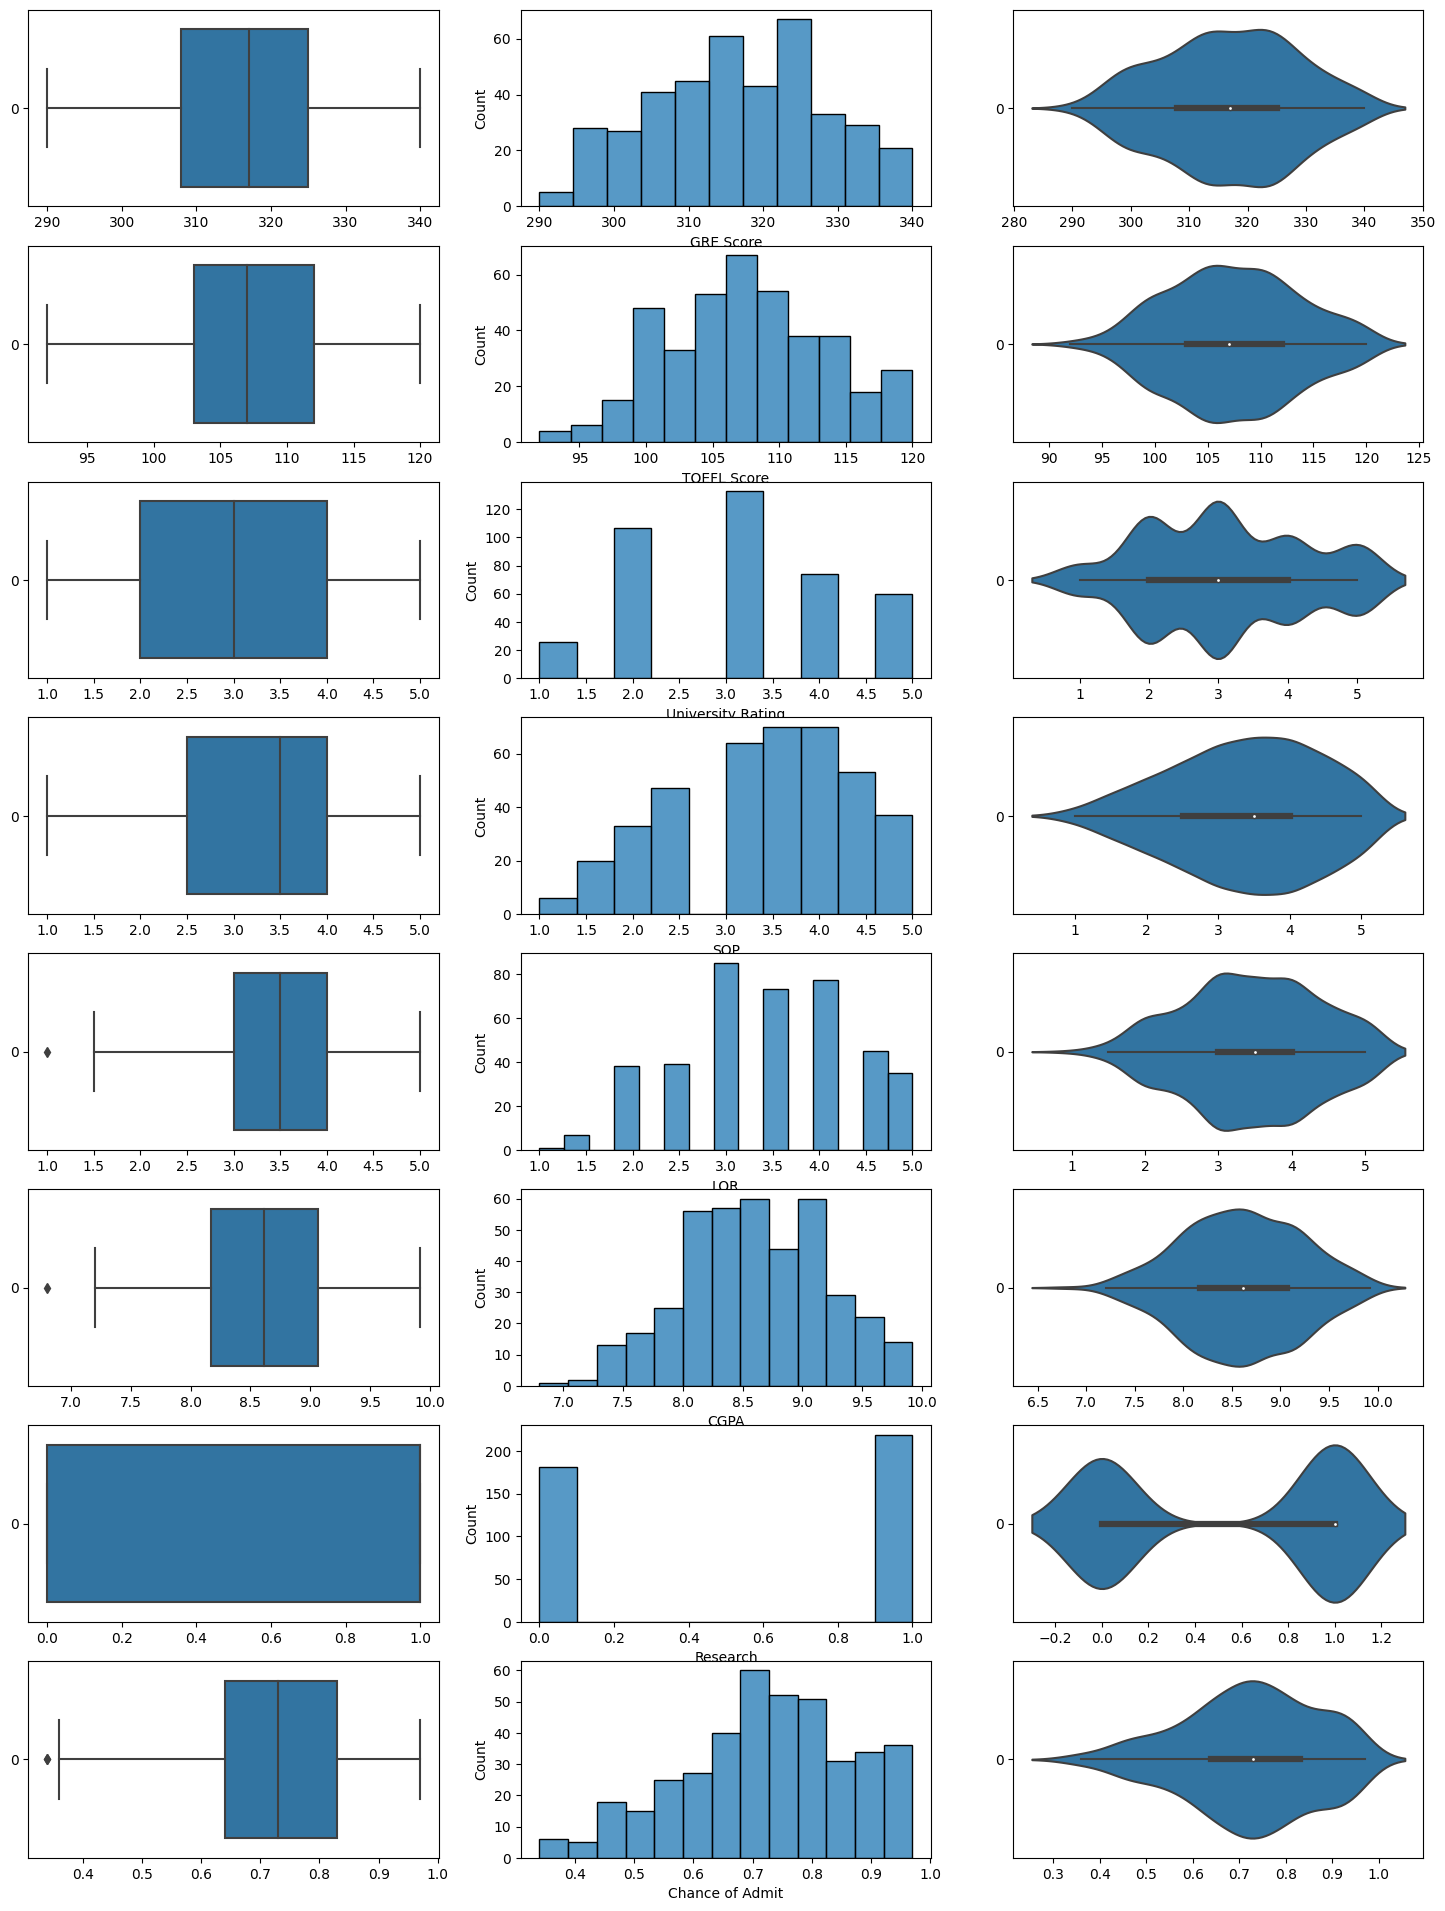

In [6]:
f, axes = plt.subplots(8, 3, figsize=(18, 24))

count = 0
for var in numDF:
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDF[var], ax = axes[count,1])
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2])
    count += 1

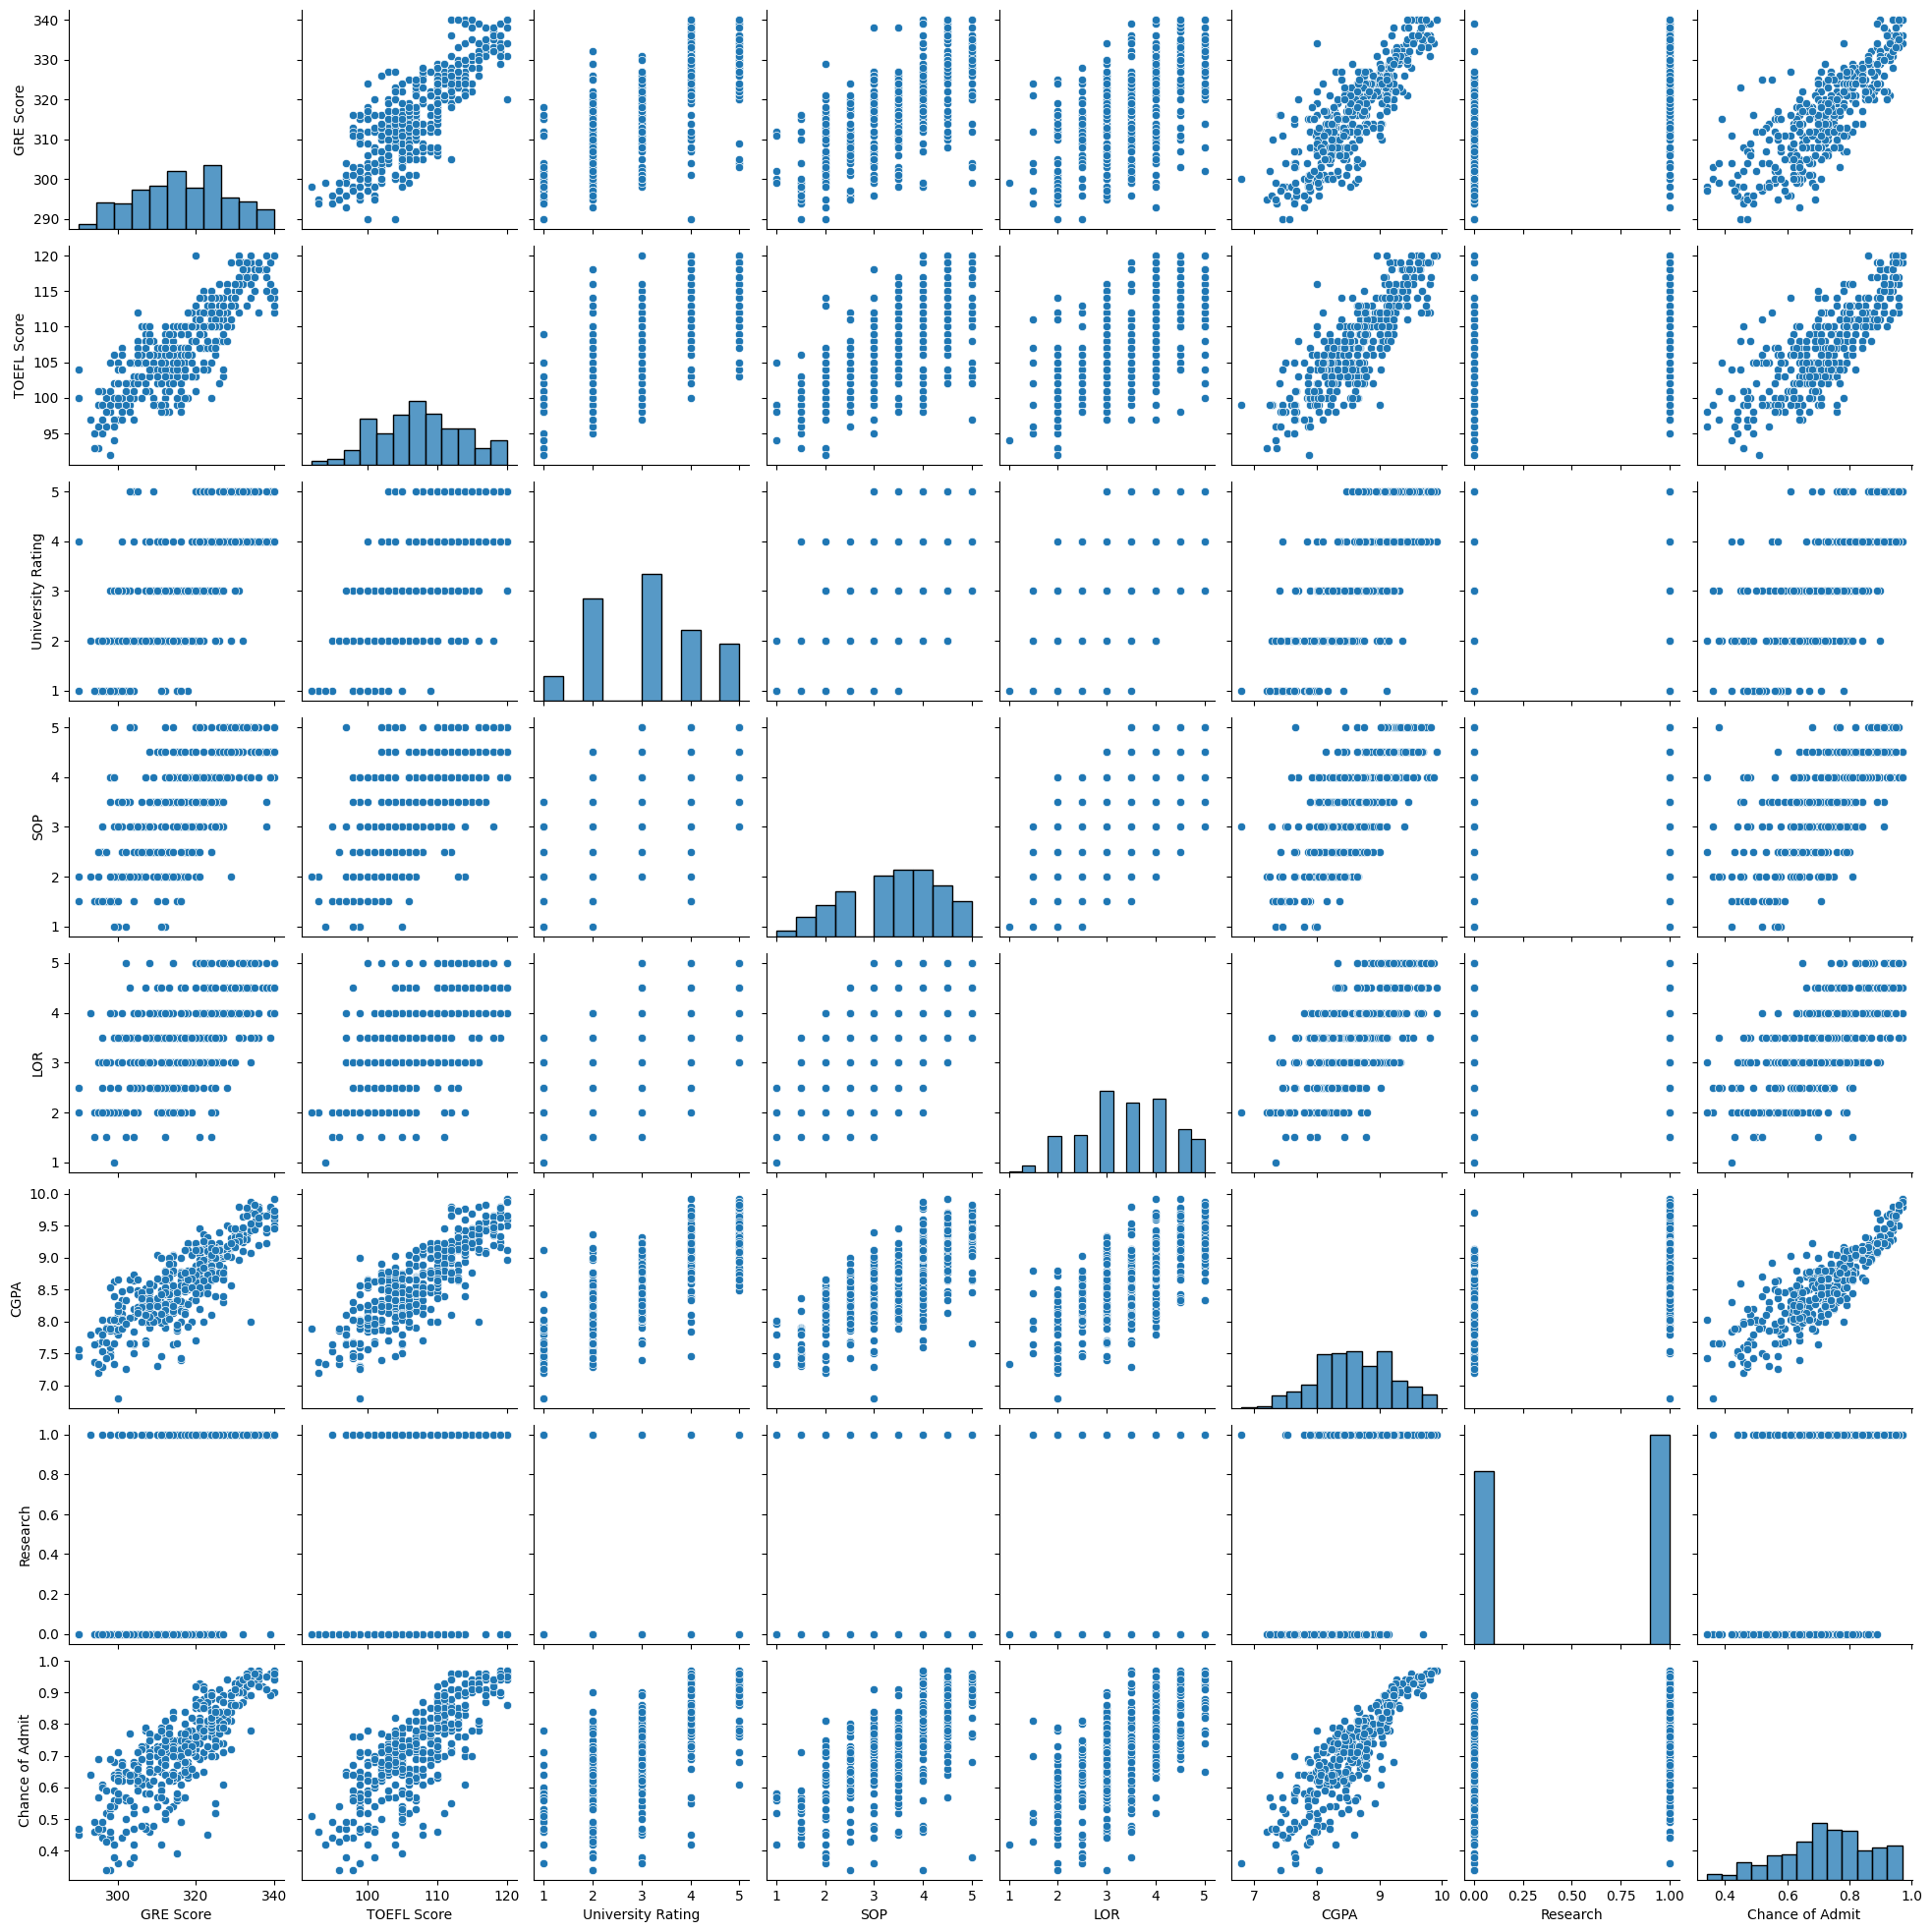

In [7]:
sb.pairplot(data = numDF)

Plot heatmap to check correlation of variables with chance of admission.

In [8]:
AdminPreData.drop('Serial No.', inplace = True, axis = 1)
AdminPreData.drop('TOEFL Score', inplace = True, axis = 1)

Dropped the serial number column due to its insignificance.

Dropped the TOEFL score due to its low significance to affect the chance of admission as TOEFL only serves to test a candidate's proficiency in English which is not our objective.

<AxesSubplot: >

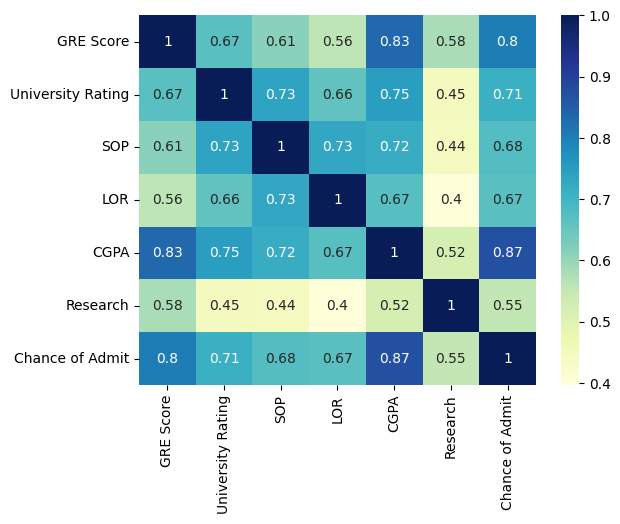

In [9]:
sb.heatmap(AdminPreData.corr(), annot=True, cmap='YlGnBu')

From the heat map above, looking at the column of Chance Of Admit. 

CGPA, GRE Score and University Rating score have the highest significance.

/var/folders/h6/pyvs_5s12jl280svrt54srxw0000gn/T/ipykernel_57476/1776542403.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  res = sb.kdeplot(x=AdminPreData['GRE Score'], y=AdminPreData['Chance of Admit'], shade = True, cmap = "Purples_r")


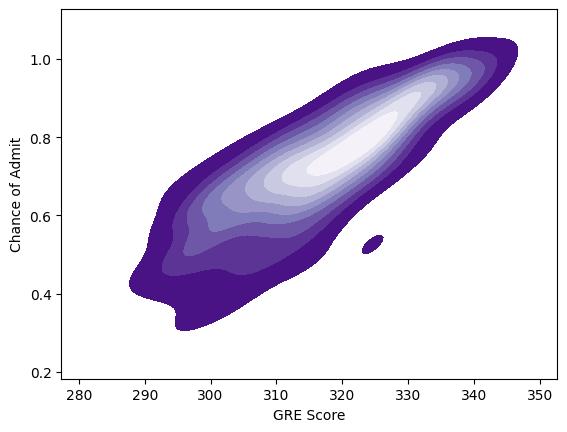

In [10]:
res = sb.kdeplot(x=AdminPreData['GRE Score'], y=AdminPreData['Chance of Admit'], shade = True, cmap = "Purples_r")
plt.show()

This is a contour map plotted for GRE score against Chance of Admission.

Candidates with 70% to 83% chance of admission.

Have a GRE score of at least 315 to 328.

/var/folders/h6/pyvs_5s12jl280svrt54srxw0000gn/T/ipykernel_57476/1759347910.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  res = sb.kdeplot(x=AdminPreData['University Rating'], y=AdminPreData['Chance of Admit'], shade = True, cmap = "Greens_r")


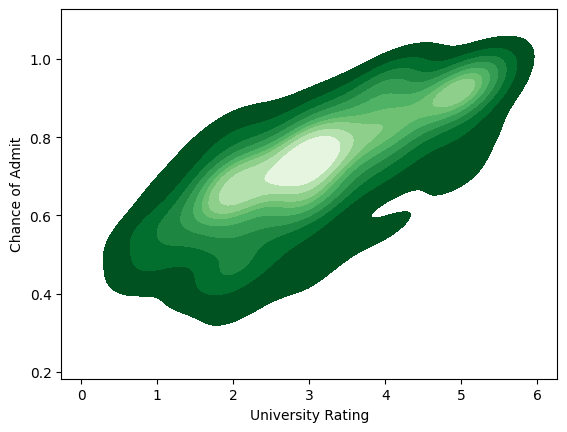

In [11]:
res = sb.kdeplot(x=AdminPreData['University Rating'], y=AdminPreData['Chance of Admit'], shade = True, cmap = "Greens_r")
plt.show()

Candidates with 70% to 80% chance of admission.

Have a University rating of at least 2.3 to 3.4.

/var/folders/h6/pyvs_5s12jl280svrt54srxw0000gn/T/ipykernel_57476/2654403550.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  res = sb.kdeplot(x=AdminPreData['SOP'], y=AdminPreData['Chance of Admit'], shade = True, cmap = "Reds_r")


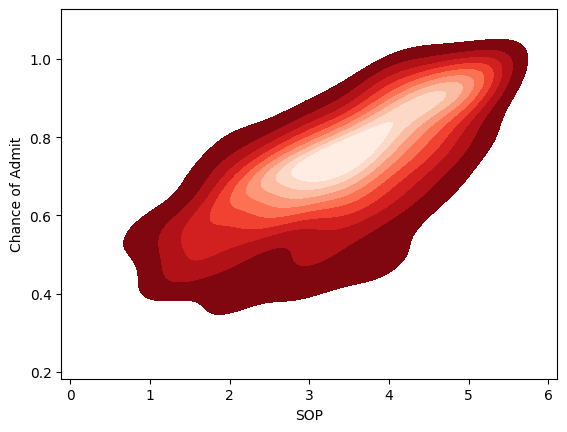

In [12]:
res = sb.kdeplot(x=AdminPreData['SOP'], y=AdminPreData['Chance of Admit'], shade = True, cmap = "Reds_r")
plt.show()

Candidates with a 70% to 82% chance of admission.

Have a SOP score of at least 2.8 to 4.1.

/var/folders/h6/pyvs_5s12jl280svrt54srxw0000gn/T/ipykernel_57476/1956423115.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  res = sb.kdeplot(x=AdminPreData['LOR'], y=AdminPreData['Chance of Admit'], shade = True, cmap = "Oranges_r")


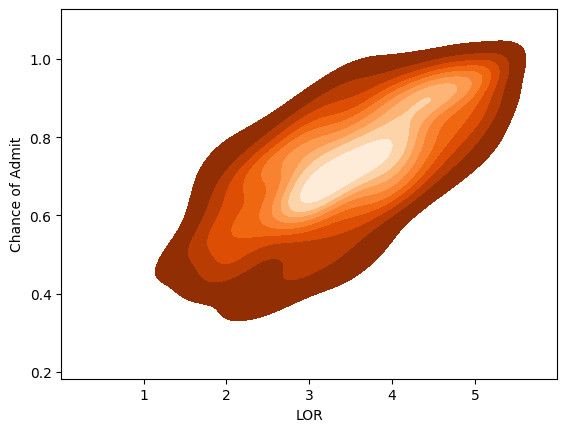

In [13]:
res = sb.kdeplot(x=AdminPreData['LOR'], y=AdminPreData['Chance of Admit'], shade = True, cmap = "Oranges_r")
plt.show()

Candidates with a 62% to 80% chance of admission.

Have a LOR score of at least 2.8 to 4.1.

/var/folders/h6/pyvs_5s12jl280svrt54srxw0000gn/T/ipykernel_57476/3743975706.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  res = sb.kdeplot(x=AdminPreData['CGPA'], y=AdminPreData['Chance of Admit'], shade = True, cmap = "Blues_r")


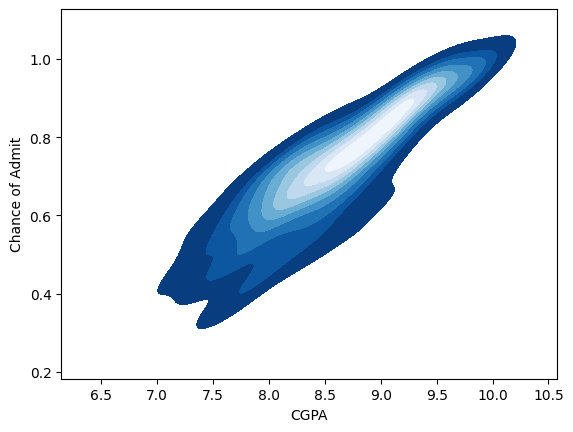

In [14]:
res = sb.kdeplot(x=AdminPreData['CGPA'], y=AdminPreData['Chance of Admit'], shade = True, cmap = "Blues_r")
plt.show()

Candidates with a 78% to 90% chance of admission.

Have a CGPA of at least 8.5 to 9.3.

# Regression Models

## Uni-Variate Linear Regression Model

In [15]:
# Import essential linear models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
print("Data dims : ", GREscore.shape) # Predictor
print("Data dims : ", SOP.shape) # Predictor
print("Data dims : ", CGPA.shape) # Predictor
print("Data dims : ", ChanceOfAdmit.shape) # Response

Data dims :  (400, 1)
Data dims :  (400, 1)
Data dims :  (400, 1)
Data dims :  (400, 1)


### GRE Score and Chance of Admission

Intercept of Regression 	: b =  [-2.37870642]
Coefficients of Regression 	: a =  [[0.00979649]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6453891837288416
Mean Squared Error (MSE) 	: 0.006701451481974739
Root Mean Squared Error (RMSE) 	: 0.08186239357589503

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6395394905469096
Mean Squared Error (MSE) 	: 0.009308301276102736
Root Mean Squared Error (RMSE) 	: 0.09647953812131739



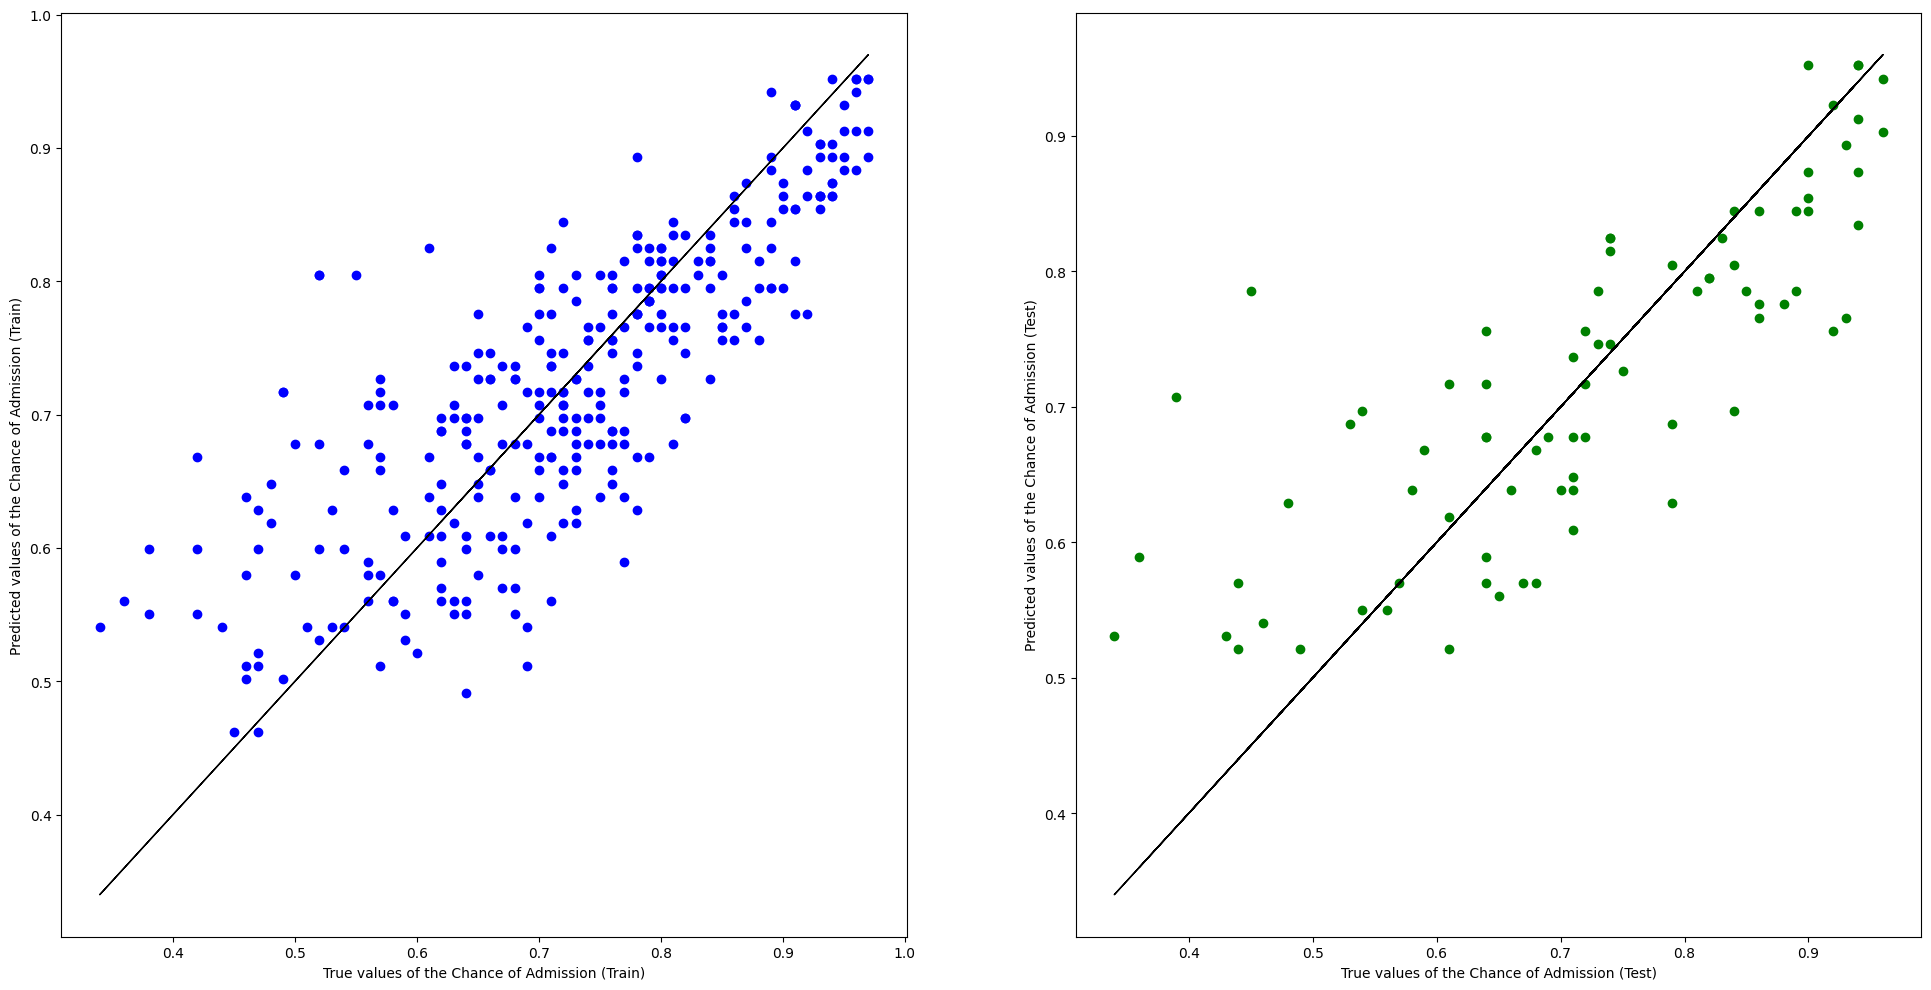

In [17]:
# R/s btwn GRE Score and Chance of Admission

# Split the Dataset into Train and Test (Random Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(GREscore, ChanceOfAdmit, test_size = 0.2, random_state = 42)

# Linear Regression using Train Data
linreg1 = LinearRegression()         # create the linear regression object
linreg1.fit(X_train, y_train)        # train the linear regression model

lrmodel_ = []

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg1.intercept_)
print('Coefficients of Regression \t: a = ', linreg1.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg1.predict(X_train)
y_test_pred = linreg1.predict(X_test)

# Check the Goodness of Fit (on Train Data)
mse = mean_squared_error(y_train, y_train_pred)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
print()

# Check the Goodness of Fit (on Test Data)
mse = mean_squared_error(y_test, y_test_pred)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
lrmodel_.append(['GRE Score', np.sqrt(mse)])
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'k-', linewidth = 1)
axes[0].set_xlabel("True values of the Chance of Admission (Train)")
axes[0].set_ylabel("Predicted values of the Chance of Admission (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'k-', linewidth = 1)
axes[1].set_xlabel("True values of the Chance of Admission (Test)")
axes[1].set_ylabel("Predicted values of the Chance of Admission (Test)")
plt.show()

From our goodness fit of the model, we can see that the explained variance of both the train and test dataset is quite high which suggests that there is a high correlation and have a low RMSE value. A high correlation means that the predictors can explain for majority of the variance in the response variable, which is quite good. It is also supported by a fairly low RMSE which suggests that the model is a pretty good fit for the dataset. Thus, this shows that our model should be able to make a fairly accurate prediction of chance of admission using the GRE score.

### SOP and Chance of Admission

Intercept of Regression 	: b =  [0.41951243]
Coefficients of Regression 	: a =  [[0.09072418]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4530552674510985
Mean Squared Error (MSE) 	: 0.010336186659617764
Root Mean Squared Error (RMSE) 	: 0.10166703821602045

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.45925687696083173
Mean Squared Error (MSE) 	: 0.013963803995800283
Root Mean Squared Error (RMSE) 	: 0.11816854063497731



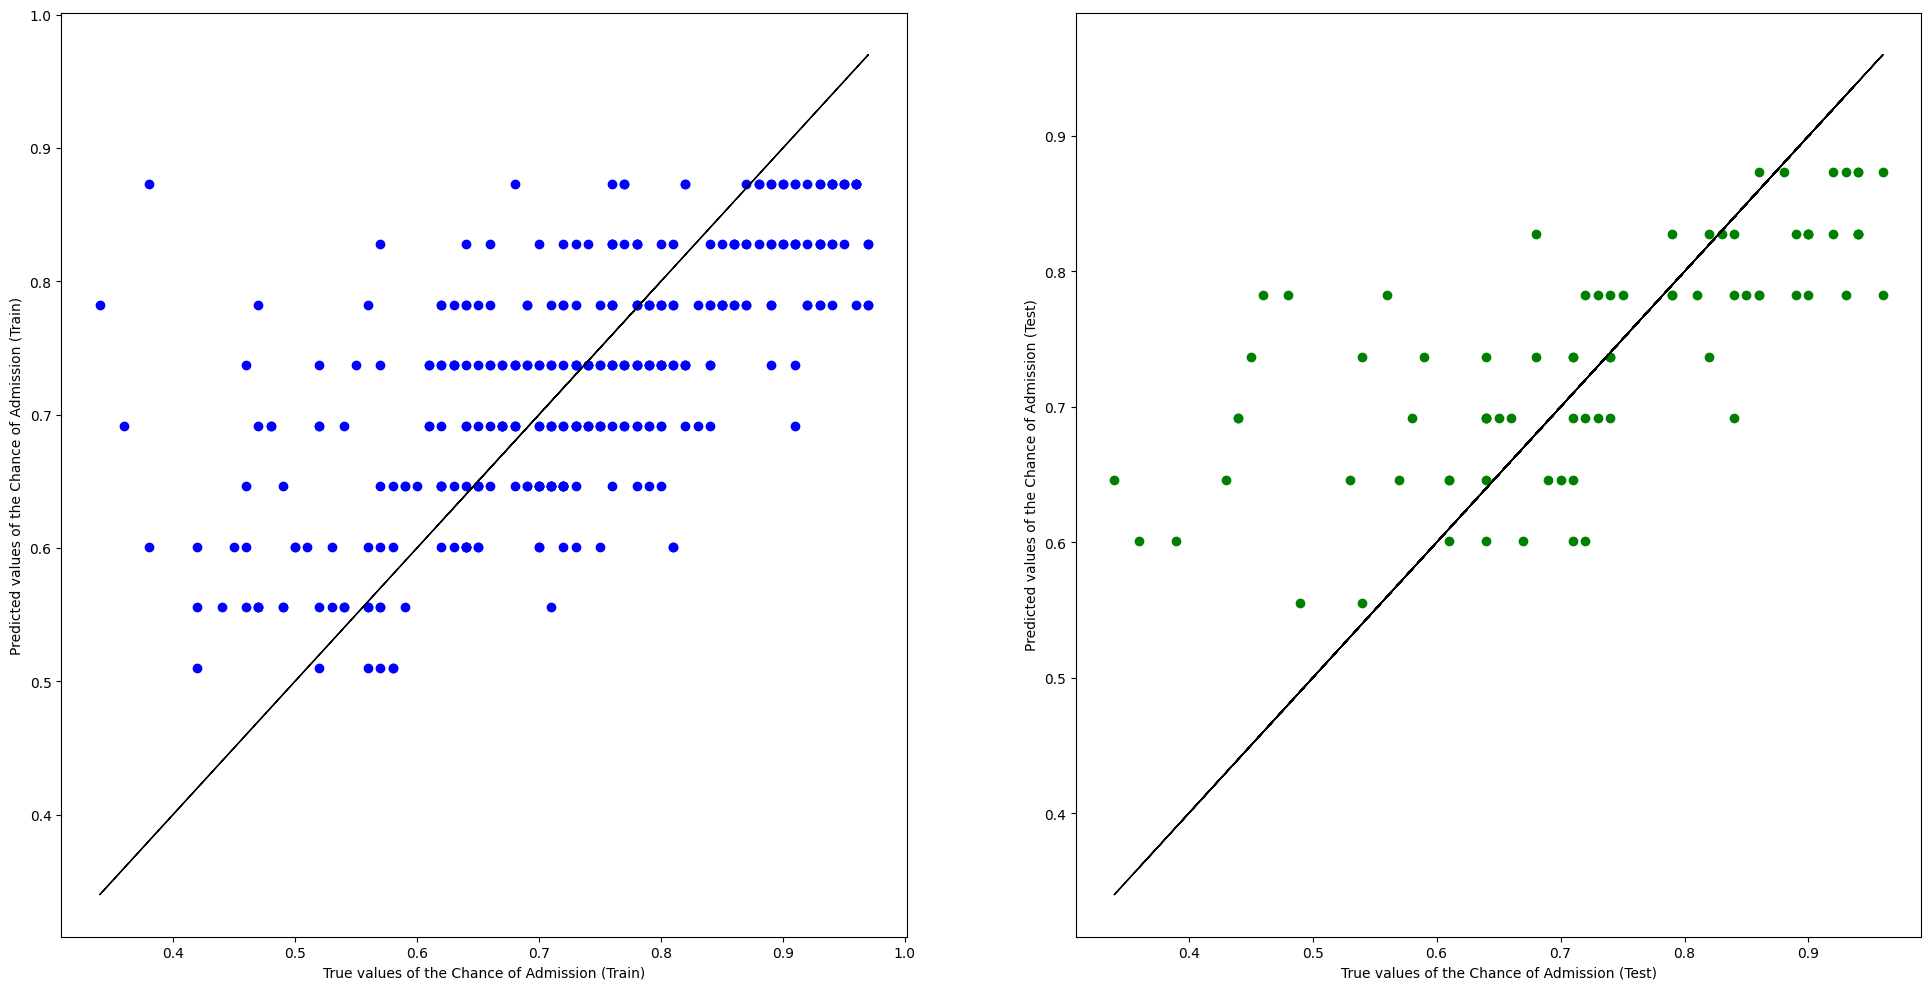

In [18]:
# Split the Dataset into Train and Test (Random Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(SOP, ChanceOfAdmit, test_size = 0.2, random_state = 42)

# Linear Regression using Train Data
linreg2 = LinearRegression()         # create the linear regression object
linreg2.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg2.intercept_)
print('Coefficients of Regression \t: a = ', linreg2.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg2.predict(X_train)
y_test_pred = linreg2.predict(X_test)

# Check the Goodness of Fit (on Train Data)
mse = mean_squared_error(y_train, y_train_pred)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
print()

# Check the Goodness of Fit (on Test Data)
mse = mean_squared_error(y_test, y_test_pred)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
lrmodel_.append(['SOP', np.sqrt(mse)])
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'k-', linewidth = 1)
axes[0].set_xlabel("True values of the Chance of Admission (Train)")
axes[0].set_ylabel("Predicted values of the Chance of Admission (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'k-', linewidth = 1)
axes[1].set_xlabel("True values of the Chance of Admission (Test)")
axes[1].set_ylabel("Predicted values of the Chance of Admission (Test)")
plt.show()

From our goodness fit of the model, we can see that the explained variance of both the train and test dataset is rather low which suggests that there is a low correlation andd a low RMSE value. A low correlation means that the SOP can only explain for minority of the variance in the chance of admission, which is not very ideal. Thus, while the low RMSE values suggests that the model has a good fit, the low explained variance value means that SOP would not give a very reliable prediction of chance of admission.

### CGPA and Chance of Admission

Intercept of Regression 	: b =  [-1.0204731]
Coefficients of Regression 	: a =  [[0.20328277]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7550375119817044
Mean Squared Error (MSE) 	: 0.004629312341965196
Root Mean Squared Error (RMSE) 	: 0.068039050125389

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7806138920790952
Mean Squared Error (MSE) 	: 0.00566528630672406
Root Mean Squared Error (RMSE) 	: 0.07526809620765003



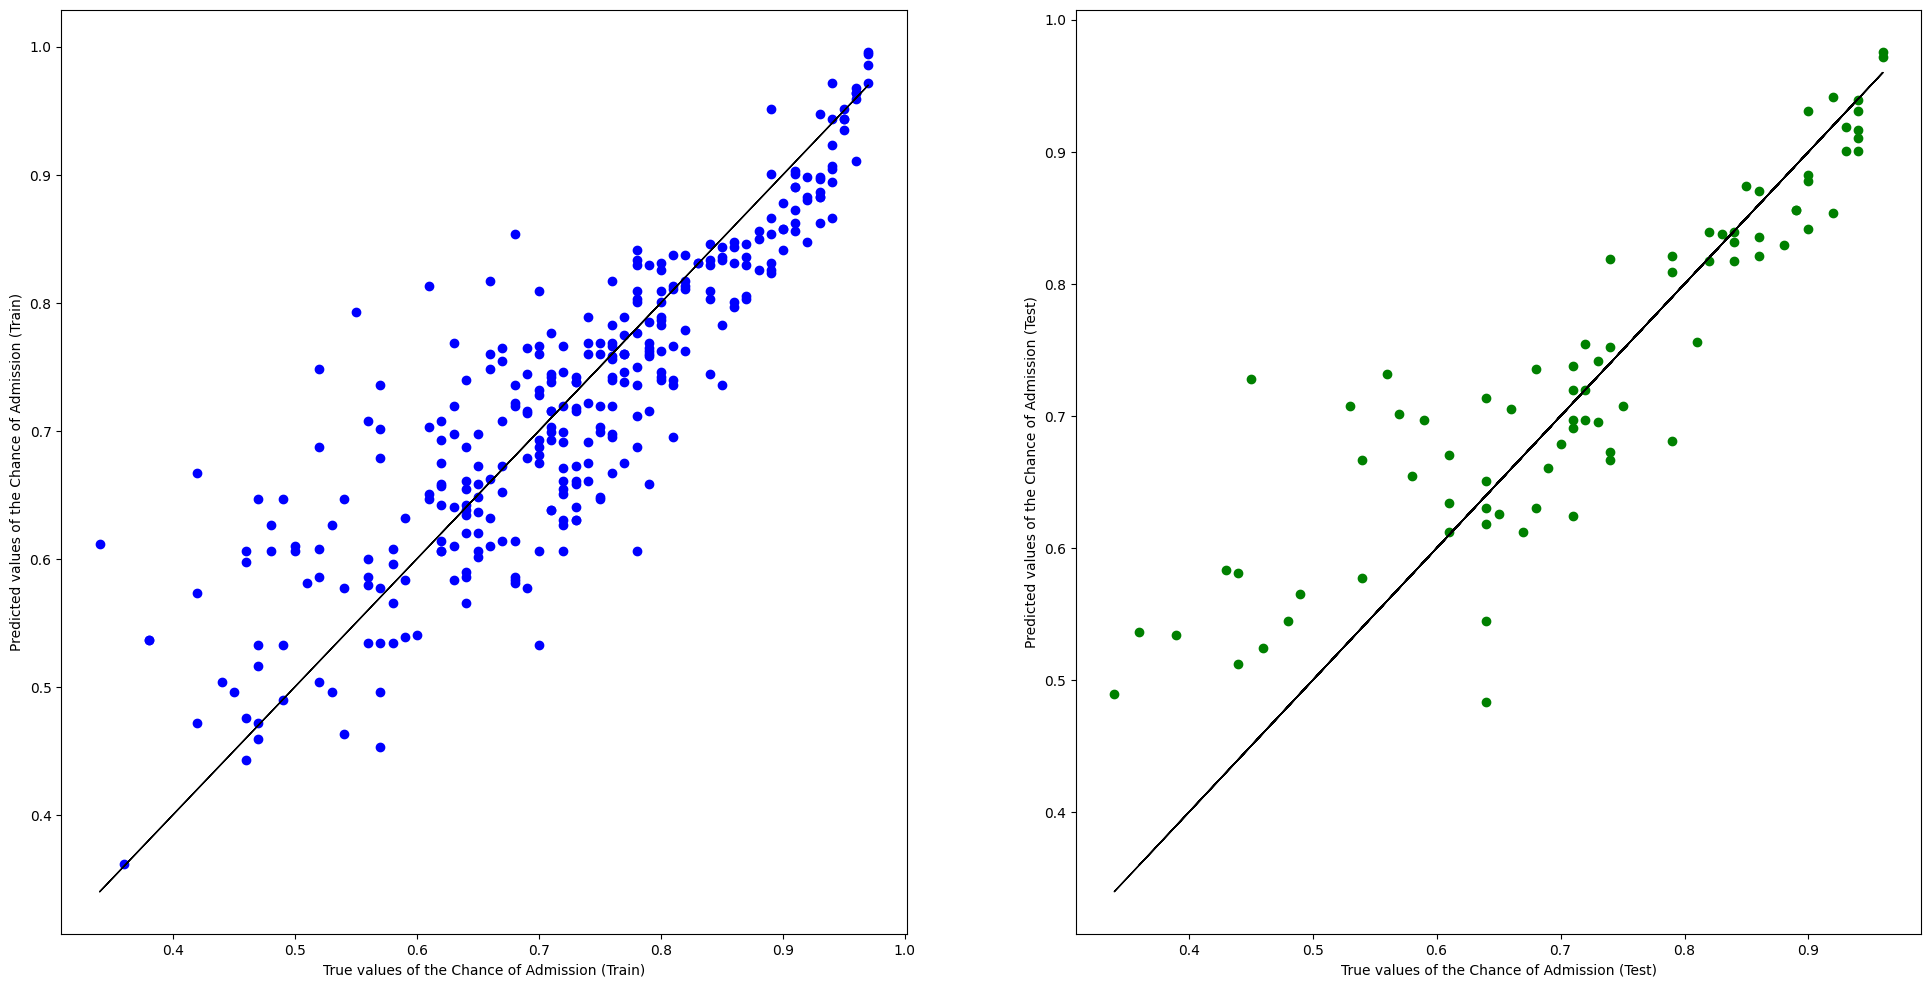

In [19]:
# Split the Dataset into Train and Test (Random Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(CGPA, ChanceOfAdmit, test_size = 0.2, random_state = 42)

# Linear Regression using Train Data
linreg3 = LinearRegression()         # create the linear regression object
linreg3.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg3.intercept_)
print('Coefficients of Regression \t: a = ', linreg3.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg3.predict(X_train)
y_test_pred = linreg3.predict(X_test)

# Check the Goodness of Fit (on Train Data)
mse = mean_squared_error(y_train, y_train_pred)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg3.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
print()

# Check the Goodness of Fit (on Test Data)
mse = mean_squared_error(y_test, y_test_pred)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg3.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
lrmodel_.append(['CGPA', np.sqrt(mse)])
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'k-', linewidth = 1)
axes[0].set_xlabel("True values of the Chance of Admission (Train)")
axes[0].set_ylabel("Predicted values of the Chance of Admission (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'k-', linewidth = 1)
axes[1].set_xlabel("True values of the Chance of Admission (Test)")
axes[1].set_ylabel("Predicted values of the Chance of Admission (Test)")
plt.show()

From our goodness fit of the model, we can see that the explained variance of both the train and test dataset is quite high which suggests that there is a high correlation and have a low RMSE value. A high correlation means that the predictors can explain for majority of the variance in the response variable, which is quite good. It is also supported by a fairly low RMSE which suggests that the model is a pretty good fit for the dataset. Thus, this shows that our model should be able to make a fairly accurate prediction of chance of admission using the CGPA.

In [20]:
lrmodels = pd.DataFrame(lrmodel_, columns=['Model', 'RMSE'])

In [21]:
lrmodels

Model      RMSE
0  GRE Score  0.096480
1        SOP  0.118169
2       CGPA  0.075268

##### Comparing the RMSE values of the 3 linear regression models, we can deduce that CGPA will be the best predictor as it has the lowest RMSE value.

## Multi-Variate Linear Regression

In [22]:
# Extract Response and Predictors
y = pd.DataFrame(AdminPreData["Chance of Admit"]) # Response
X = pd.DataFrame(AdminPreData[["GRE Score", "SOP", "CGPA"]]) # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (320, 1) (320, 3)
Test Set  : (80, 1) (80, 3)


<AxesSubplot: >

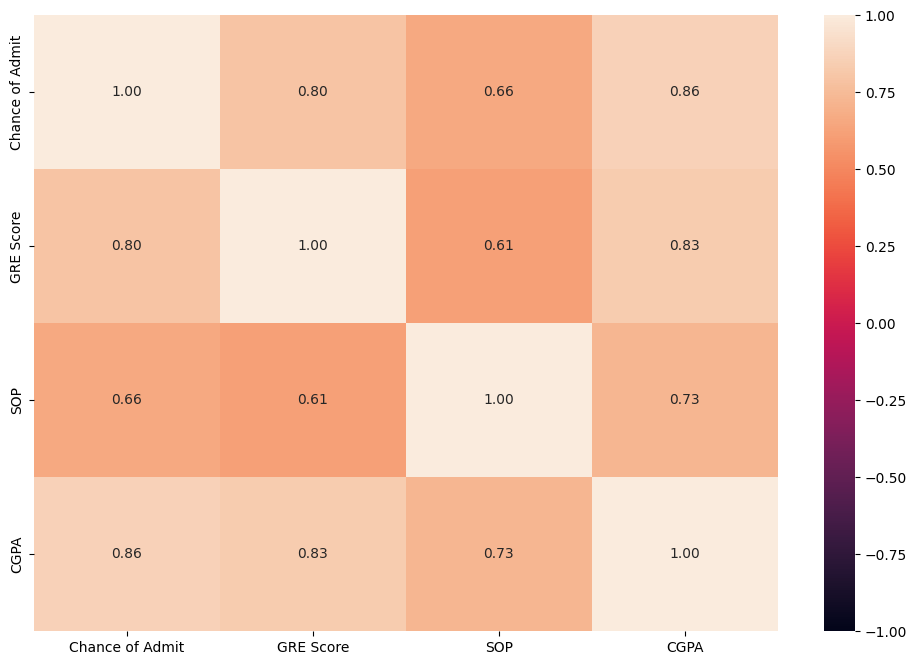

In [23]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [24]:
# Linear Regression using Train Data
linreg4 = LinearRegression()         # create the linear regression object
linreg4.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg4.intercept_)
print('Coefficients of Regression \t: a = ', linreg4.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg4.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-1.55485087]
Coefficients of Regression 	: a =  [[0.00318774 0.01081295 0.14327058]]



Predictors  Coefficients
0  GRE Score      0.003188
1        SOP      0.010813
2       CGPA      0.143271

The coefficient tells us how much the dependent variable is expected to increase when the independent variable increases by one, holding all the other independent variables constant. Since CGPA has the largest coefficient among the 3 predictors, it suggests that CGPA is the most significant factor among the 3 predictors in predicting the chance of admission.

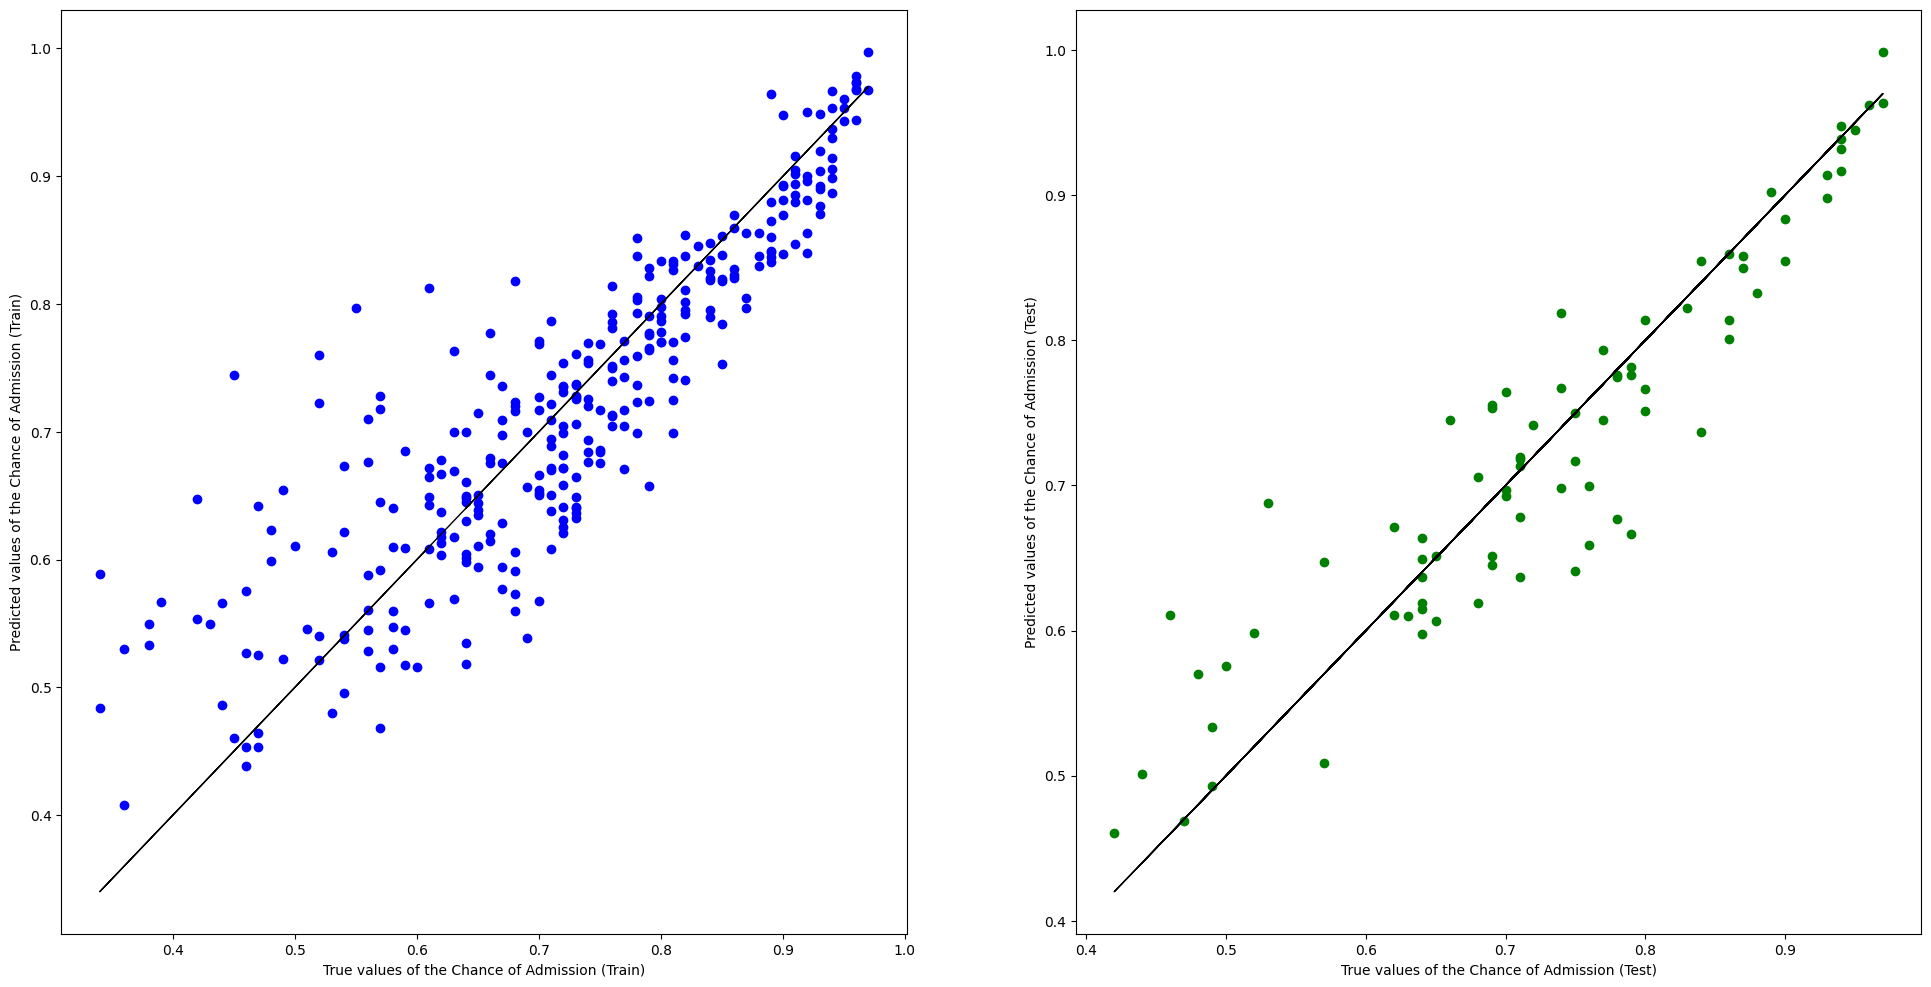

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7675507456694413
Mean Squared Error (MSE) 	: 0.004767123561103858
Root Mean Squared Error (RMSE) 	: 0.0690443593721012

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8581994443893686
Mean Squared Error (MSE) 	: 0.0027387868906384076
Root Mean Squared Error (RMSE) 	: 0.052333420398808325



In [25]:
# Predict the Total values from Predictors
y_train_pred = linreg4.predict(X_train)
y_test_pred = linreg4.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'k-', linewidth = 1)
axes[0].set_xlabel("True values of the Chance of Admission (Train)")
axes[0].set_ylabel("Predicted values of the Chance of Admission (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'k-', linewidth = 1)
axes[1].set_xlabel("True values of the Chance of Admission (Test)")
axes[1].set_ylabel("Predicted values of the Chance of Admission (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg4.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg4.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

From our goodness fit of the model, we can see that the explained variance of both the train and test dataset is quite high which suggests that there is a high correlation and have a low RMSE value. A high correlation means that the predictors can explain for majority of the variance in the response variable, which is quite good. It is also supported by a fairly low RMSE which suggests that the model is a pretty good fit for the dataset.

## Lasso Regression

From our heatmap plotted with only the predictor and response variables, we note that our variables have a rather high correlation. This implies the existence of multicollinearity among our variables which will result in a reduction of accuracy and reliability in the prediction of our coefficients. Thus, we have chosen to adopt a lasso regression model to minimise the prediction error.

In [26]:
# Lasso Regression
from numpy import arange
from sklearn.metrics import r2_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

model_ = []

model_.append(['Linear Regression', np.sqrt(mse)])

In [27]:
# Extract Response and Predictors
y = pd.DataFrame(AdminPreData["Chance of Admit"]) # Response
X = pd.DataFrame(AdminPreData[["GRE Score", "SOP", "CGPA"]]) # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (320, 1) (320, 3)
Test Set  : (80, 1) (80, 3)


In [28]:
# Build the lasso model with alpha = 1
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)
lasso_train_pred= lasso_model.predict(X_train)
lasso_test_pred= lasso_model.predict(X_test)

In [29]:
# Evaluate the lasso model

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, lasso_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, lasso_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, lasso_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, lasso_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, lasso_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, lasso_test_pred)))
print()
model_.append(['Lasso', np.sqrt(mean_squared_error(y_test, lasso_test_pred))])

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.25537224626841737
Mean Squared Error (MSE) 	: 0.01554526711283645
Root Mean Squared Error (RMSE) 	: 0.12468066054058444

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2256771566398178
Mean Squared Error (MSE) 	: 0.01279315633849166
Root Mean Squared Error (RMSE) 	: 0.11310683594943172



In [30]:
# Tunning the lasso regression model

# define the model evaluation method
cross_validation = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)

## define model

lasso_cv_model = LassoCV(alphas = arange(0, 1, 0.02), cv = cross_validation, n_jobs = -1)

## fit model
lasso_cv_model.fit(X, y.values.ravel())

## summarize chosen configuration
print('alpha: %f' % lasso_cv_model.alpha_)

lasso_cv_train_pred= lasso_cv_model.predict(X_train)
lasso_cv_test_pred= lasso_cv_model.predict(X_test)

alpha: 0.000000


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective di

After tuning, we note that the value of alpha = 0. Alpha = 0 simply means that the lasso regression produces the same coefficients as a linear regression model, which further reinforces that our linear regression is already a good fit.

However, we should note that we have received warnings for our code. 

UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged

ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.716e-01, tolerance: 9.940e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

What this means is that the model is unable to perform feature selection to determine a single predictor that has a significantly larger coefficient than the others thus the lasso model is not applicable for our dataset.

In [31]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, lasso_cv_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, lasso_cv_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, lasso_cv_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, lasso_cv_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, lasso_cv_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, lasso_cv_test_pred)))
print()
model_.append(['Lasso Tuned', np.sqrt(mean_squared_error(y_test, lasso_cv_test_pred))])

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7627892168419155
Mean Squared Error (MSE) 	: 0.004952145508622542
Root Mean Squared Error (RMSE) 	: 0.07037148221135137

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8805589761935074
Mean Squared Error (MSE) 	: 0.0019733728688089212
Root Mean Squared Error (RMSE) 	: 0.04442266165831266



## Ridge Regression

As suggested in the warning, we will now try to implement a ridge regression model to tackle the issue of multicollinearity instead.

In [32]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [33]:
# Extract Response and Predictors
y = pd.DataFrame(AdminPreData["Chance of Admit"]) # Response
X = pd.DataFrame(AdminPreData[["GRE Score", "SOP", "CGPA"]]) # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (320, 1) (320, 3)
Test Set  : (80, 1) (80, 3)


In [34]:
# Build the ridge model with alpha = 1
ridge_model = Ridge(alpha = 1)
ridge_model.fit(X_train, y_train)
ridge_train_pred= ridge_model.predict(X_train)
ridge_test_pred= ridge_model.predict(X_test)

In [35]:
# Evaluate the ridge model

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, ridge_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, ridge_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, ridge_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, ridge_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, ridge_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, ridge_test_pred)))
print()
model_.append(['Ridge', np.sqrt(mean_squared_error(y_test, ridge_test_pred))])

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7844019473346351
Mean Squared Error (MSE) 	: 0.004471223798010146
Root Mean Squared Error (RMSE) 	: 0.06686721018563692

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7854199812655454
Mean Squared Error (MSE) 	: 0.003964228380794549
Root Mean Squared Error (RMSE) 	: 0.06296211861742383



In [36]:
# Tunning the ridge regression model

# define the model evaluation method
cross_validation = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)

# define model

ridge_cv_model = RidgeCV(alphas = arange(0.001, 1, 0.02), cv = cross_validation)

# fit model
ridge_cv_model.fit(X, y)

# summarize chosen alpha
print('alpha: %f' % ridge_cv_model.alpha_)

ridge_cv_train_pred= ridge_cv_model.predict(X_train)
ridge_cv_test_pred= ridge_cv_model.predict(X_test)

alpha: 0.341000


In [37]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, ridge_cv_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, ridge_cv_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, ridge_cv_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, ridge_cv_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, ridge_cv_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, ridge_cv_test_pred)))
print()
model_.append(['Ridge Tuned', np.sqrt(mean_squared_error(y_test, ridge_cv_test_pred))])

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7841183399390619
Mean Squared Error (MSE) 	: 0.004477105447314031
Root Mean Squared Error (RMSE) 	: 0.06691117580280614

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7902828716300311
Mean Squared Error (MSE) 	: 0.0038743895965998145
Root Mean Squared Error (RMSE) 	: 0.06224459491875431



In [38]:
models = pd.DataFrame(model_, columns=['Model', 'RMSE'])

In [39]:
models

Model      RMSE
0  Linear Regression  0.075268
1              Lasso  0.113107
2        Lasso Tuned  0.044423
3              Ridge  0.062962
4        Ridge Tuned  0.062245

Note the similarity in RMSE values between the Linear Regression Model and the Lasso Regression Model which suggests that the lasso regression after tuning does indeed function the same as a linear regression model.

Note the similarity in RMSE values between the Linear Regression Model and the Ridge Regression Model which suggests that the ridge regression after tuning does indeed function similar to the linear regression model. 

We ignore the lasso regression RMSE values as we have determined that it is not the best model to be adopted for our dataset.

### From our regression models, we can conclude that CGPA would be the most significant predictor of the 3 to predict the chance of admission.

# Classification Tree

In [40]:
df = pd.read_csv("Admission_Predict.csv")
df.shape

(400, 9)

In [41]:
df.drop('Serial No.', axis=1, inplace=True)
df.drop('TOEFL Score', axis=1, inplace=True)

In [42]:
df['chance_duplicate'] = df.loc[:, 'Chance of Admit']

Duplicated the Chance of Admitcolumn to ensure both continuous and discrete variable.

In [43]:
df.loc[df['Chance of Admit'] < 0.8, 'Chance of Admit'] = 0
df.loc[df['Chance of Admit'] >= 0.8, 'Chance of Admit'] = 1

In [44]:
df.head()

GRE Score  University Rating  SOP  LOR  CGPA  Research  Chance of Admit  \
0        337                  4  4.5  4.5  9.65         1              1.0   
1        324                  4  4.0  4.5  8.87         1              0.0   
2        316                  3  3.0  3.5  8.00         1              0.0   
3        322                  3  3.5  2.5  8.67         1              1.0   
4        314                  2  2.0  3.0  8.21         0              0.0   

   chance_duplicate  
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

Classifying high chance (>=0.8) as 1 and low chance (<0.8) as 0.
The reclassification of continuous to discrete is to ensure the accuration and neatness of decision tree.

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

dectree = DecisionTreeClassifier(max_depth = 2)

In [46]:
# Extract Response and Predictors
y = pd.DataFrame(df['Chance of Admit'])
X = pd.DataFrame(df['GRE Score'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 80)

In [47]:
# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

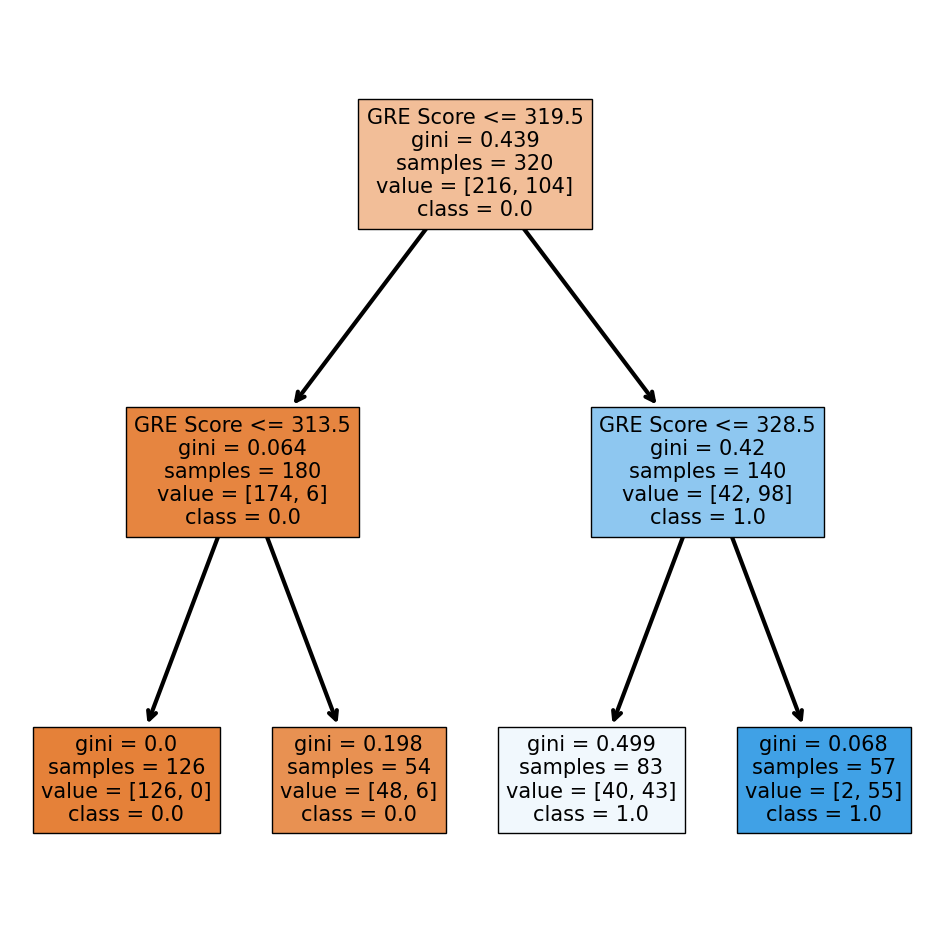

In [48]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

#Gini impurity is a function that determines 
#how well a decision tree was split. 
#Basically, it helps us to determine which splitter 
#is best so that we can build a pure decision tree. 
#Gini impurity ranges values from 0 to 0.5

Classification Accuracy 	: 0.85


<AxesSubplot: >

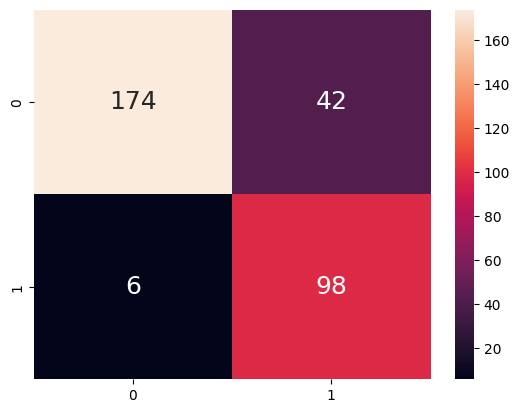

In [49]:
# Predict chance corresponding to GRE Train
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Classification Accuracy 	: 0.853125

Classification Accuracy 	: 0.8375


<AxesSubplot: >

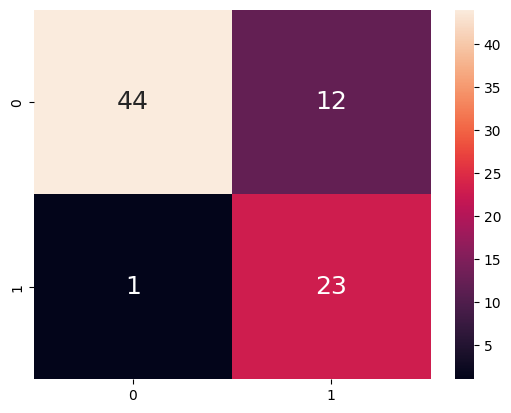

In [50]:
# Predict chance corresponding to GRE Test
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Classification Accuracy 	: 0.825

In [51]:
# Extract Response and Predictors
y = pd.DataFrame(df['Chance of Admit'])
X = pd.DataFrame(df['SOP'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 80)

In [52]:
# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

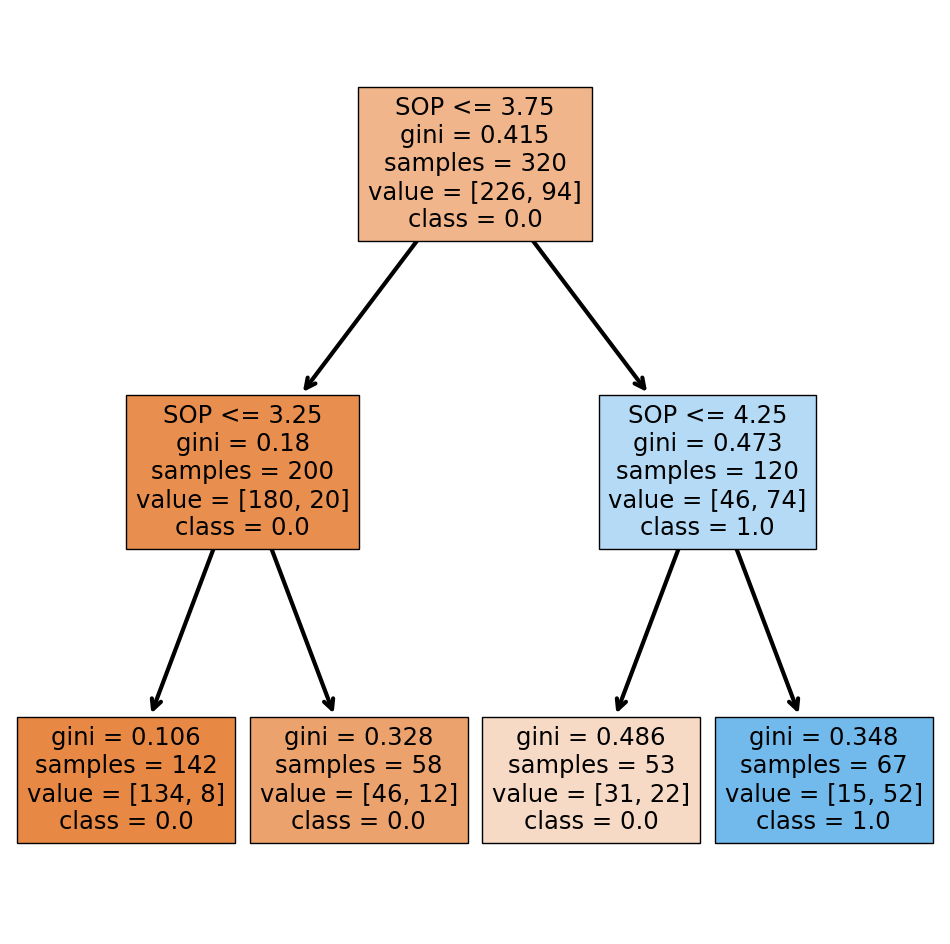

In [53]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.821875


<AxesSubplot: >

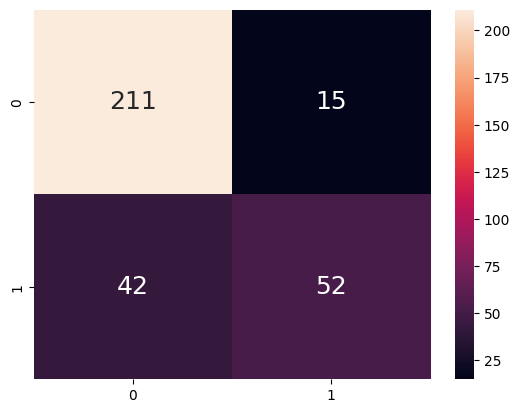

In [54]:
# Predict chance corresponding to SOP Train
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Classification Accuracy 	: 0.8

Classification Accuracy 	: 0.7125


<AxesSubplot: >

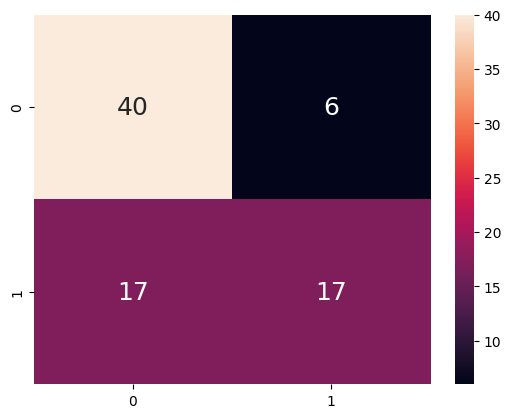

In [55]:
# Predict chance corresponding to SOP Test
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Classification Accuracy 	: 0.8

In [56]:
# Extract Response and Predictors
y = pd.DataFrame(df['Chance of Admit'])
X = pd.DataFrame(df['CGPA'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 80)

In [57]:
# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

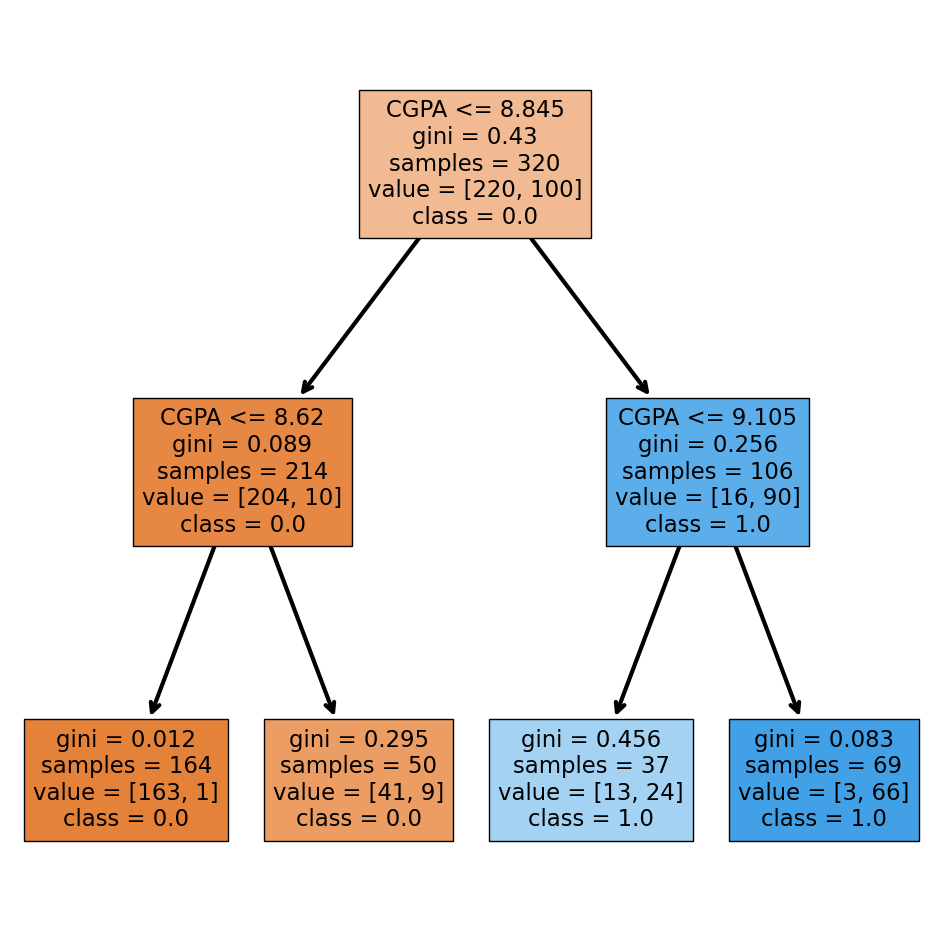

In [58]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.91875


<AxesSubplot: >

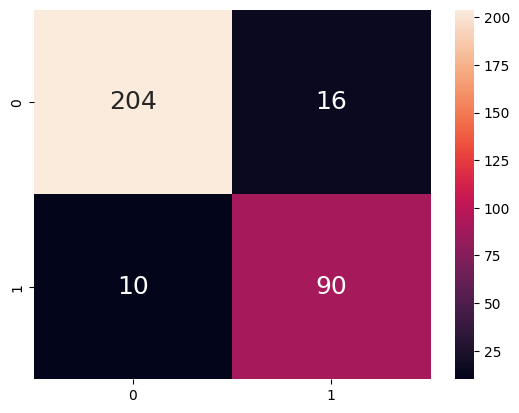

In [59]:
# Predict chance corresponding to CGPA Train
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Classification Accuracy 	: 0.921875

Classification Accuracy 	: 0.925


<AxesSubplot: >

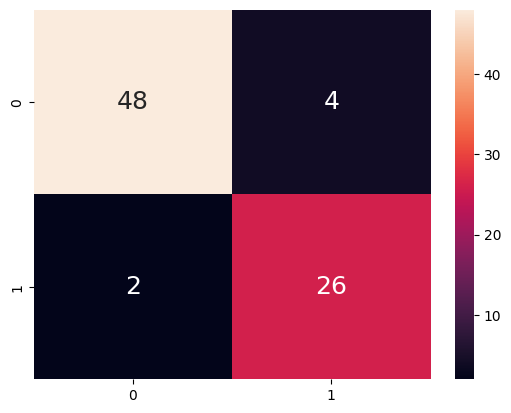

In [60]:
# Predict chance corresponding to SOP Test
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Classification Accuracy 	: 0.9125

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that the purity of the node increases with respect to the target variable. The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

This classification method tells us that the classification accuracy of CGPA is the highest at 0.9. Since CGPA has a strong linear correlation with chance of admit, this tells us that among the 3 variables, a high CGPA (>=8.93) will confidently (90% confidence) result in a high chance of admission (>=0.8).

# Clustering

### We used 3 techniques for clustering, K-Means, K-Means++, and HDBSCAN. For K-Means and K-Means++, we calculate within cluster sum of square to determine the best cluster size. For HDBSCAN, we set the min_cluster_size parameter properly to determine the clustersize

In [61]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [62]:
data = pd.read_csv('Admission_Predict.csv')

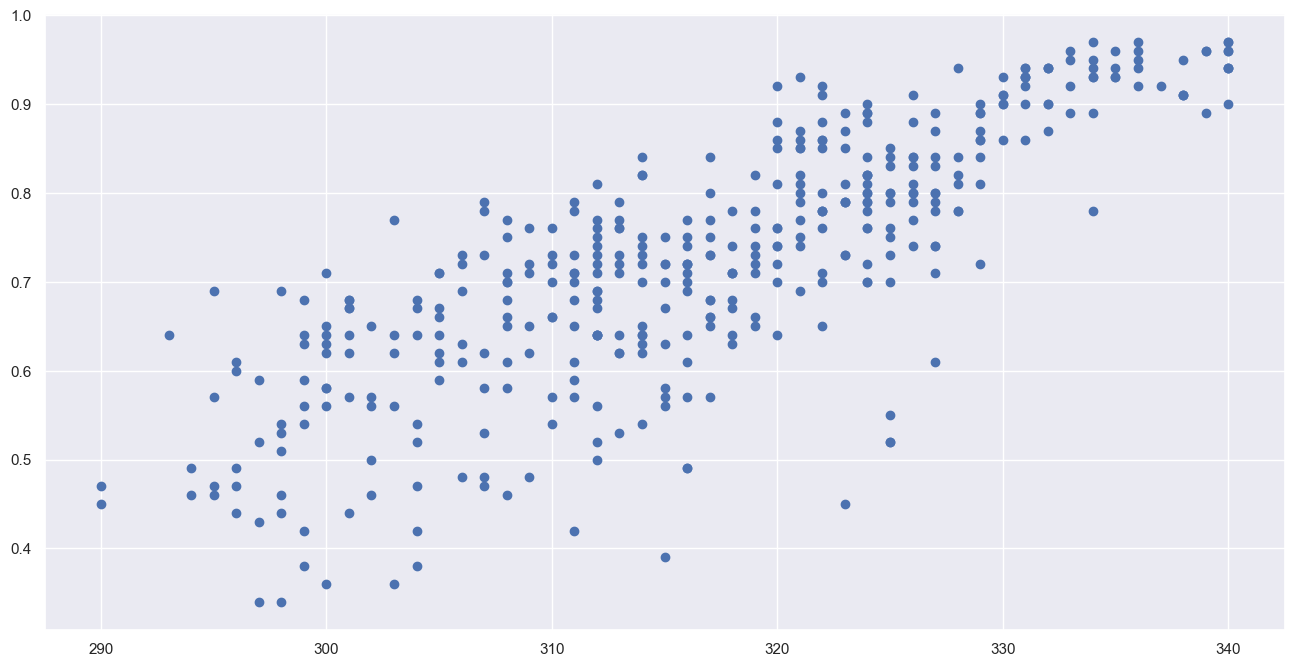

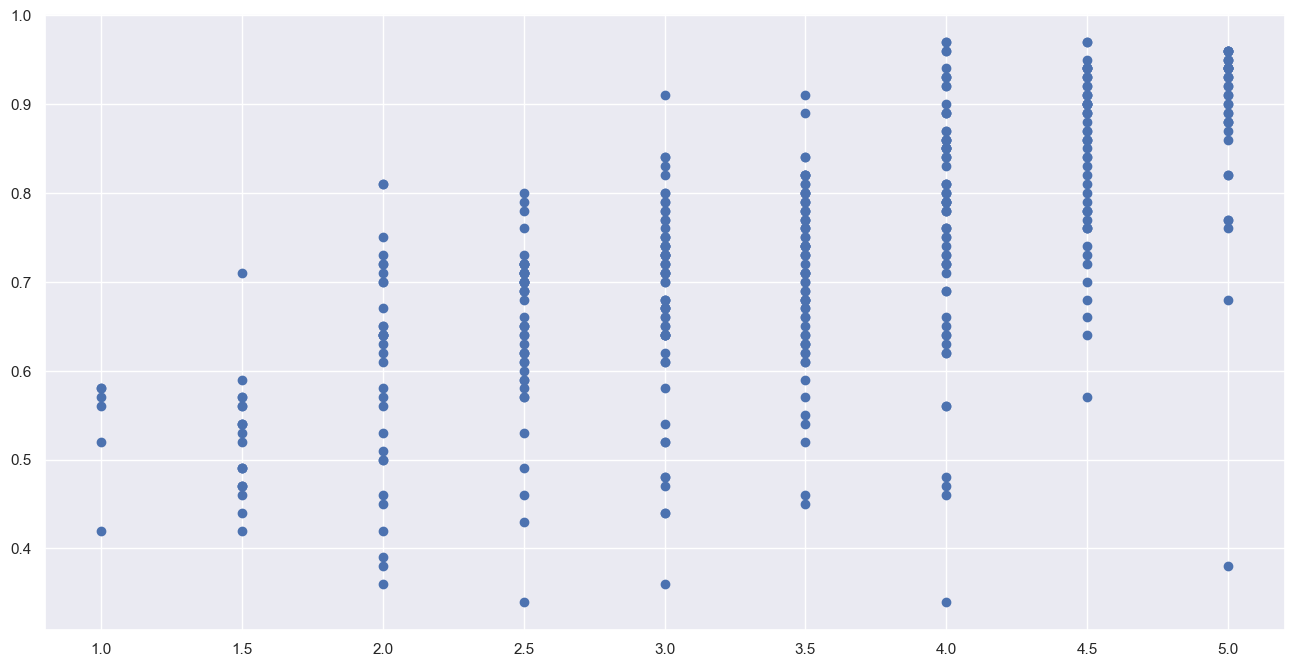

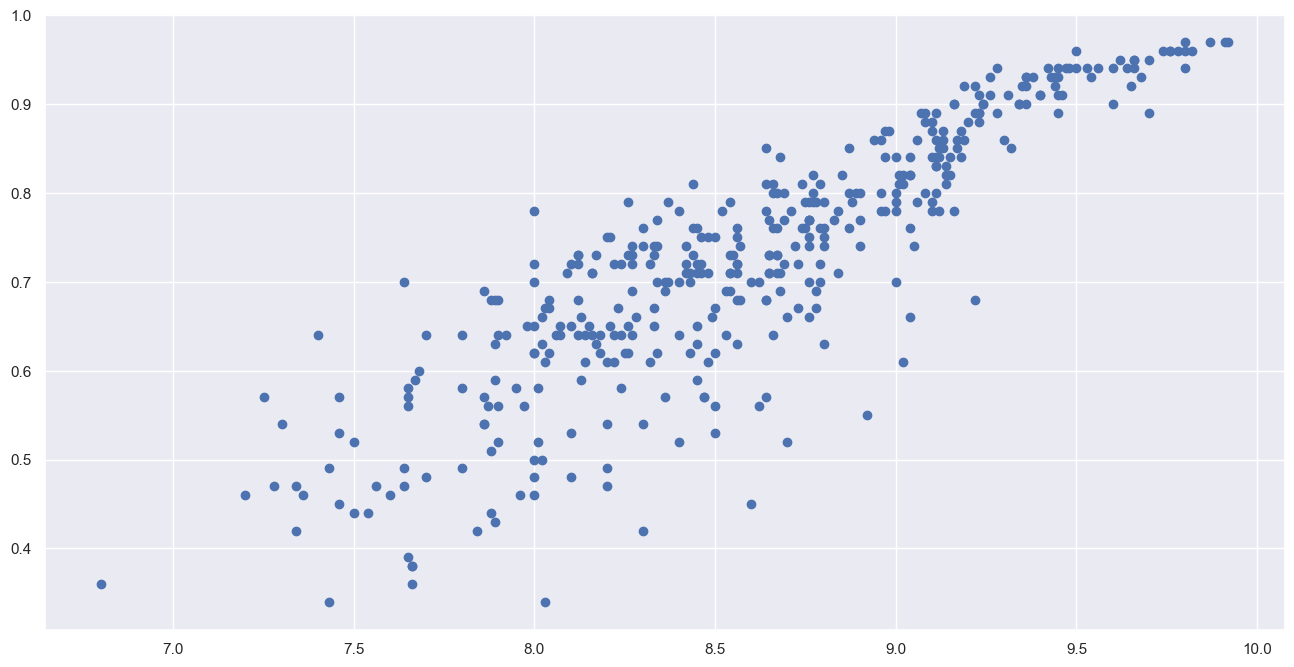

In [63]:
greData = pd.DataFrame(data[["GRE Score", "Chance of Admit"]])
sopData = pd.DataFrame(data[["SOP", "Chance of Admit"]])
cgpaData = pd.DataFrame(data[["CGPA", "Chance of Admit"]])

# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GRE Score", y = "Chance of Admit", data = greData)
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "SOP", y = "Chance of Admit", data = sopData)
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "CGPA", y = "Chance of Admit", data = cgpaData)

## Bi-Variate KMeans Clustering for GRE Score

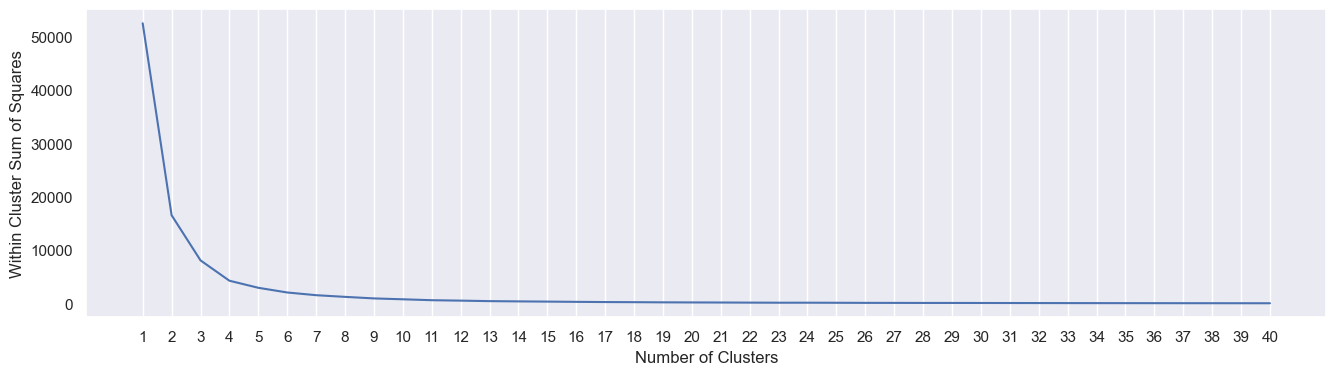

In [64]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(greData)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

#### Optimal Clustering for GRE Score

Cluster 0:	312.44	0.67	
Cluster 1:	322.99	0.78	
Cluster 2:	300.34	0.57	
Cluster 3:	333.8	0.92	

Within Cluster Sum of Squares : 4247.617895059802



<AxesSubplot: xlabel='Cluster', ylabel='count'>

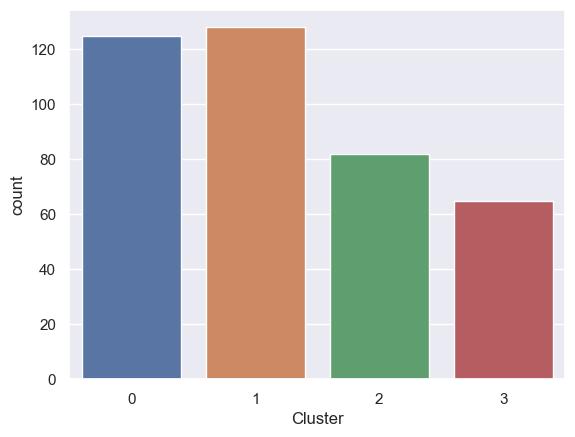

In [65]:
# Set "optimal" Number of Clusters
num_clust = 4

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(greData)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(greData)

# Append Labels to the Data
gre_labeled = greData.copy()
gre_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=gre_labeled["Cluster"])

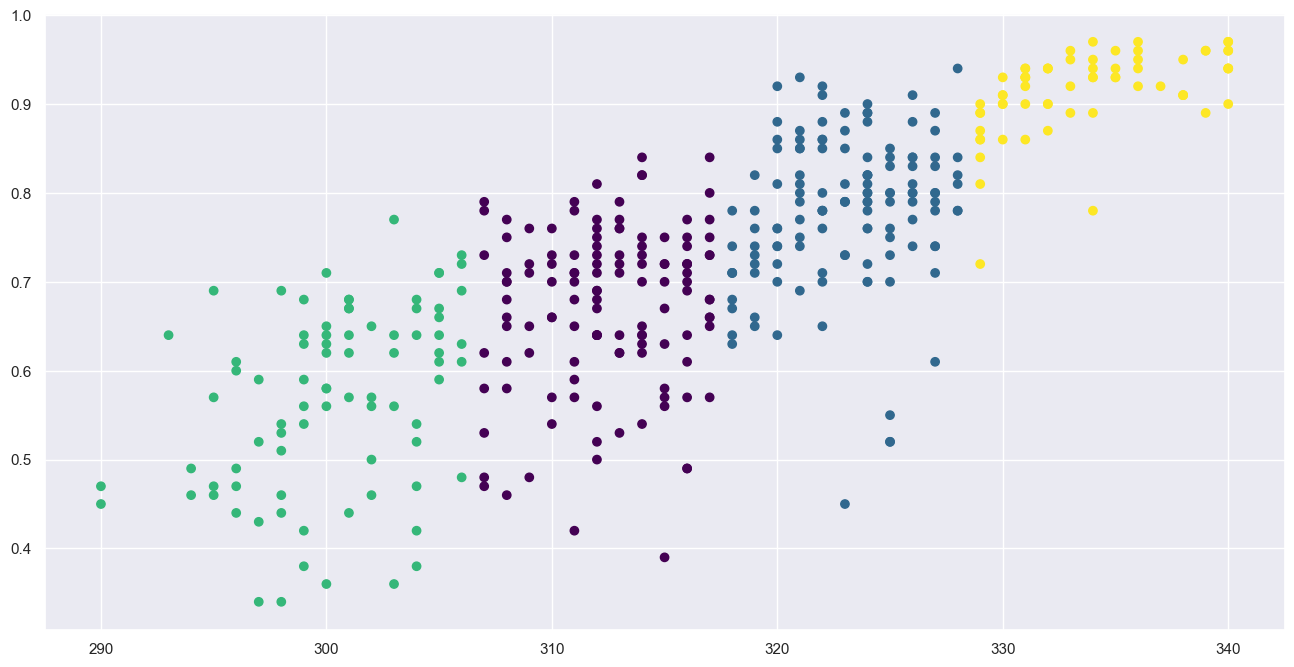

In [66]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GRE Score", y = "Chance of Admit", c = "Cluster", cmap = 'viridis', data = gre_labeled)

## KMeans++ Clustering for GRE Score

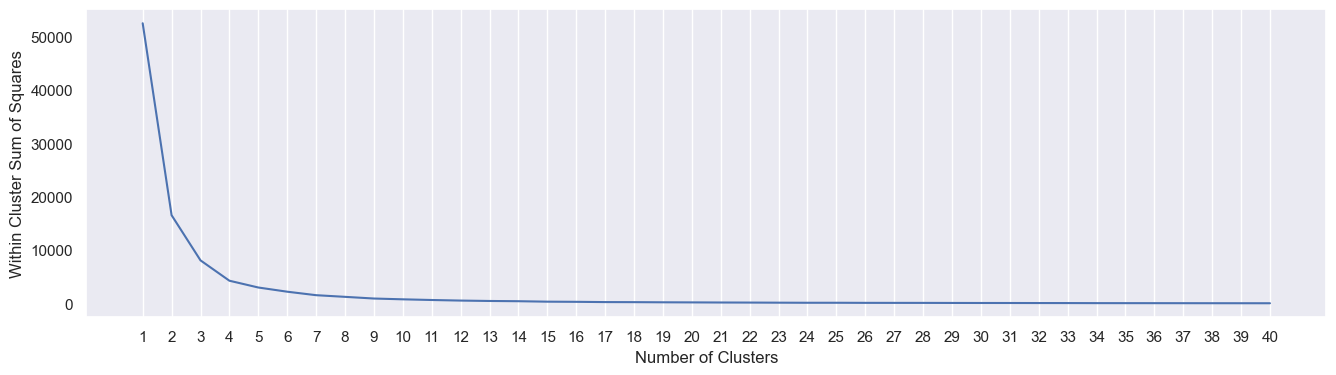

In [67]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust,        # number of clusters
                    init = init_algo,              # initialization algorithm
                    n_init = 5)                    # number of initializations
    kmeans.fit(greData)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

#### Optimal Clustering for GRE Score

Features 	GRE Score 	Chance of Admit

Cluster 0:	333.8	0.92	
Cluster 1:	312.44	0.67	
Cluster 2:	322.99	0.78	
Cluster 3:	300.34	0.57	

Within Cluster Sum of Squares : 4247.617895059802



<AxesSubplot: xlabel='Cluster', ylabel='count'>

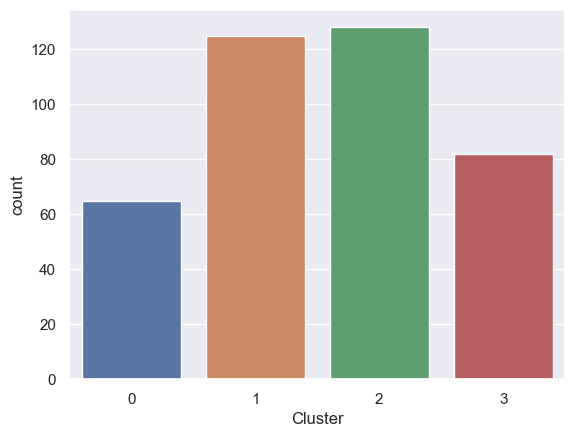

In [68]:
# Set "optimal" Number of Clusters
num_clust = 4

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(greData)

# Print the Cluster Centers
print("Features", "\tGRE Score", "\tChance of Admit")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(greData)

# Append Labels to the Data
gre_labeled = greData.copy()
gre_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=gre_labeled["Cluster"])

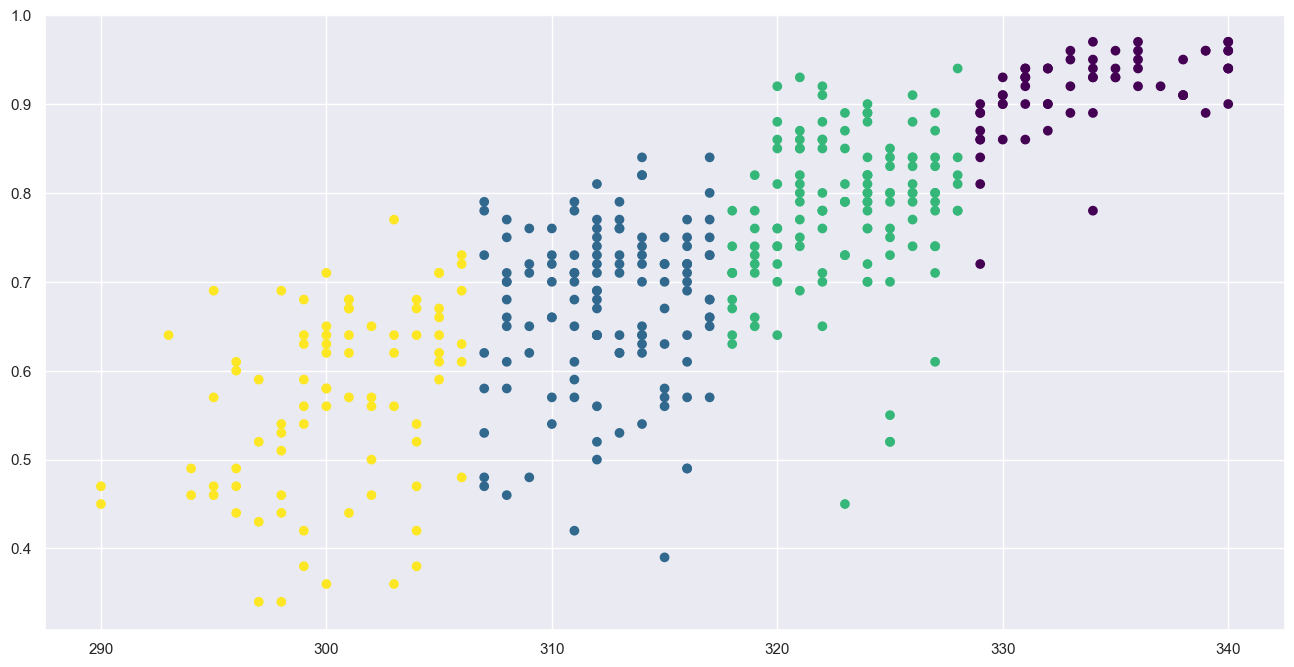

In [69]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GRE Score", y = "Chance of Admit", c = "Cluster", cmap = 'viridis', data = gre_labeled)

## HDBSCAN Clustering for GRE Score

In [70]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=45)
labels = clusterer.fit_predict(greData)


<AxesSubplot: xlabel='Cluster', ylabel='count'>

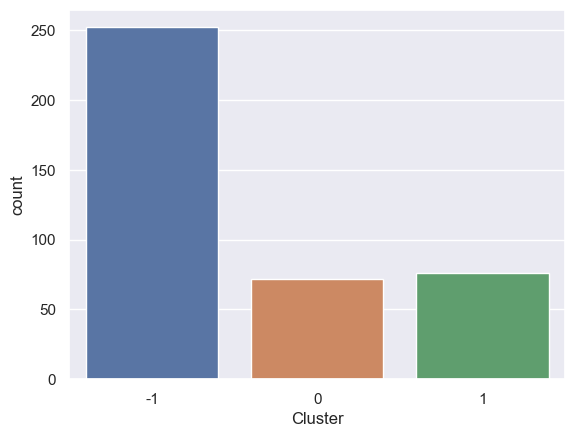

In [71]:

# Append Labels to the Data
gre_labeled = greData.copy()
gre_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=gre_labeled["Cluster"])

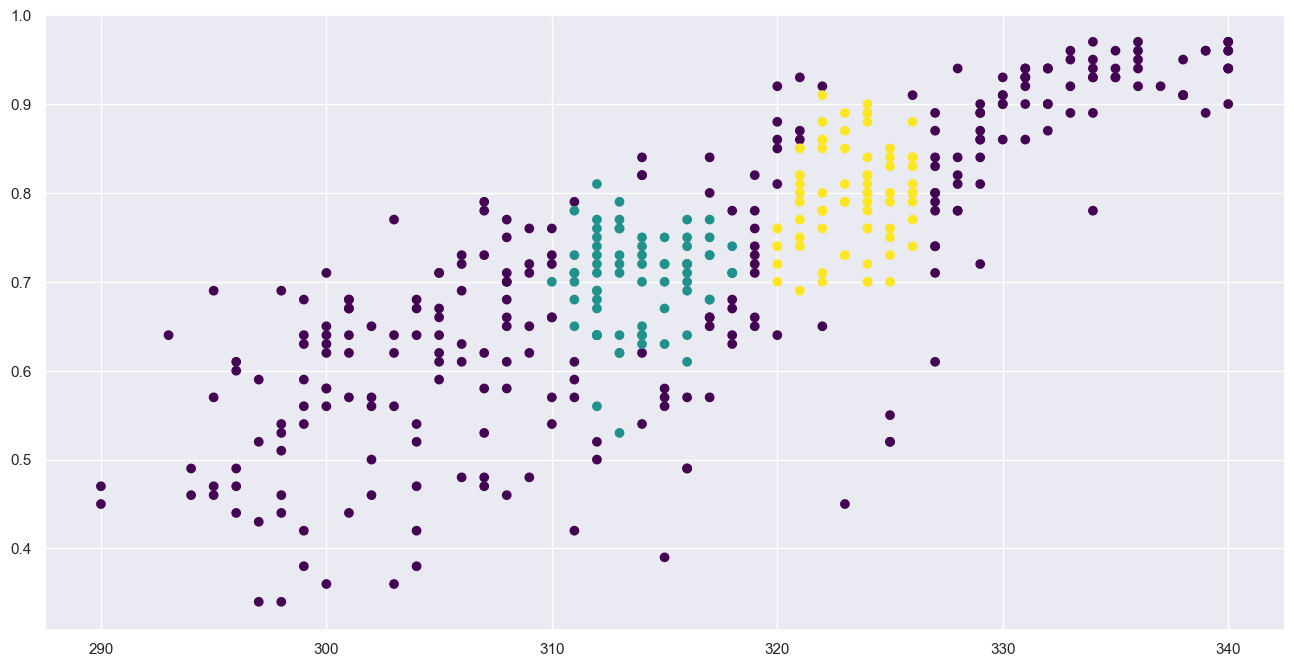

In [72]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GRE Score", y = "Chance of Admit", c = "Cluster", cmap = 'viridis', data = gre_labeled)

<AxesSubplot: xlabel='Chance of Admit', ylabel='Cluster'>

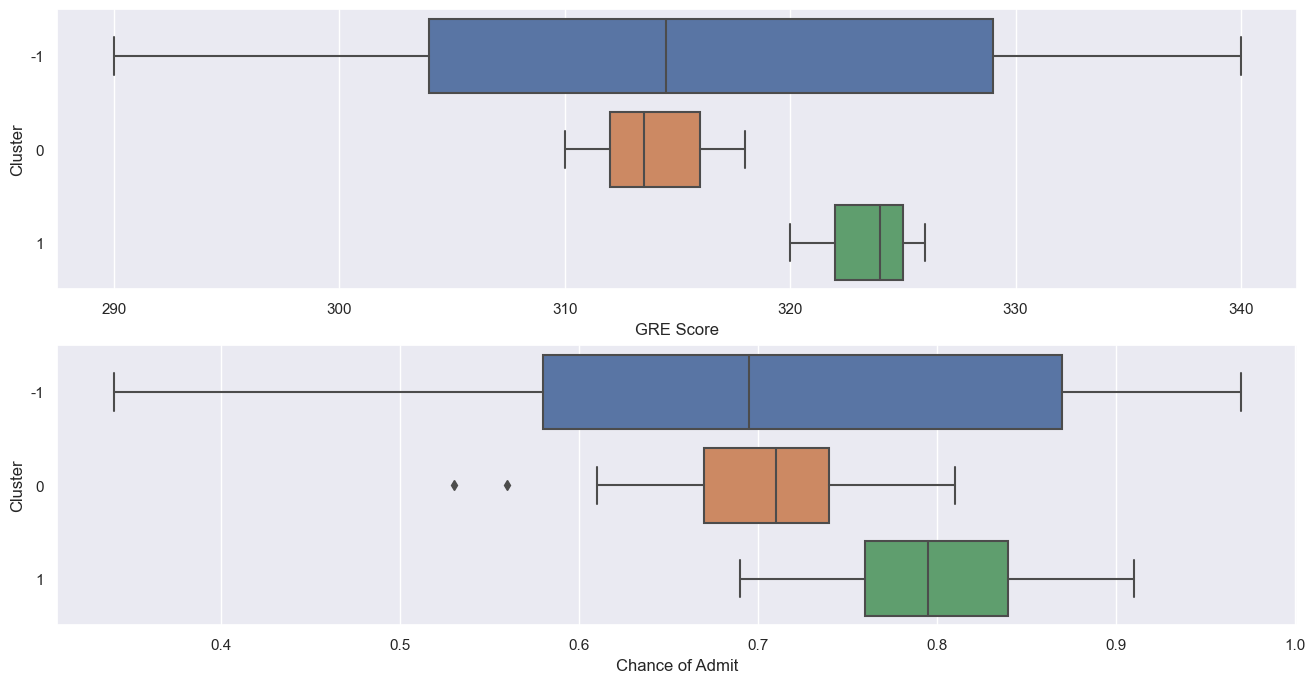

In [73]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'GRE Score', y = 'Cluster', data = gre_labeled, ax = axes[0])
sb.boxplot(x = 'Chance of Admit', y = 'Cluster', data = gre_labeled, ax = axes[1])

<AxesSubplot: xlabel='Cluster'>

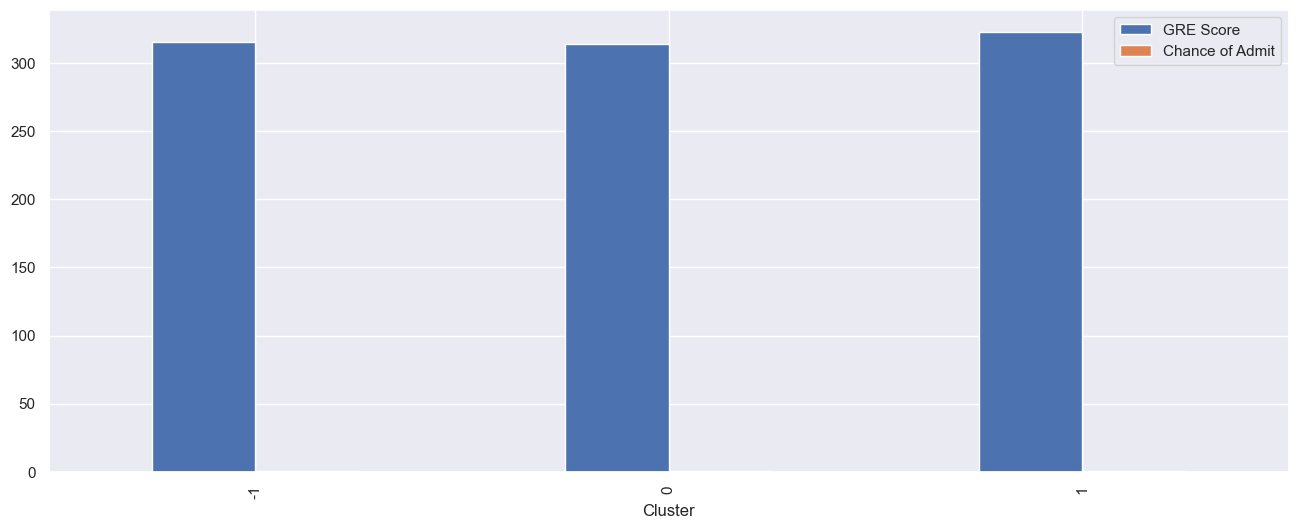

In [74]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(gre_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

## Bi-Variate KMeans Clustering for SOP

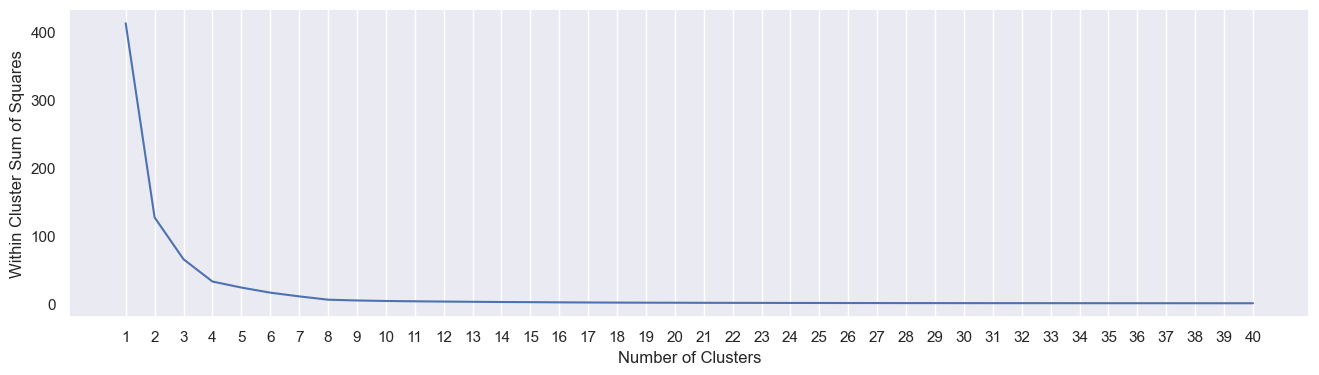

In [75]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(sopData)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

#### Optimal Clustering for SOP


Cluster 0:	2.79	0.67	
Cluster 1:	3.75	0.75	
Cluster 2:	4.71	0.86	
Cluster 3:	1.73	0.57	

Within Cluster Sum of Squares : 32.2624136976565



<AxesSubplot: xlabel='Cluster', ylabel='count'>

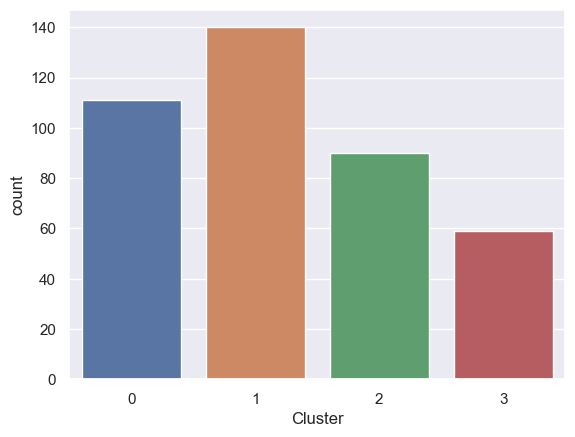

In [76]:
# Set "optimal" Number of Clusters
num_clust = 4

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(sopData)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(sopData)

# Append Labels to the Data
sop_labeled = sopData.copy()
sop_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=sop_labeled["Cluster"])

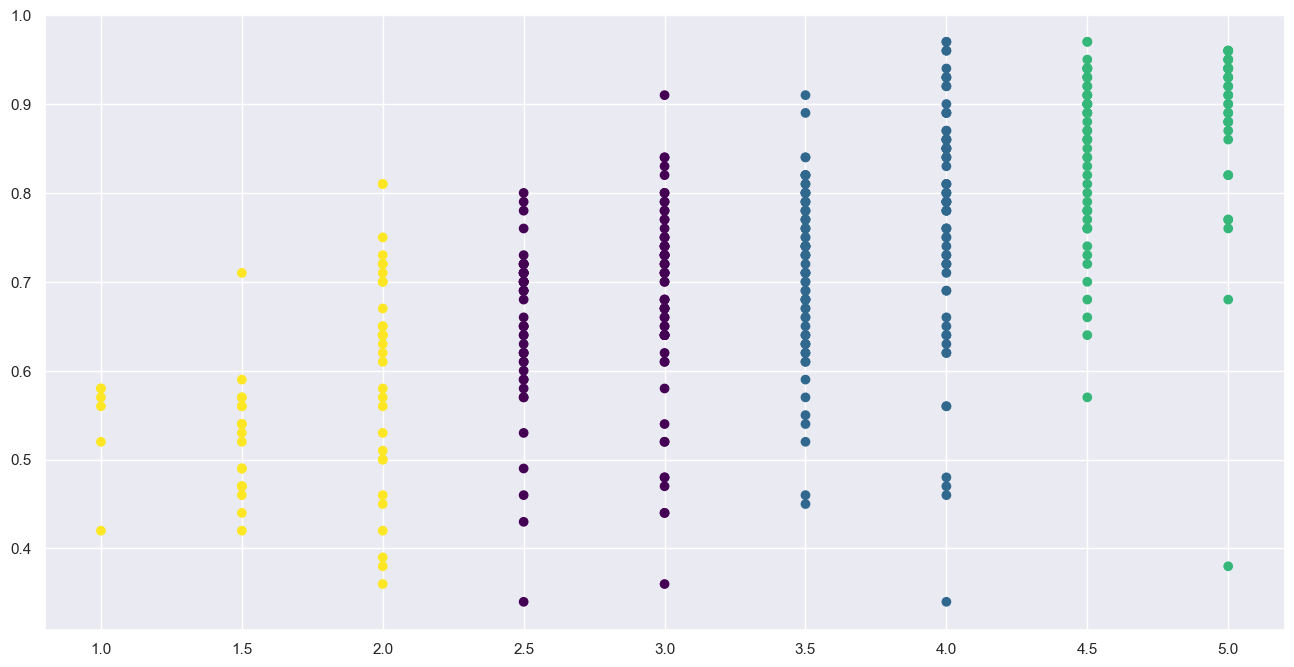

In [77]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "SOP", y = "Chance of Admit", c = "Cluster", cmap = 'viridis', data = sop_labeled)

## KMeans++ Clustering for SOP


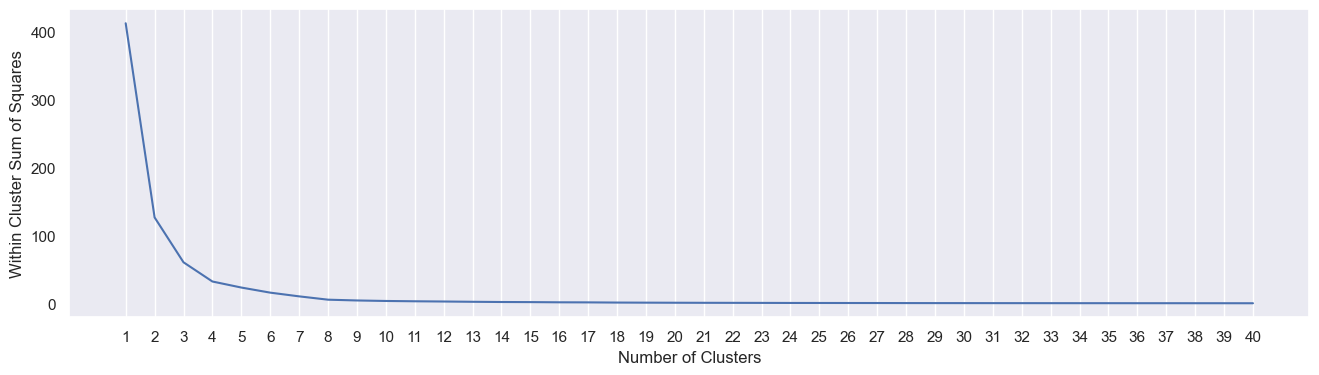

In [78]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust,        # number of clusters
                    init = init_algo,              # initialization algorithm
                    n_init = 5)                    # number of initializations
    kmeans.fit(sopData)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

#### Optimal Clustering for SOP

Features 	SOP 	Chance of Admit

Cluster 0:	4.71	0.86	
Cluster 1:	2.79	0.67	
Cluster 2:	1.73	0.57	
Cluster 3:	4.0	0.78	
Cluster 4:	3.5	0.71	

Within Cluster Sum of Squares : 23.367127269085067



<AxesSubplot: xlabel='Cluster', ylabel='count'>

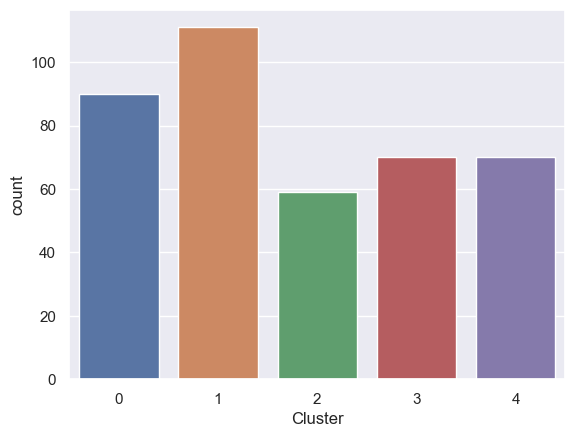

In [79]:
# Set "optimal" Number of Clusters
num_clust = 5

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(sopData)

# Print the Cluster Centers
print("Features", "\tSOP", "\tChance of Admit")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(sopData)

# Append Labels to the Data
sop_labeled = sopData.copy()
sop_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=sop_labeled["Cluster"])

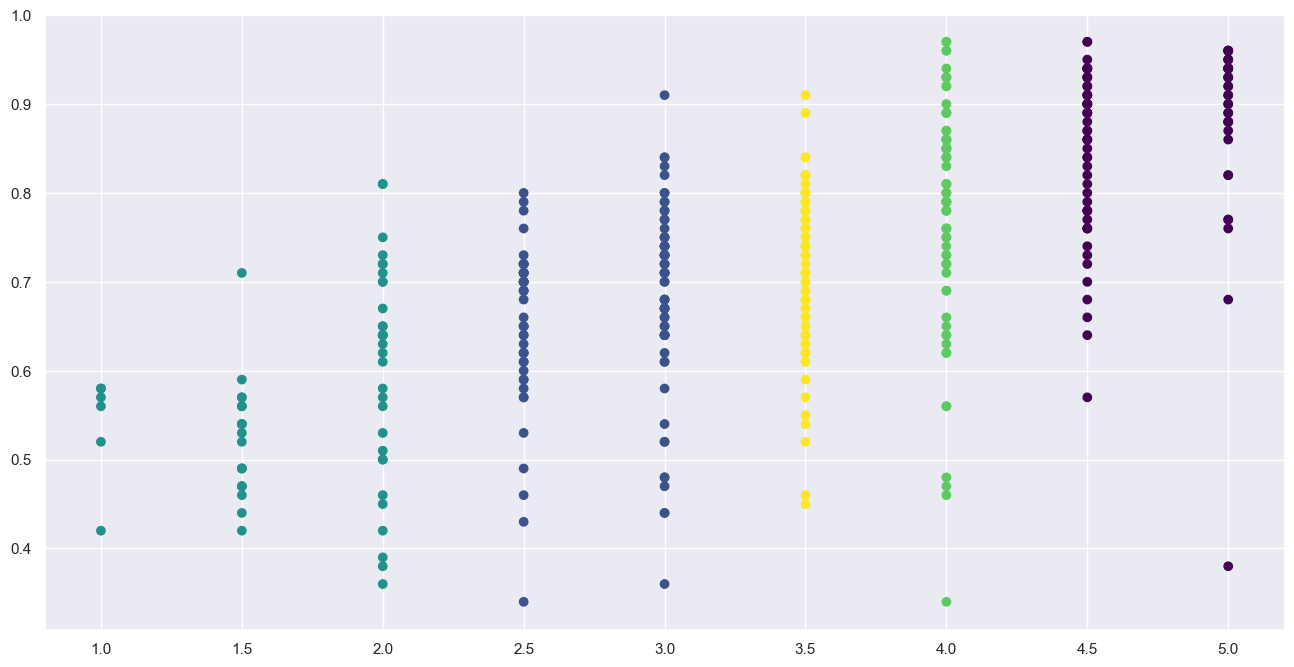

In [80]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "SOP", y = "Chance of Admit", c = "Cluster", cmap = 'viridis', data = sop_labeled)

## HDBSCAN Clustering for SOP

In [81]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=55)
labels = clusterer.fit_predict(sopData)

<AxesSubplot: xlabel='Cluster', ylabel='count'>

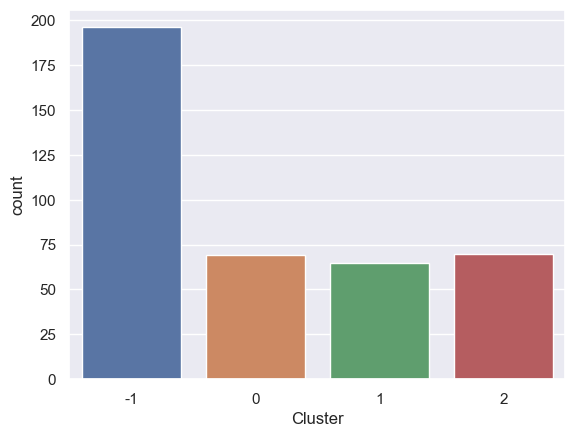

In [82]:

# Append Labels to the Data
sop_labeled = sopData.copy()
sop_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=sop_labeled["Cluster"])

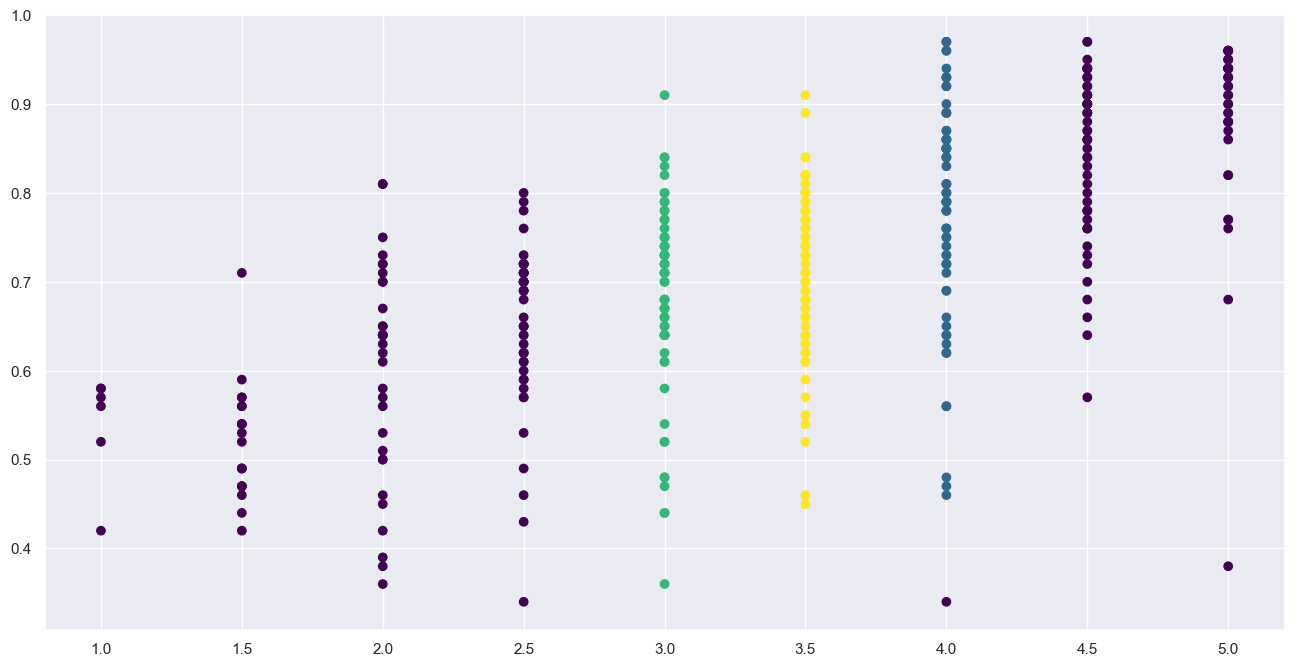

In [83]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "SOP", y = "Chance of Admit", c = "Cluster", cmap = 'viridis', data = sop_labeled)

<AxesSubplot: xlabel='Chance of Admit', ylabel='Cluster'>

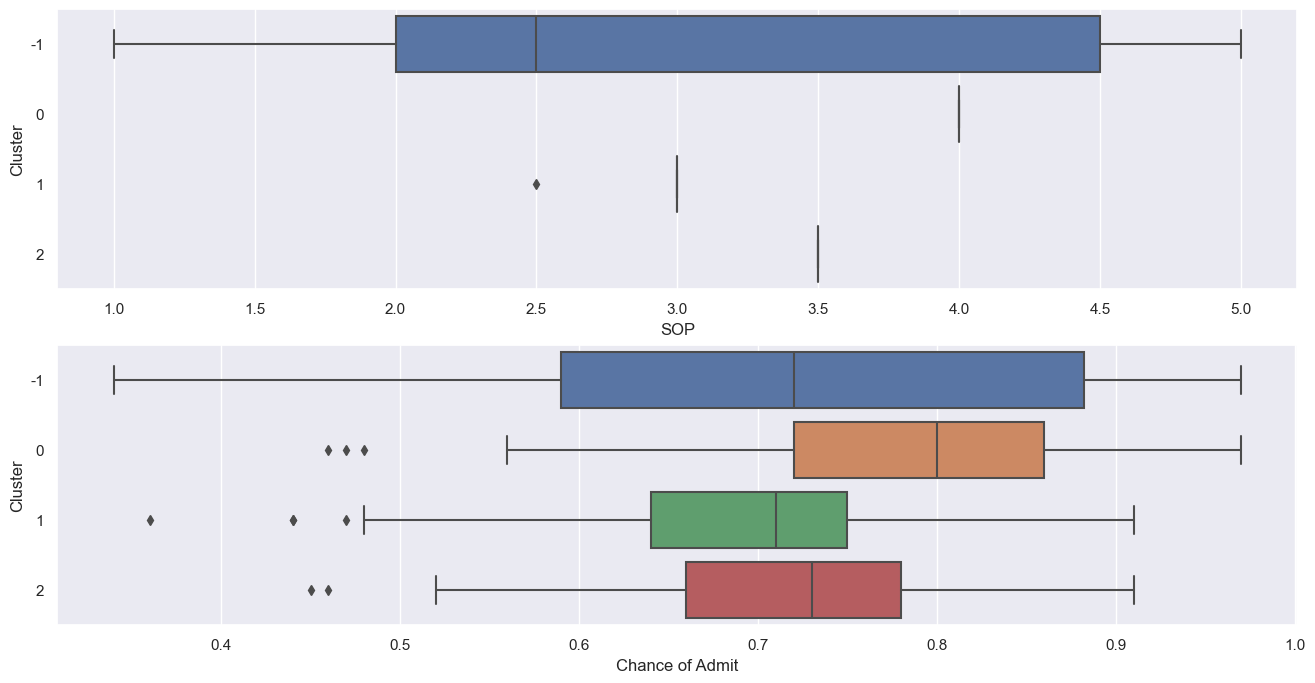

In [84]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'SOP', y = 'Cluster', data = sop_labeled, ax = axes[0])
sb.boxplot(x = 'Chance of Admit', y = 'Cluster', data = sop_labeled, ax = axes[1])

<AxesSubplot: xlabel='Cluster'>

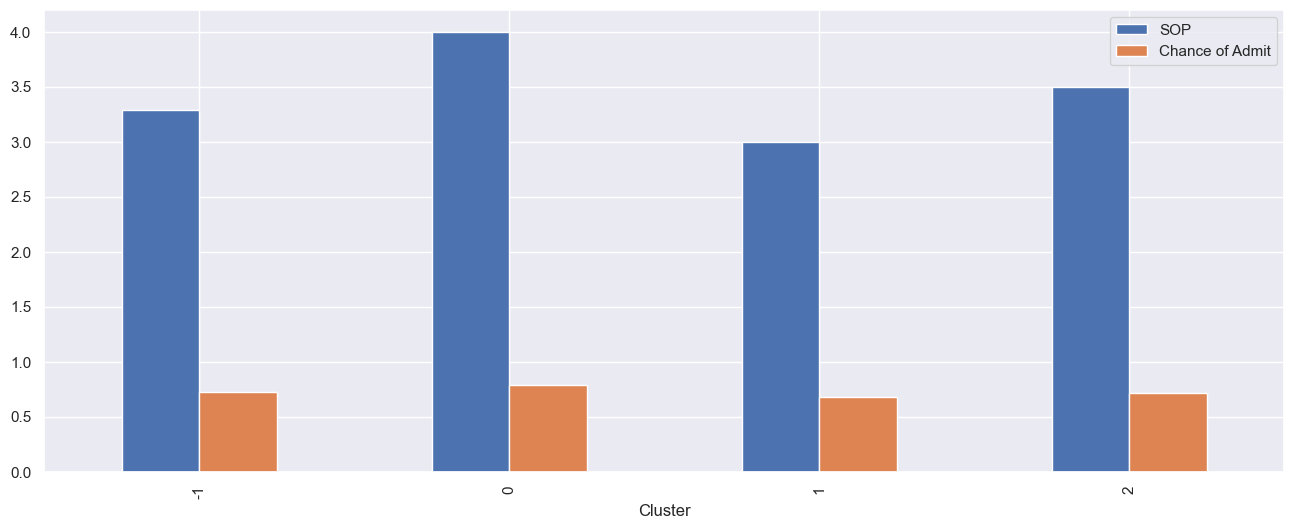

In [85]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(sop_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

## Bi-Variate KMeans Clustering for CGPA

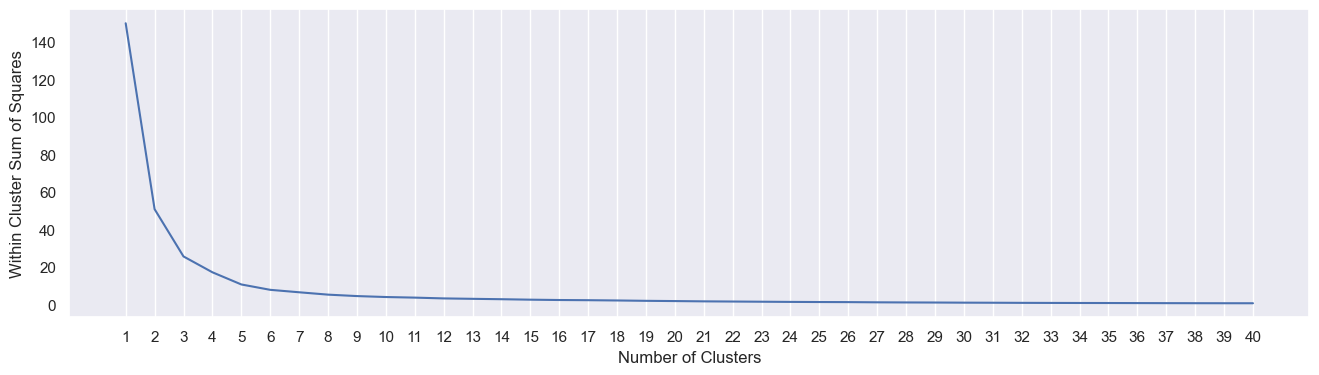

In [86]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(cgpaData)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

Cluster 0:	9.29	0.88	
Cluster 1:	7.86	0.57	
Cluster 2:	8.55	0.71	

Within Cluster Sum of Squares : 25.712629643960845



<AxesSubplot: xlabel='Cluster', ylabel='count'>

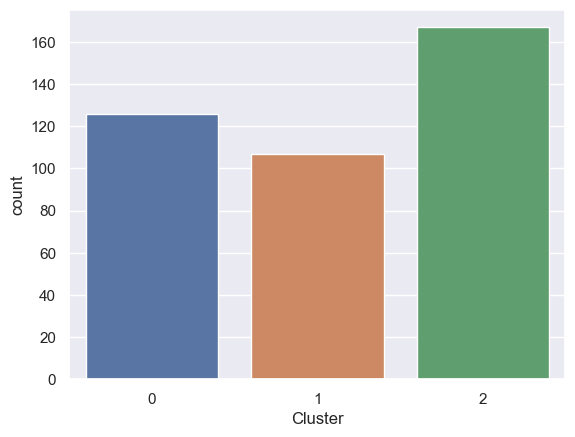

In [87]:
# Set "optimal" Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(cgpaData)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(cgpaData)

# Append Labels to the Data
cgpa_labeled = cgpaData.copy()
cgpa_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=cgpa_labeled["Cluster"])

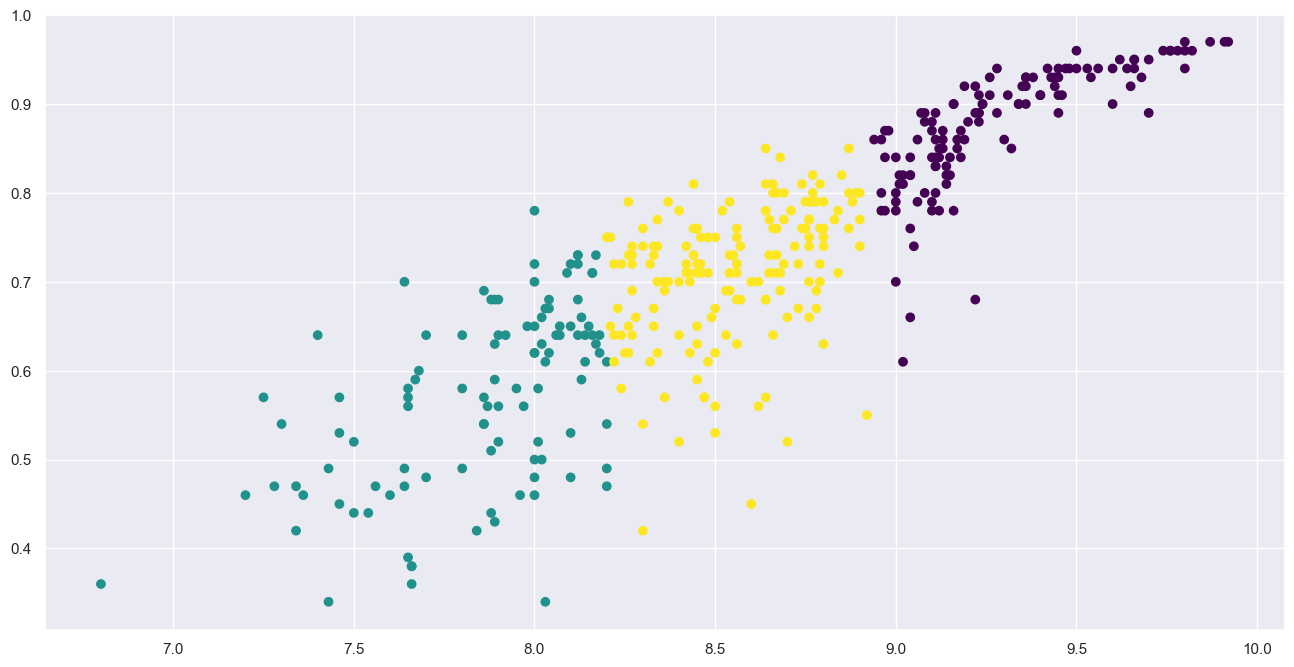

In [88]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "CGPA", y = "Chance of Admit", c = "Cluster", cmap = 'viridis', data = cgpa_labeled)

## KMeans++ Clustering for CGPA

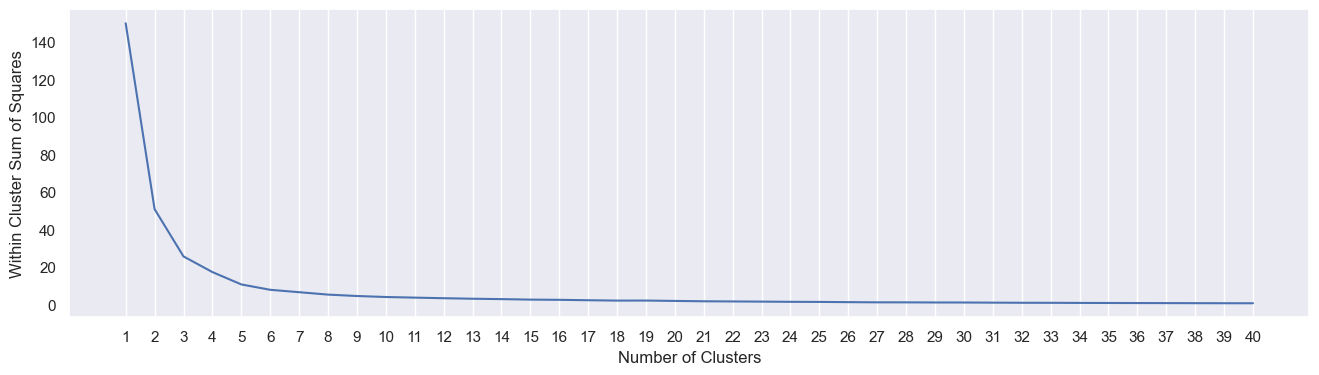

In [89]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust,        # number of clusters
                    init = init_algo,              # initialization algorithm
                    n_init = 5)                    # number of initializations
    kmeans.fit(cgpaData)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

#### Optimal Clustering for CGPA


Features 	CGPA 	Chance of Admit

Cluster 0:	9.29	0.88	
Cluster 1:	8.55	0.71	
Cluster 2:	7.86	0.57	

Within Cluster Sum of Squares : 25.712629643960845



<AxesSubplot: xlabel='Cluster', ylabel='count'>

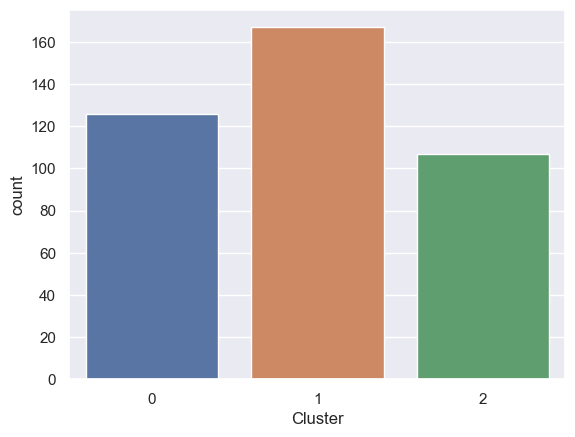

In [90]:
# Set "optimal" Number of Clusters
num_clust = 3

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(cgpaData)

# Print the Cluster Centers
print("Features", "\tCGPA", "\tChance of Admit")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(cgpaData)

# Append Labels to the Data
cgpa_labeled = cgpaData.copy()
cgpa_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=cgpa_labeled["Cluster"])

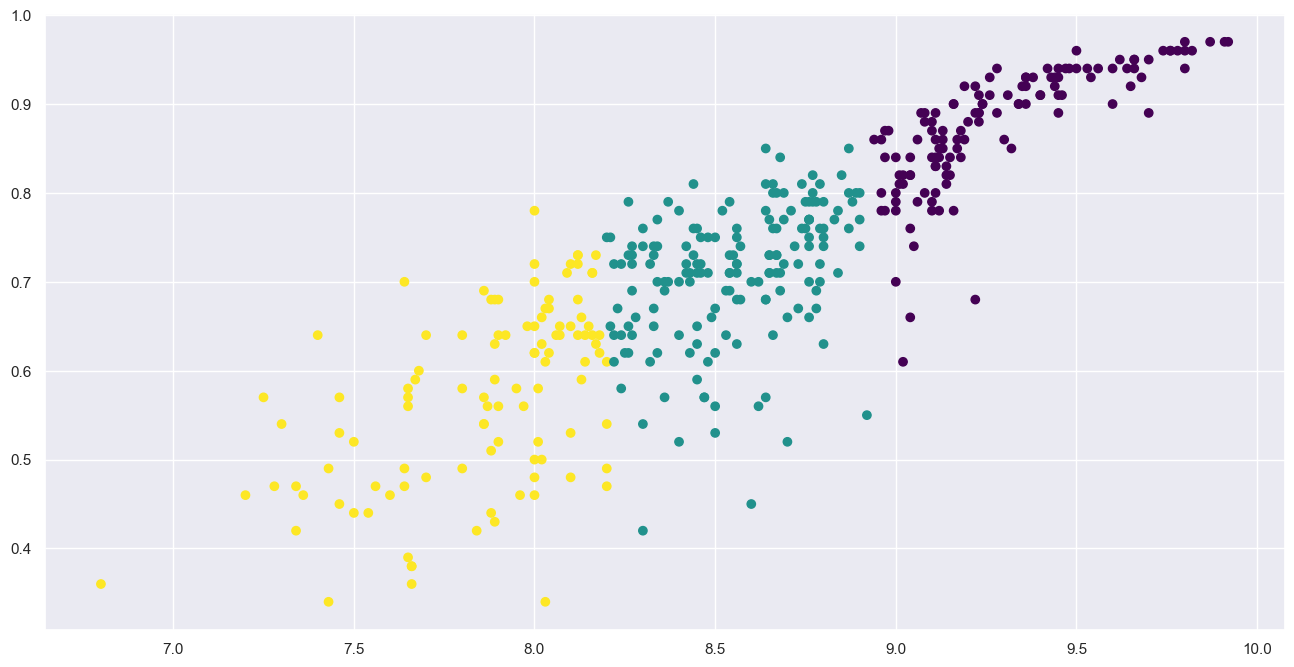

In [91]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "CGPA", y = "Chance of Admit", c = "Cluster", cmap = 'viridis', data = cgpa_labeled)

## HDBSCAN Clustering for CGPA

In [92]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=25)
labels = clusterer.fit_predict(cgpaData)

<AxesSubplot: xlabel='Cluster', ylabel='count'>

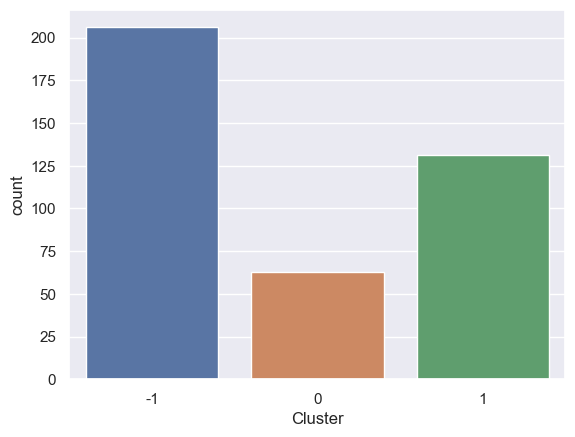

In [93]:

# Append Labels to the Data
cgpa_labeled = cgpaData.copy()
cgpa_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=cgpa_labeled["Cluster"])

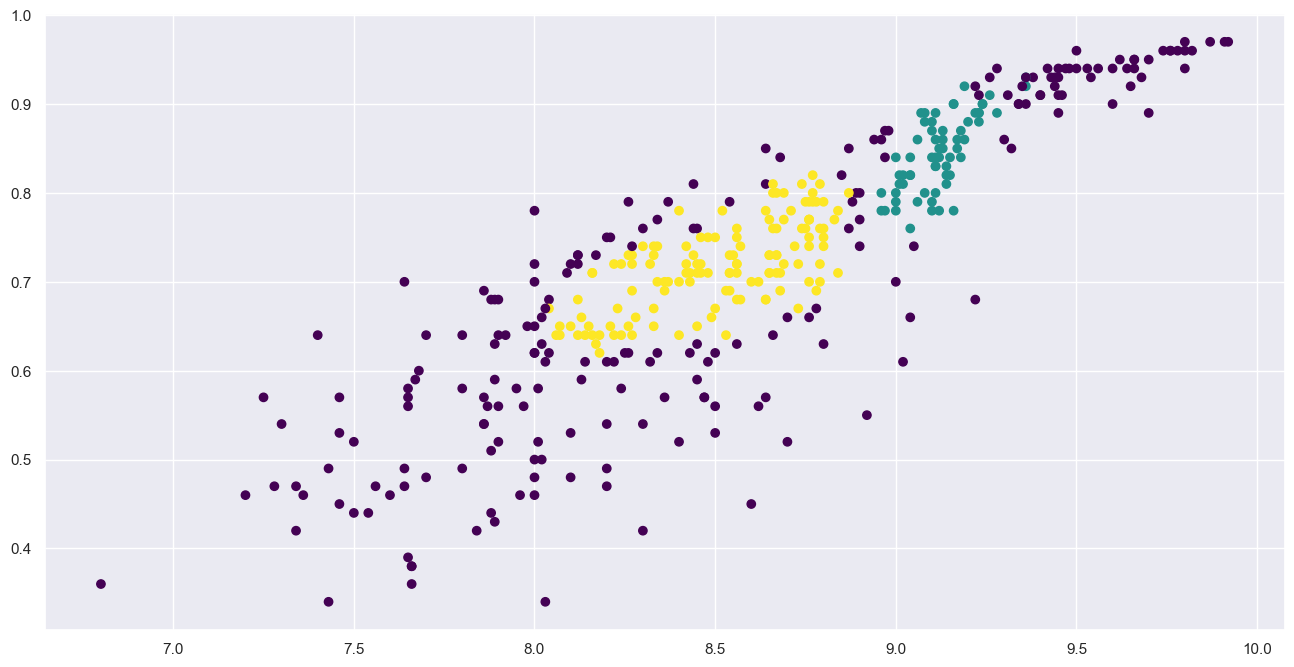

In [94]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "CGPA", y = "Chance of Admit", c = "Cluster", cmap = 'viridis', data = cgpa_labeled)

<AxesSubplot: xlabel='Chance of Admit', ylabel='Cluster'>

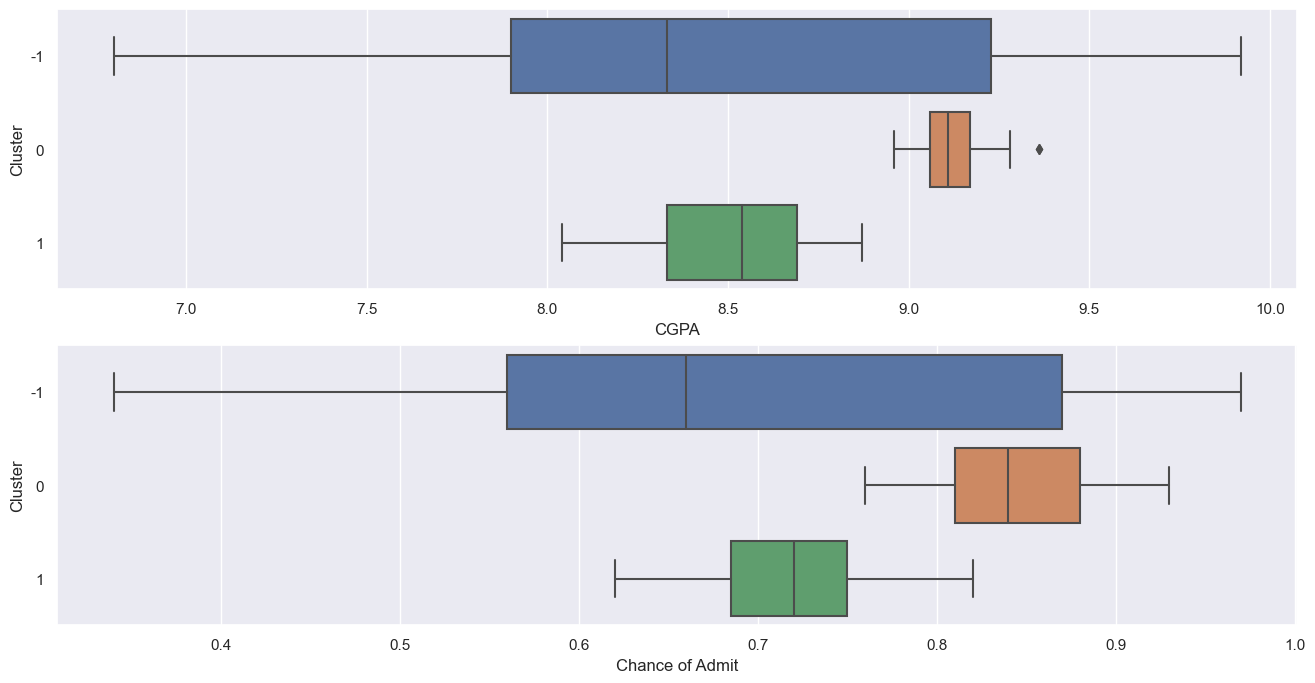

In [95]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'CGPA', y = 'Cluster', data = cgpa_labeled, ax = axes[0])
sb.boxplot(x = 'Chance of Admit', y = 'Cluster', data = cgpa_labeled, ax = axes[1])

<AxesSubplot: xlabel='Cluster'>

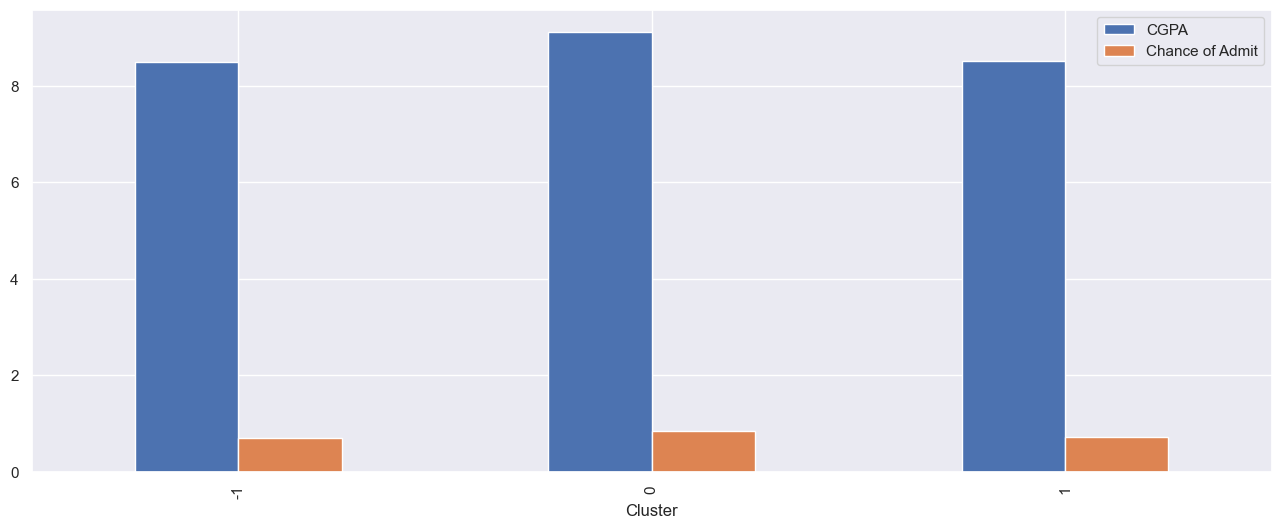

In [96]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(cgpa_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

## Multi-Variate Clustering Using k++

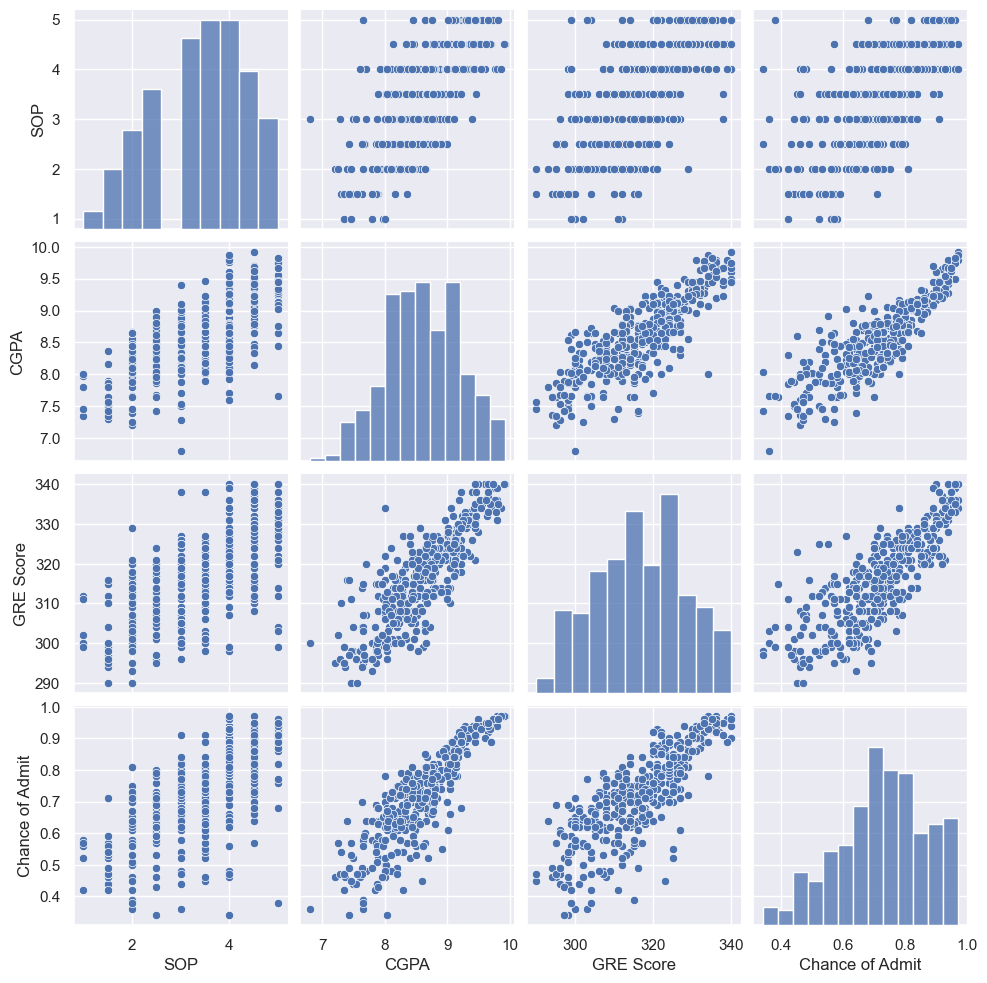

In [97]:
# Extract the Features from the Data
X = pd.DataFrame(data[["SOP", "CGPA", "GRE Score", "Chance of Admit"]]) 

# Plot the Raw Data on 2D grids
sb.pairplot(X)

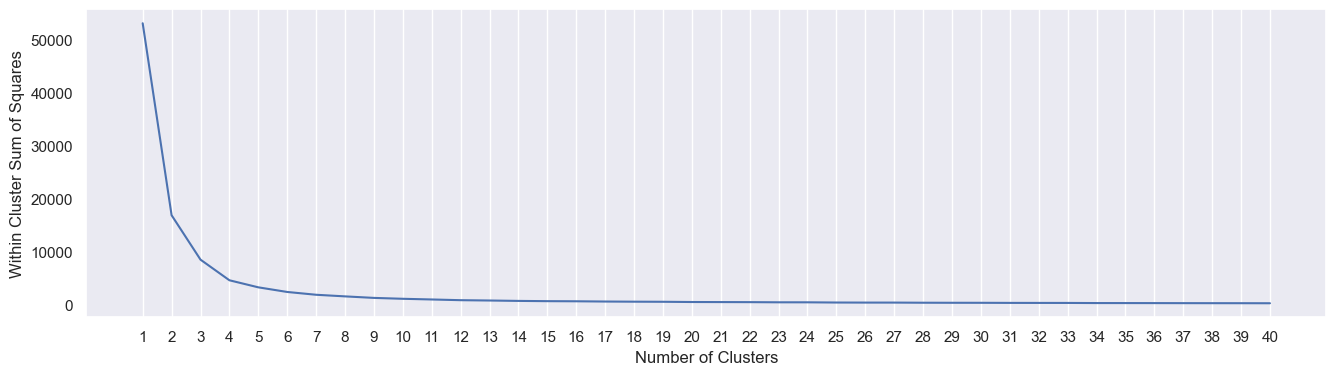

In [98]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [99]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 4
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=4, n_init=20)

Features 	SOP 	CGPA 	GRE Score 	Chance of Admit

Cluster 0:	3.7	8.83	322.99	0.78	
Cluster 1:	3.08	8.35	312.44	0.67	
Cluster 2:	4.46	9.43	333.8	0.92	
Cluster 3:	2.57	7.96	300.34	0.57	

Within Cluster Sum of Squares : 4547.629275798547



<AxesSubplot: xlabel='Cluster', ylabel='count'>

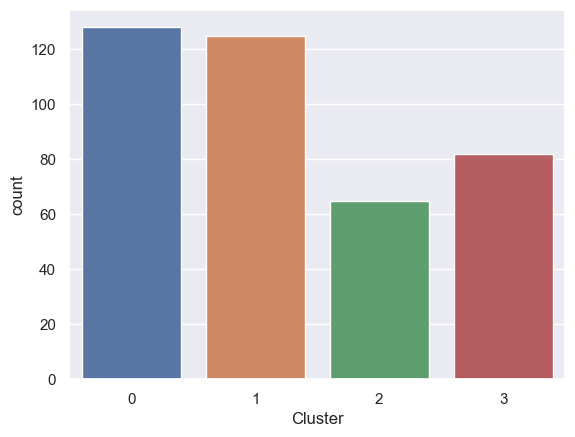

In [100]:
# Print the Cluster Centers
print("Features", "\tSOP", "\tCGPA", "\tGRE Score", "\tChance of Admit")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=X_labeled["Cluster"])

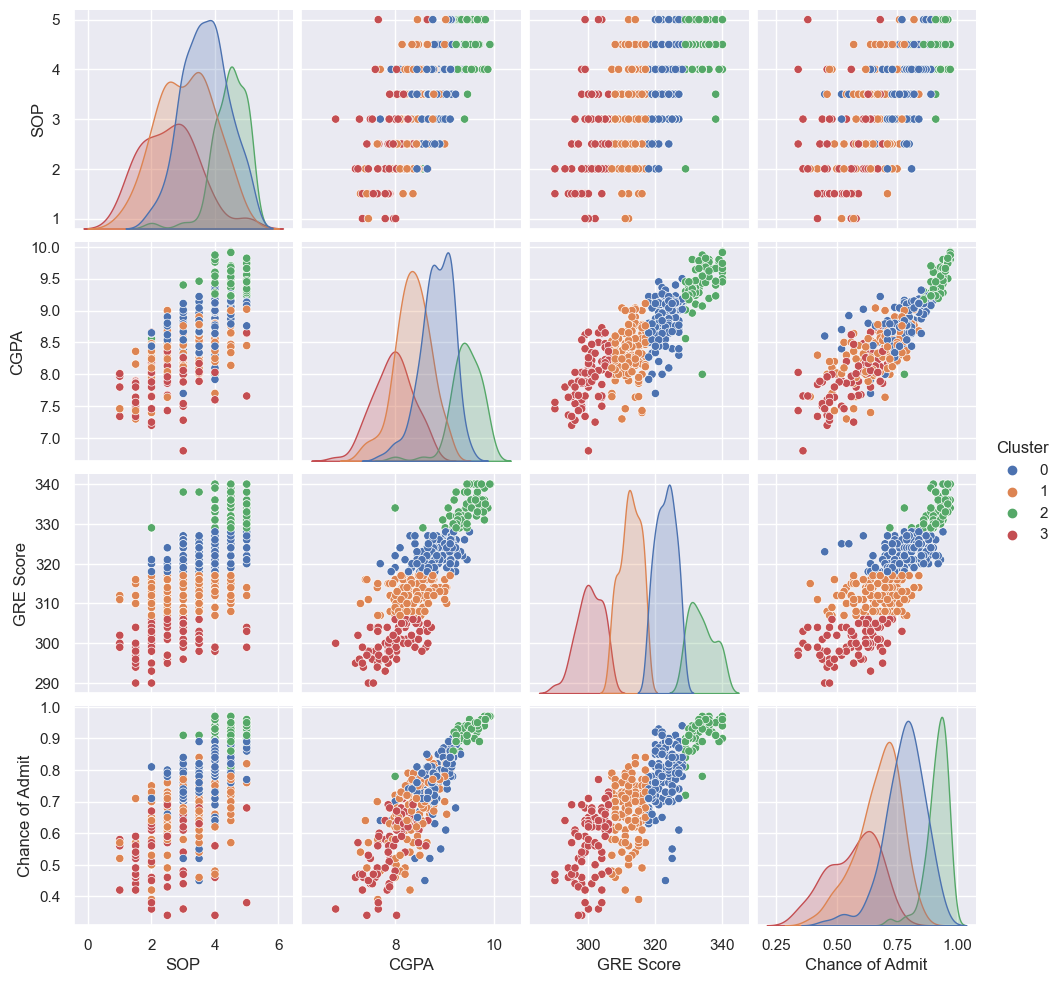

In [101]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Cluster")

<AxesSubplot: xlabel='Chance of Admit', ylabel='Cluster'>

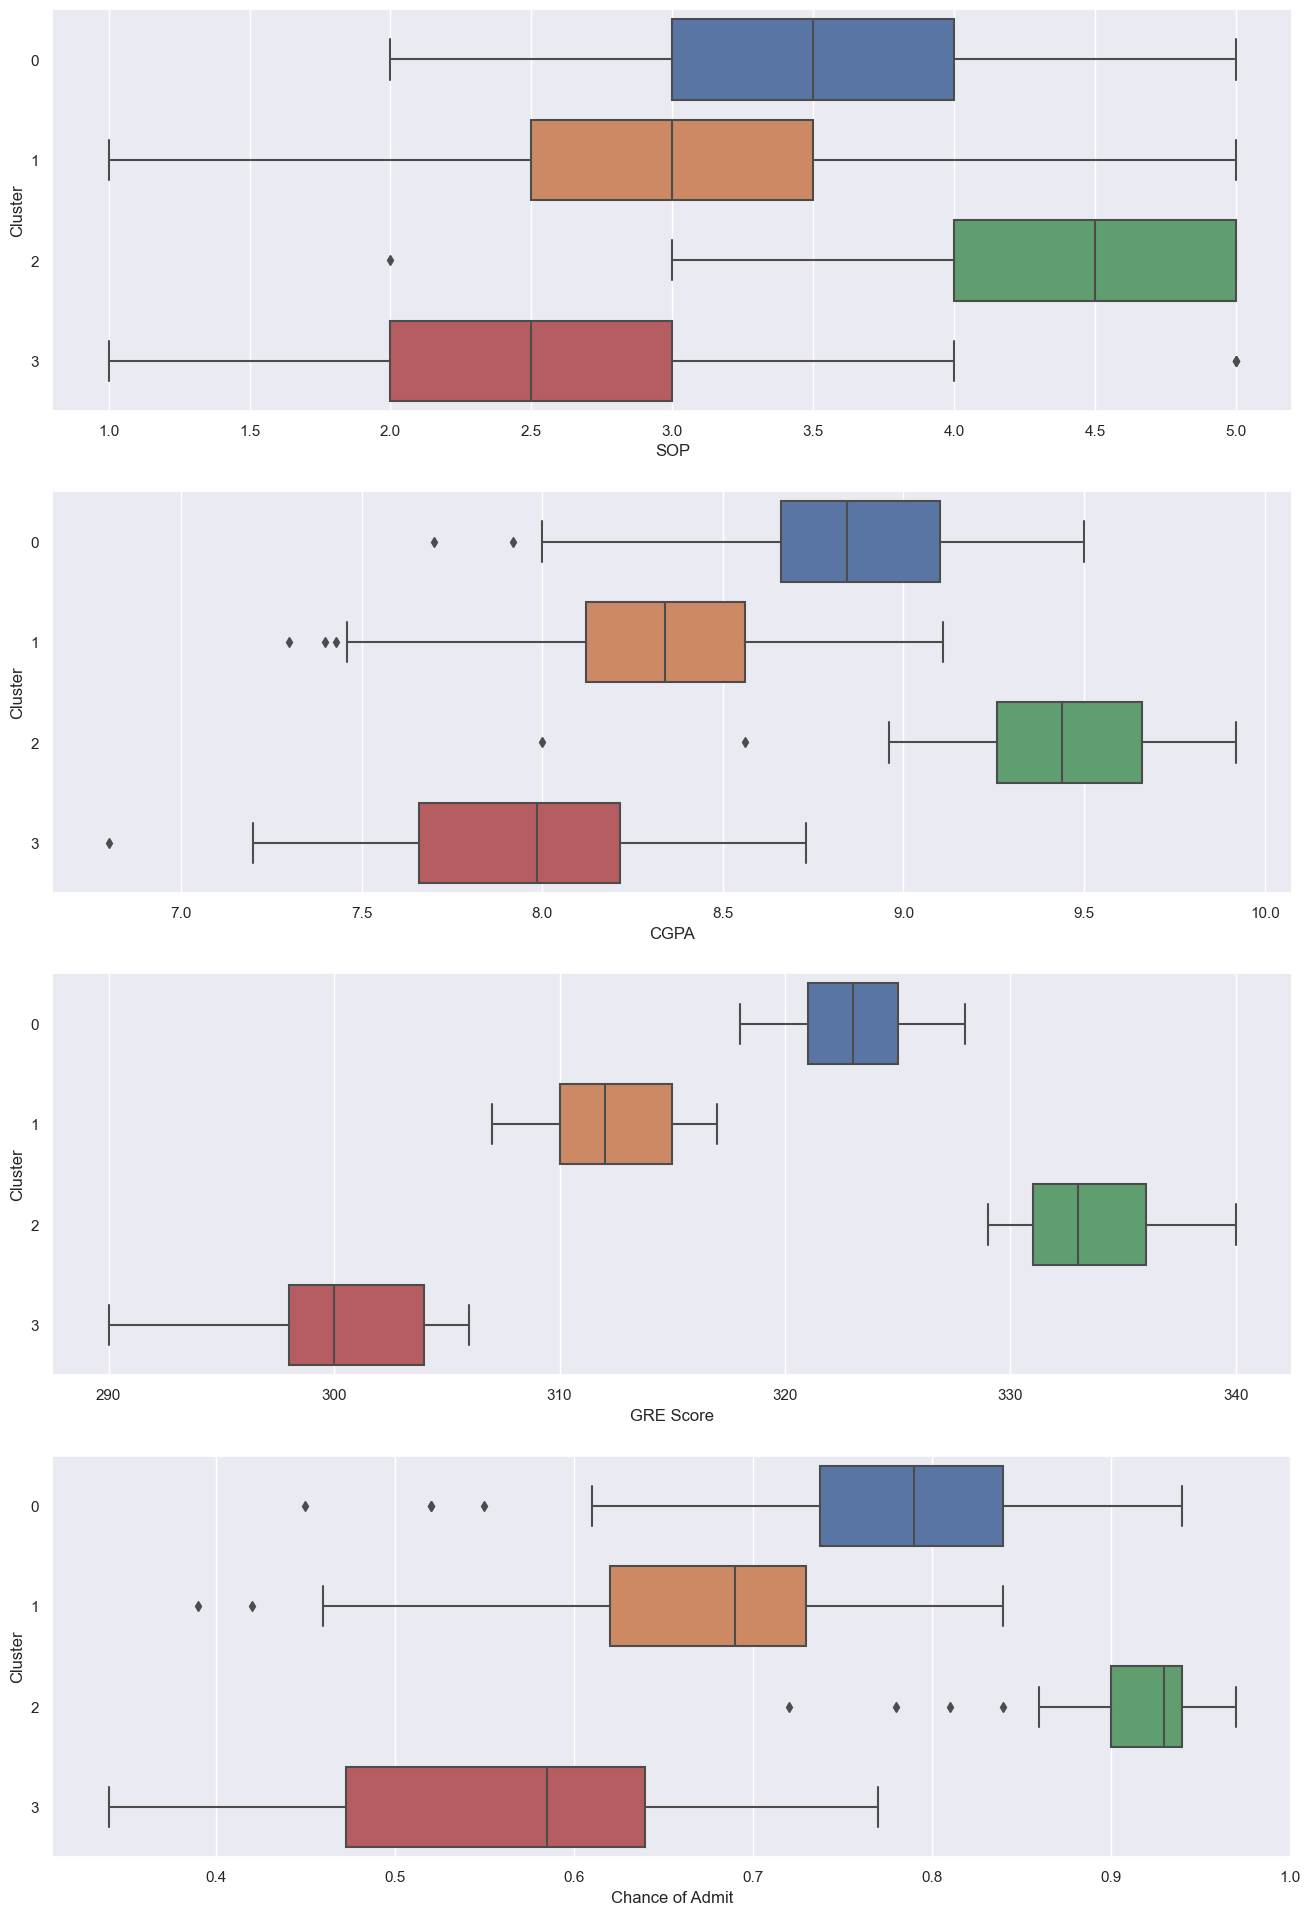

In [102]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(4, 1, figsize=(16,24))
sb.boxplot(x = 'SOP', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'CGPA', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'GRE Score', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'Chance of Admit', y = 'Cluster', data = X_labeled, ax = axes[3])


<AxesSubplot: xlabel='Cluster'>

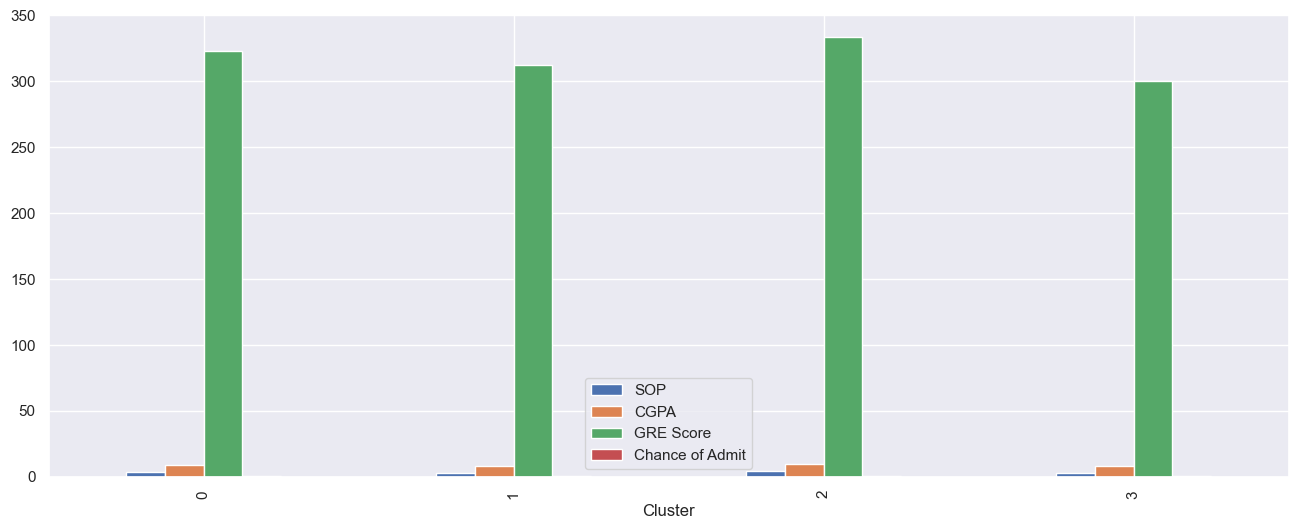

In [103]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

## Multi-Variate Clustering using HDBSCAN

In [104]:
import hdbscan

# Extract the Features from the Data
X = pd.DataFrame(data[["SOP", "CGPA", "GRE Score", "Chance of Admit"]])
clusterer = hdbscan.HDBSCAN(min_cluster_size=50)
labels = clusterer.fit_predict(X)

<AxesSubplot: xlabel='Cluster', ylabel='count'>

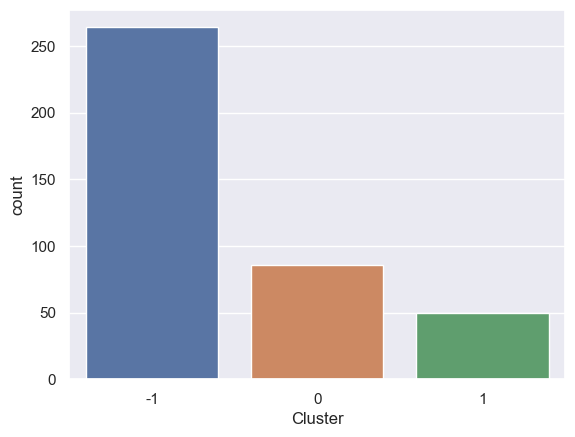

In [105]:

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=X_labeled["Cluster"])


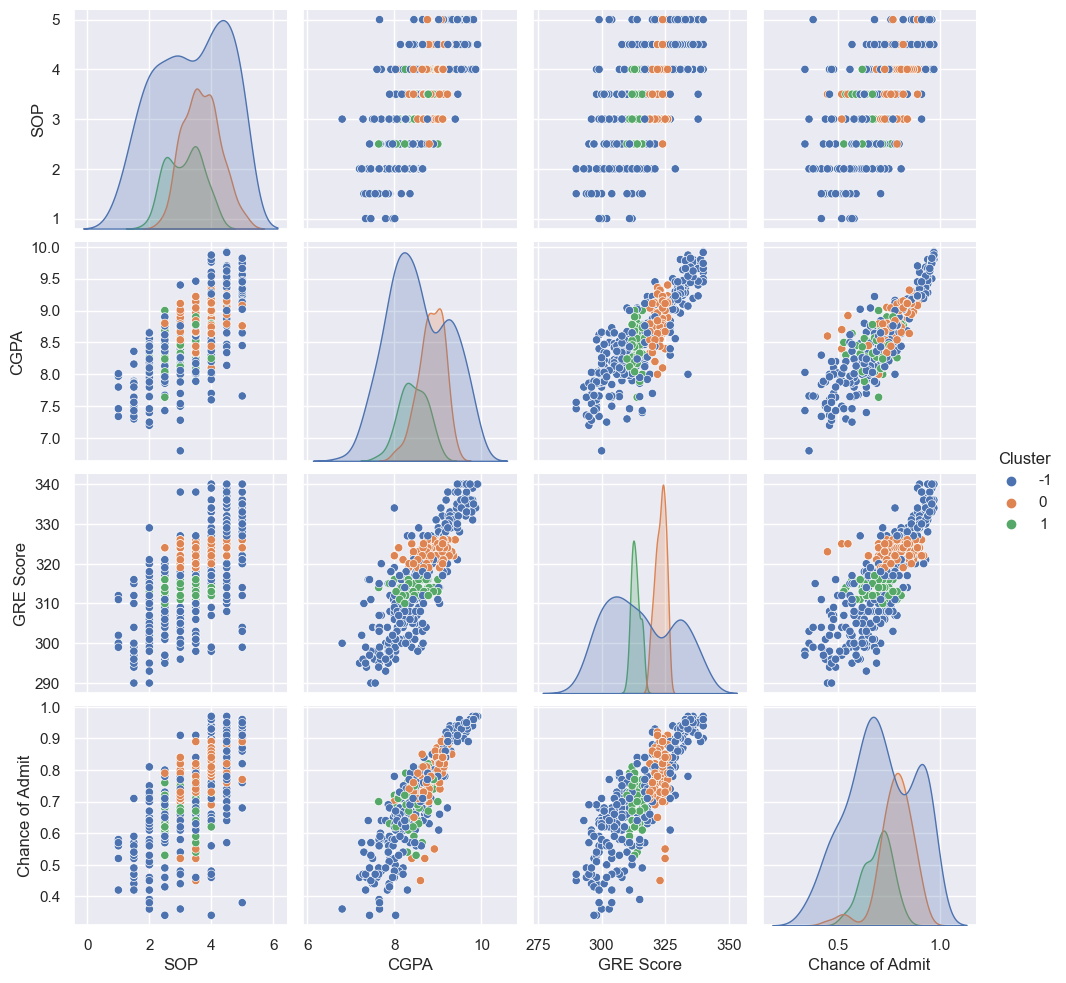

In [106]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, hue = "Cluster")

<AxesSubplot: xlabel='Chance of Admit', ylabel='Cluster'>

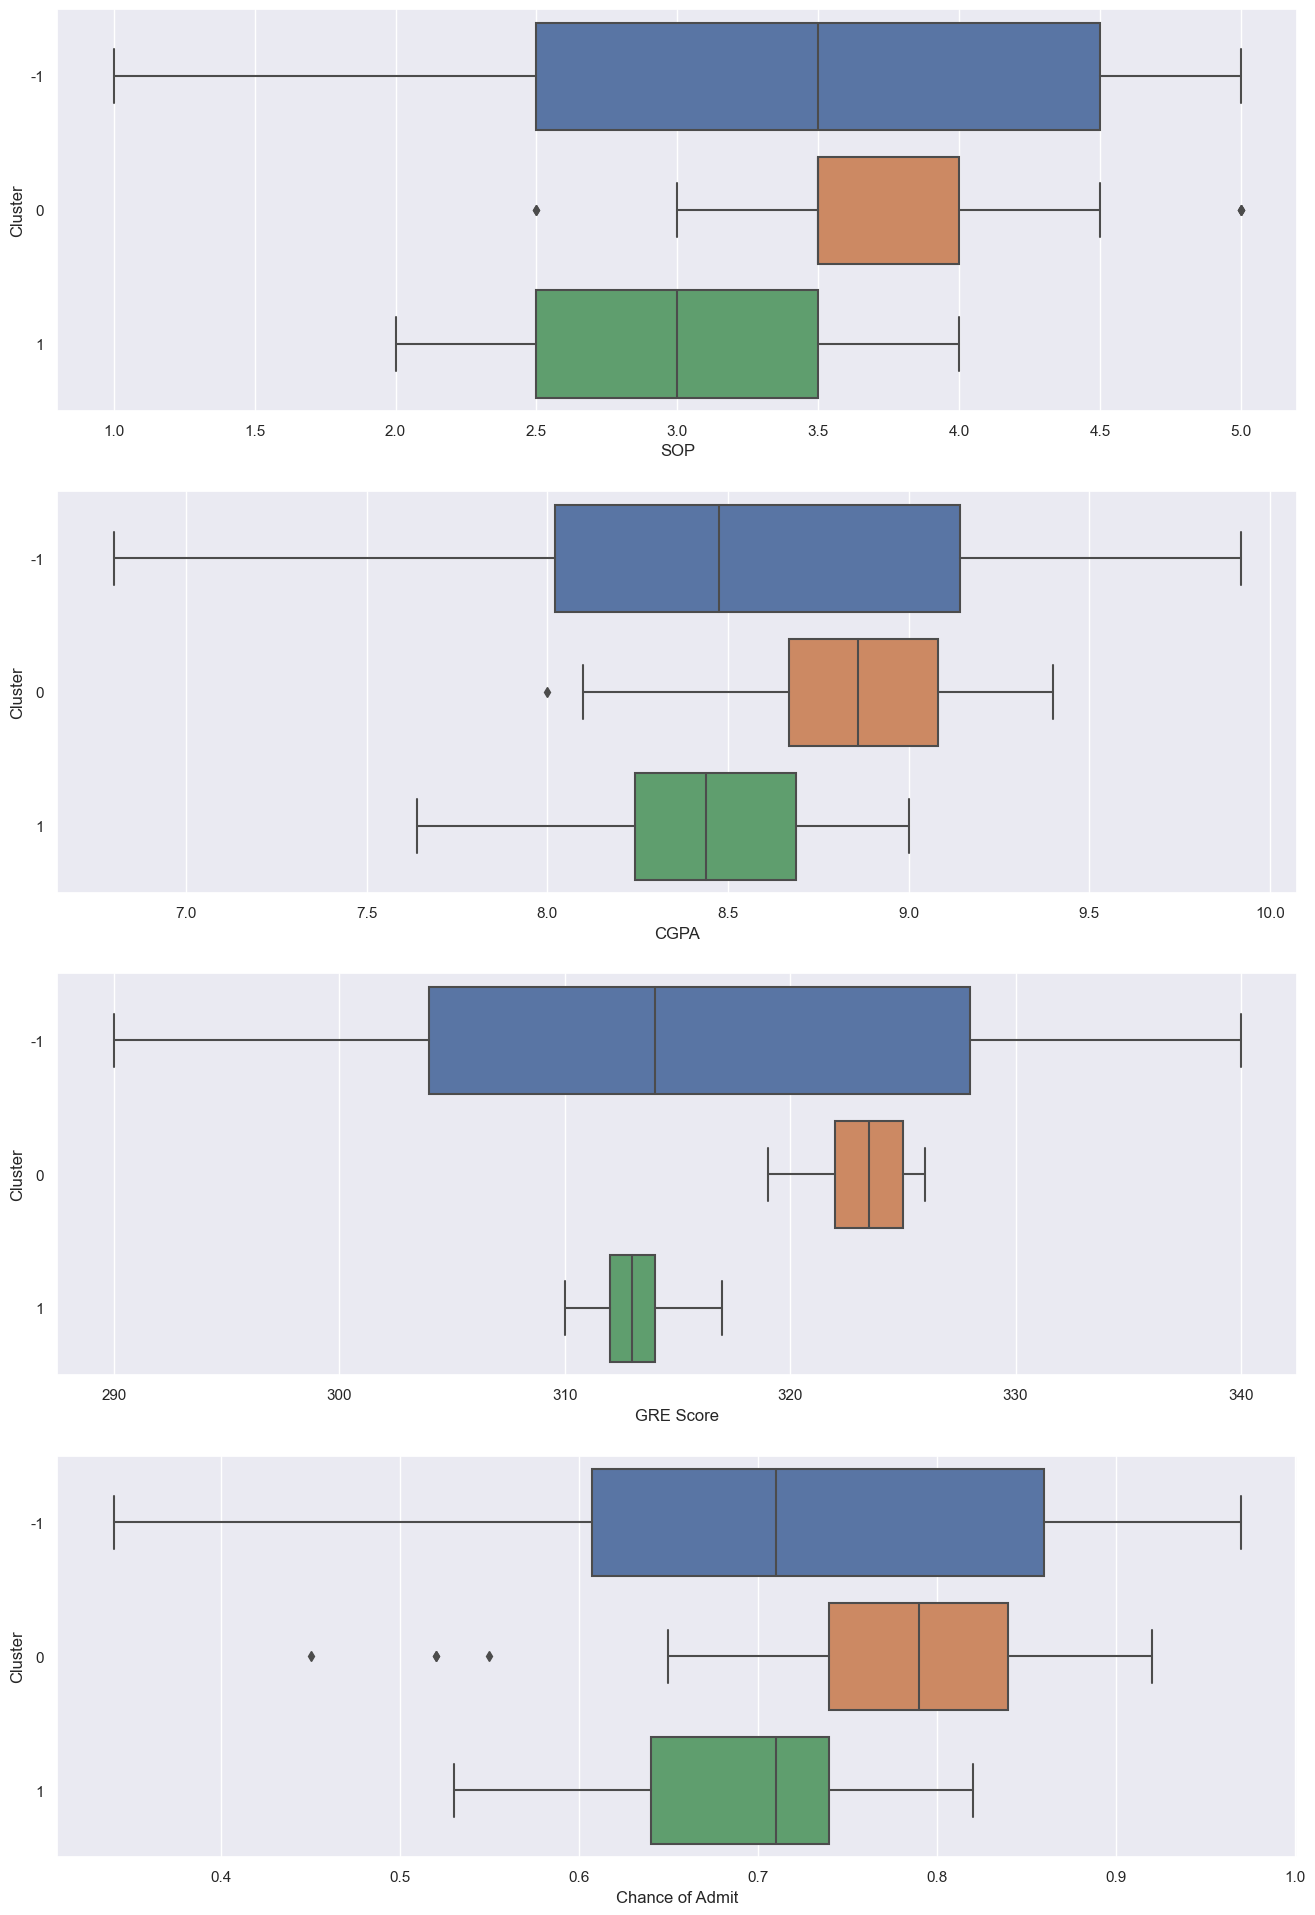

In [107]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(4, 1, figsize=(16,24))
sb.boxplot(x = 'SOP', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'CGPA', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'GRE Score', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'Chance of Admit', y = 'Cluster', data = X_labeled, ax = axes[3])


<AxesSubplot: xlabel='Cluster'>

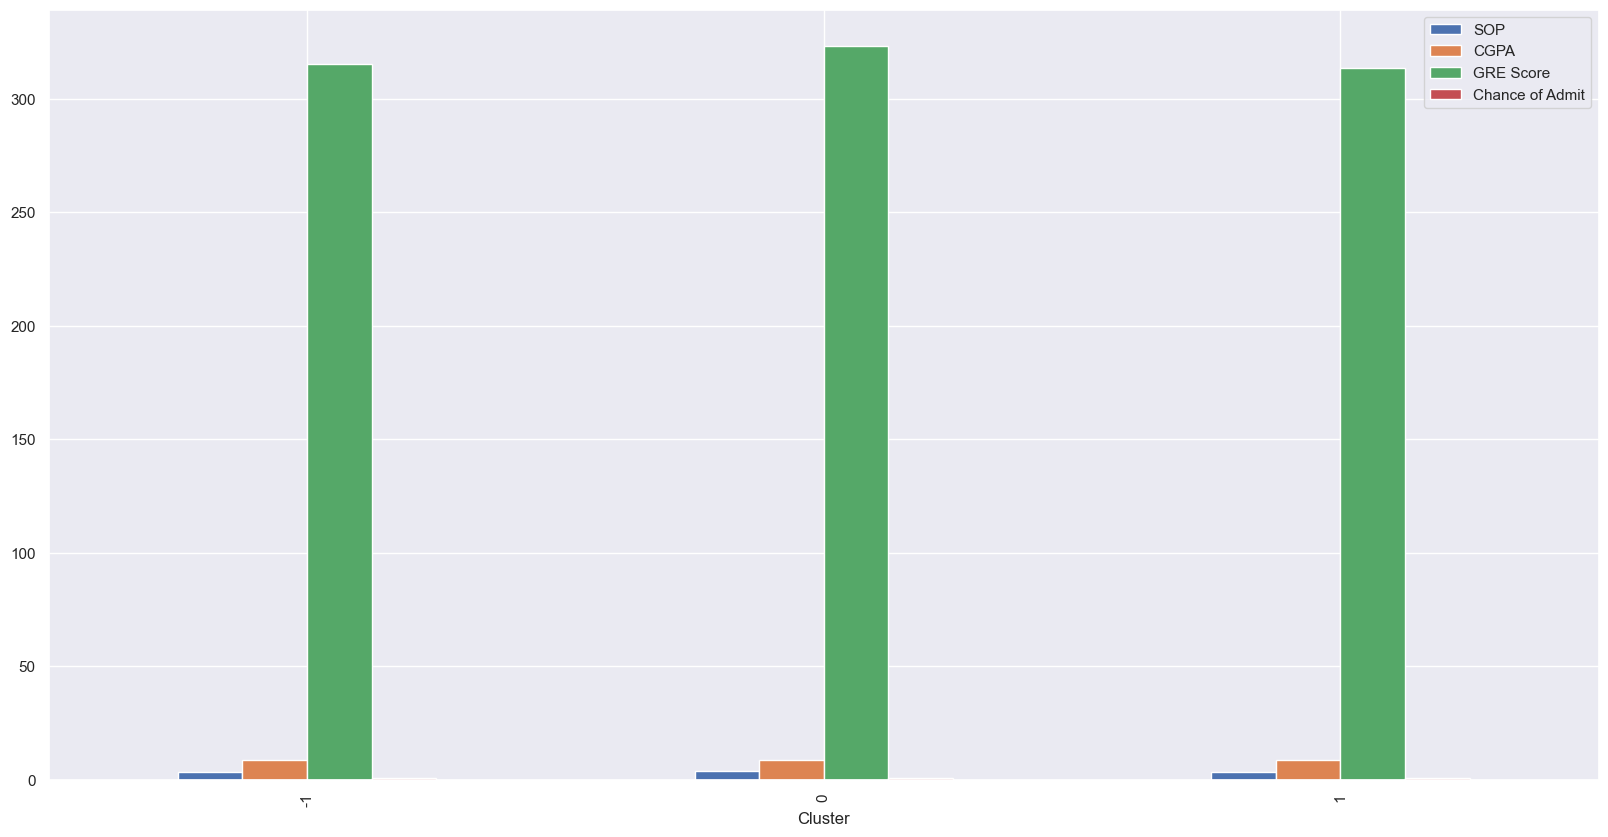

In [108]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (20,10))

### From our computation and graph shown above, we find that for this specific data set, K-Means and K-Means++ exhibit better performance than the hdbscan method. This is probably because the data is not density-intensive, so hdbscan cannot have a good result

# Anomaly Detection

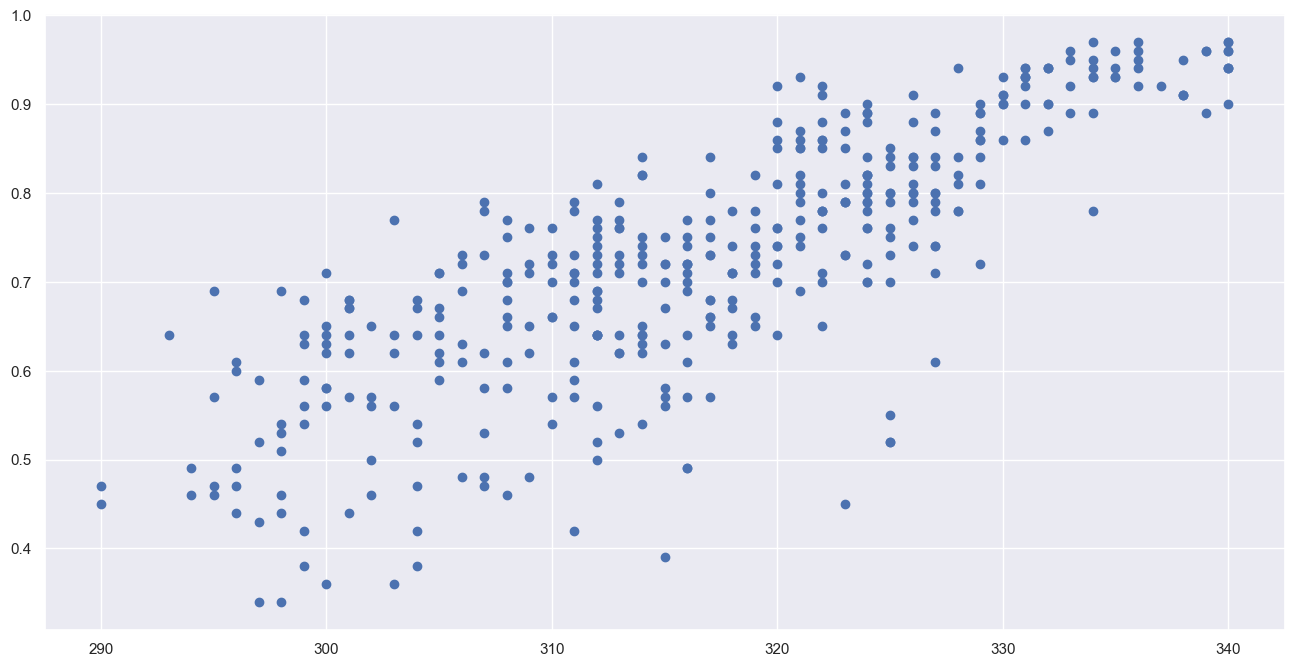

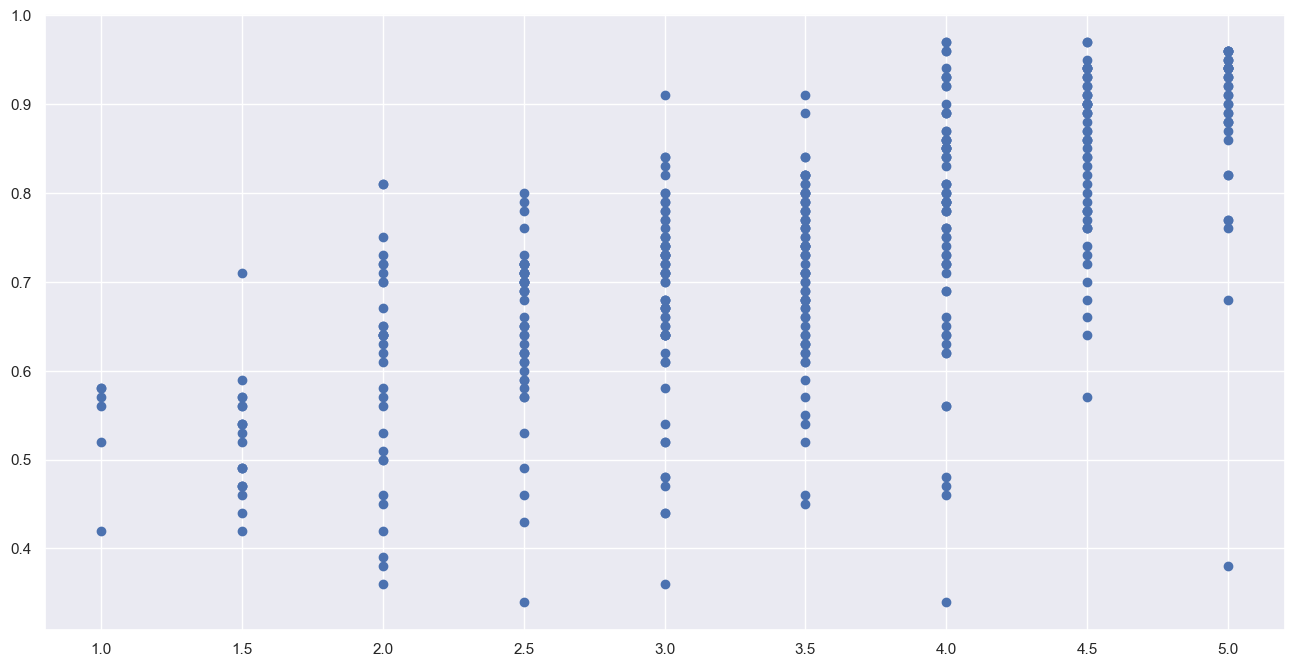

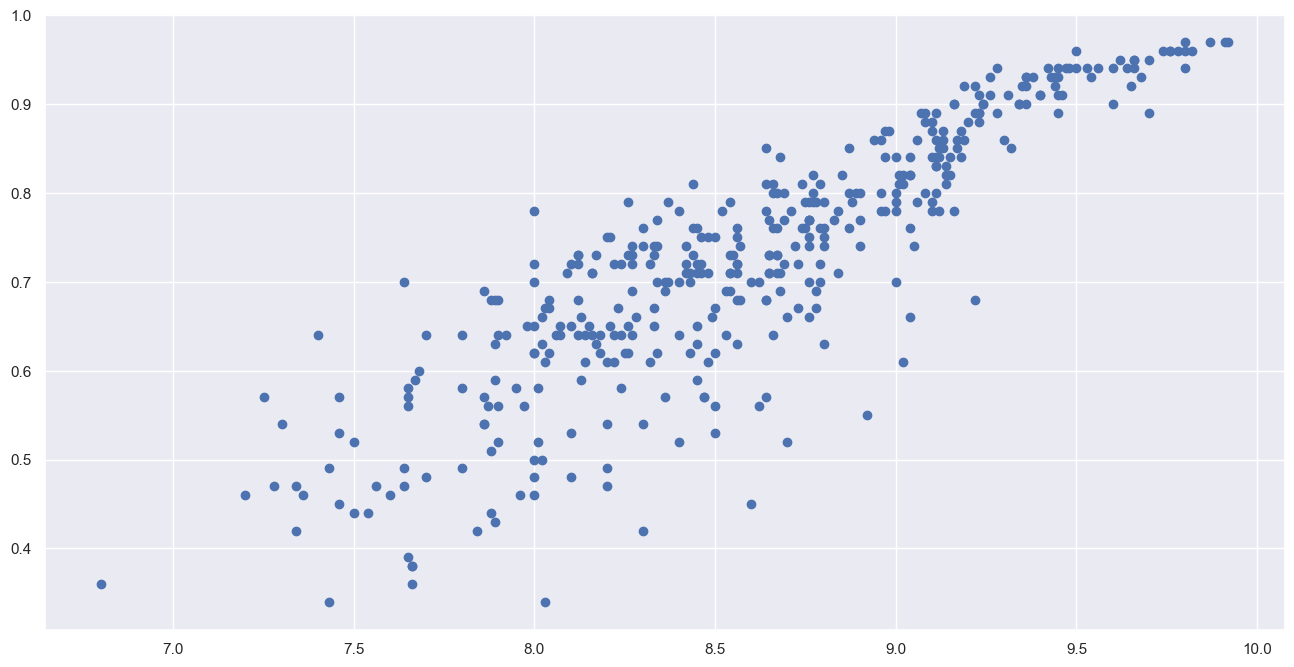

In [109]:
greData = pd.DataFrame(data[["GRE Score", "Chance of Admit"]])
sopData = pd.DataFrame(data[["SOP", "Chance of Admit"]])
cgpaData = pd.DataFrame(data[["CGPA", "Chance of Admit"]])

# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GRE Score", y = "Chance of Admit", data = greData)
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "SOP", y = "Chance of Admit", data = sopData)
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "CGPA", y = "Chance of Admit", data = cgpaData)


## Bi-Variate Anomaly Detection For GRE Score Using LocalOutlierFactor

In [110]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 50      # Number of Neighbors
cont_fraction = 0.15    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(greData)

LocalOutlierFactor(contamination=0.15, n_neighbors=50)

<AxesSubplot: xlabel='Anomaly', ylabel='count'>

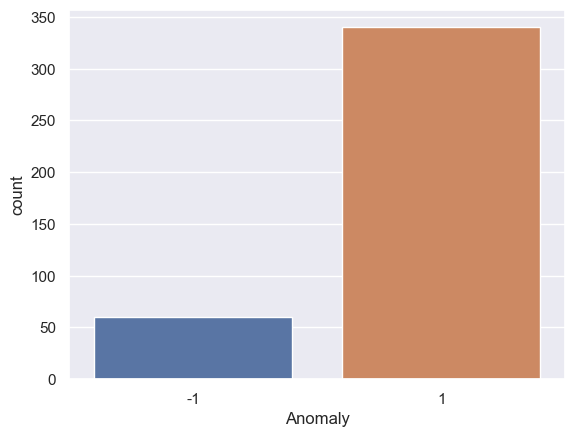

In [111]:
# Predict the Anomalies
labels = lof.fit_predict(greData)

# Append Labels to the Data
gre_labeled1 = greData.copy()
gre_labeled1["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=gre_labeled1["Anomaly"])

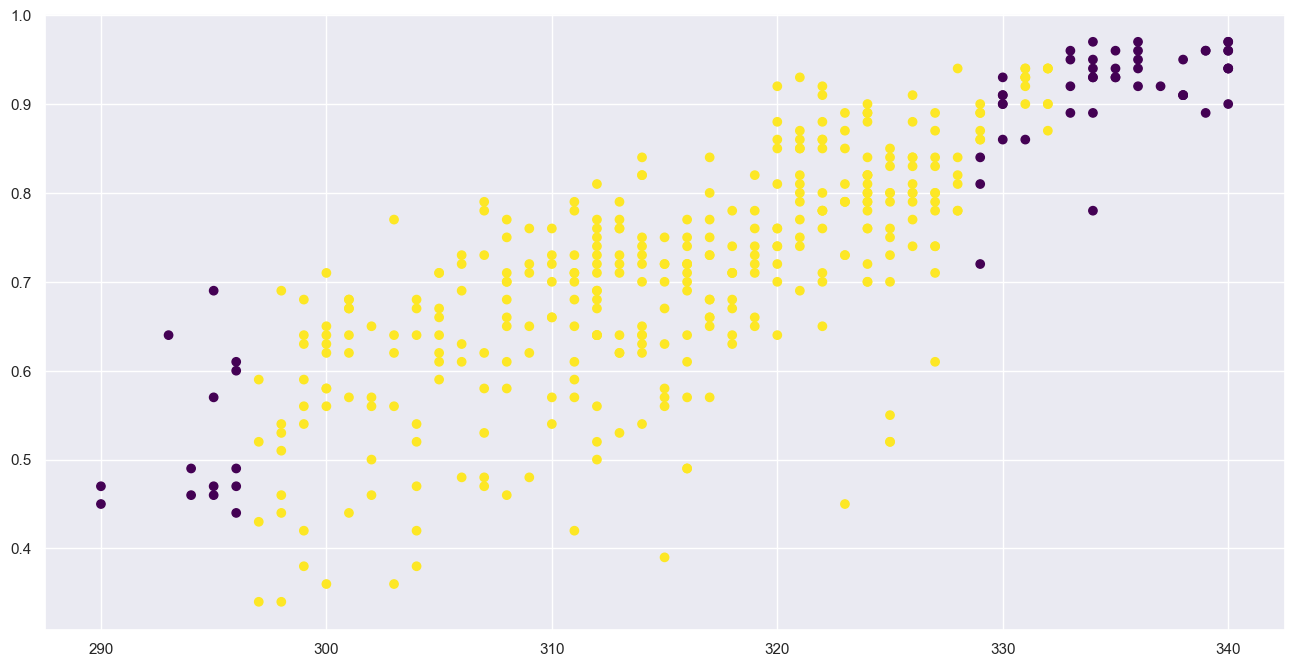

In [112]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GRE Score", y = "Chance of Admit", c = "Anomaly", cmap = 'viridis', data = gre_labeled1)

## Bi-Variate Anomaly Detection For GRE Score Using ECOD in Pyod

In [113]:
# train an ECOD detector
from pyod.models.ecod import ECOD
clf = ECOD()
clf.fit(greData)

ECOD(contamination=0.1, n_jobs=1)

<AxesSubplot: xlabel='Anomaly', ylabel='count'>

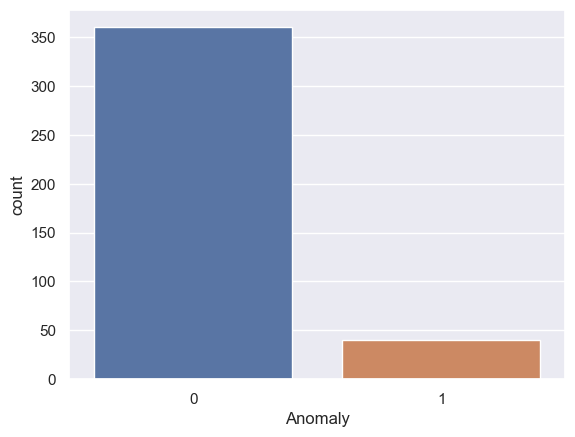

In [114]:
# Predict the Anomalies
labels = clf.labels_

# Append Labels to the Data
gre_labeled2 = greData.copy()
gre_labeled2["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=gre_labeled2["Anomaly"])

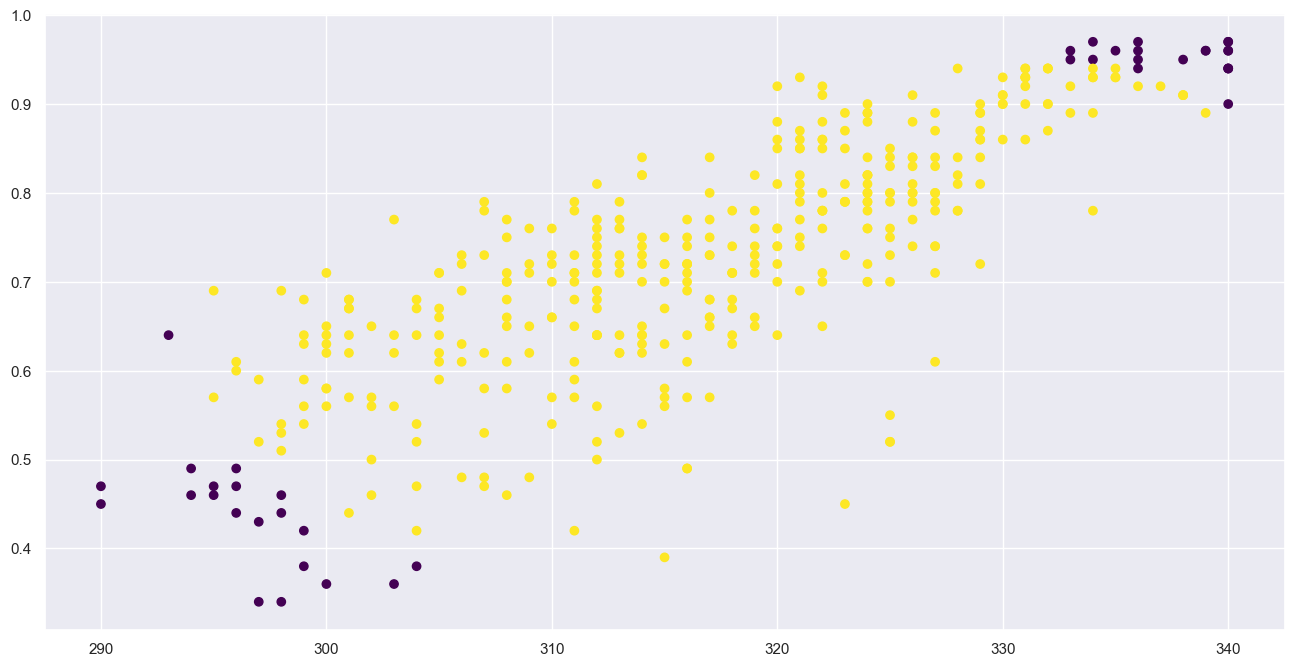

In [115]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GRE Score", y = "Chance of Admit", c = "Anomaly", cmap = 'viridis_r', data = gre_labeled2)

## Bi-Variate Anomaly Detection For SOP Using LocalOutlierFactor


In [116]:
# Set the Parameters for Neighborhood
num_neighbors = 50      # Number of Neighbors
cont_fraction = 0.15    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(sopData)

LocalOutlierFactor(contamination=0.15, n_neighbors=50)

<AxesSubplot: xlabel='Anomaly', ylabel='count'>

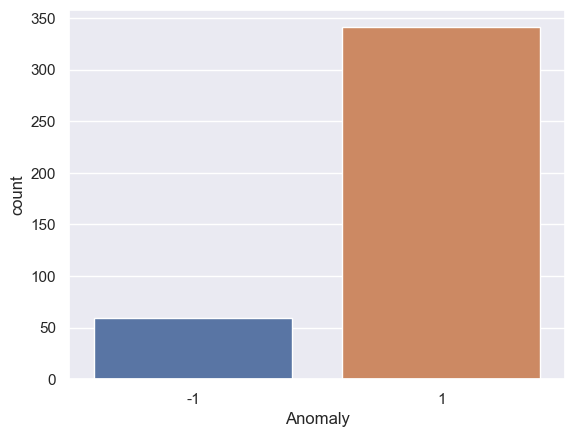

In [117]:
# Predict the Anomalies
labels = lof.fit_predict(sopData)

# Append Labels to the Data
sop_labeled1 = sopData.copy()
sop_labeled1["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=sop_labeled1["Anomaly"])

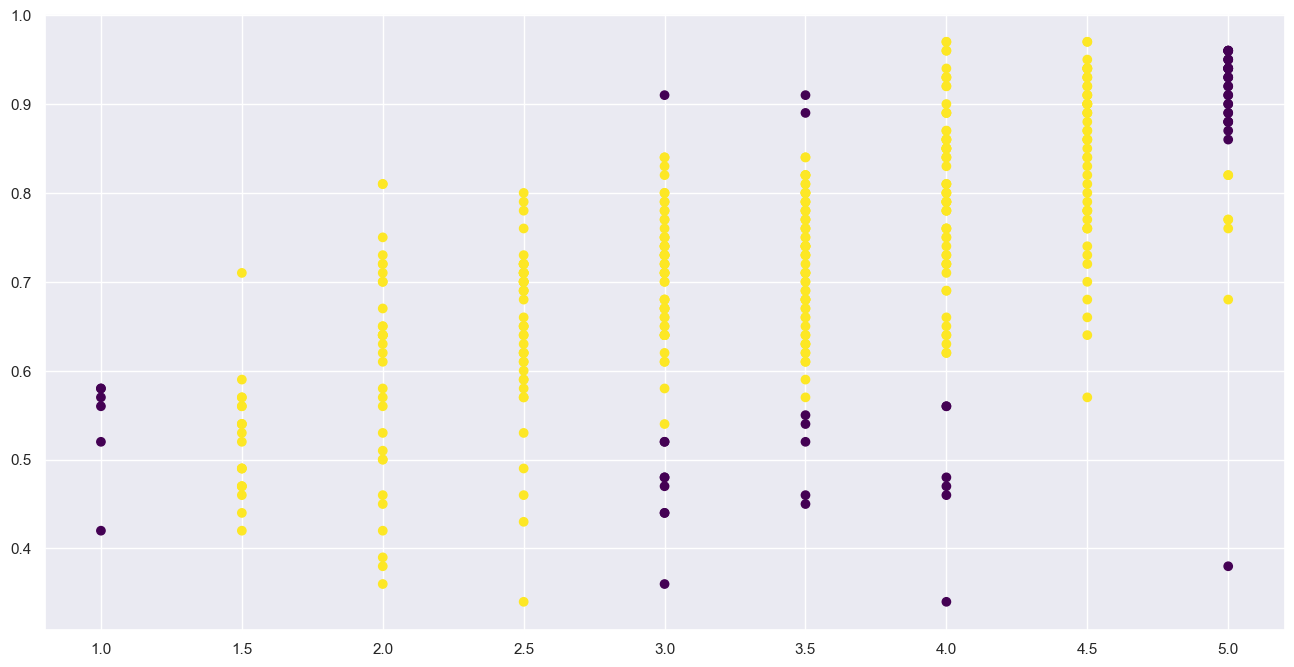

In [118]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "SOP", y = "Chance of Admit", c = "Anomaly", cmap = 'viridis', data = sop_labeled1)

## Bi-Variate Anomaly Detection For SOP Using ECOD in Pyod

In [119]:
# train an ECOD detector
from pyod.models.ecod import ECOD
clf = ECOD()
clf.fit(sopData)

ECOD(contamination=0.1, n_jobs=1)

<AxesSubplot: xlabel='Anomaly', ylabel='count'>

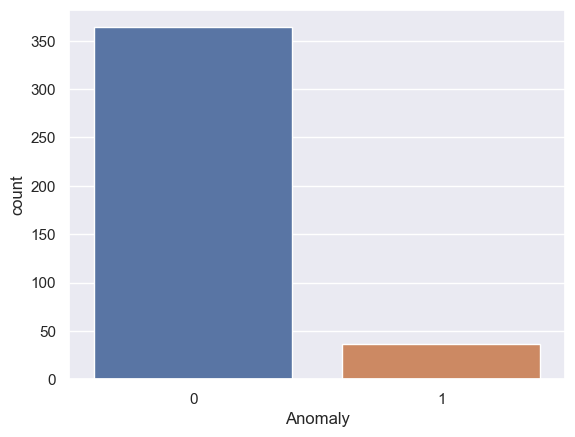

In [120]:
# Predict the Anomalies
labels = clf.labels_

# Append Labels to the Data
sop_labeled2 = sopData.copy()
sop_labeled2["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=sop_labeled2["Anomaly"])

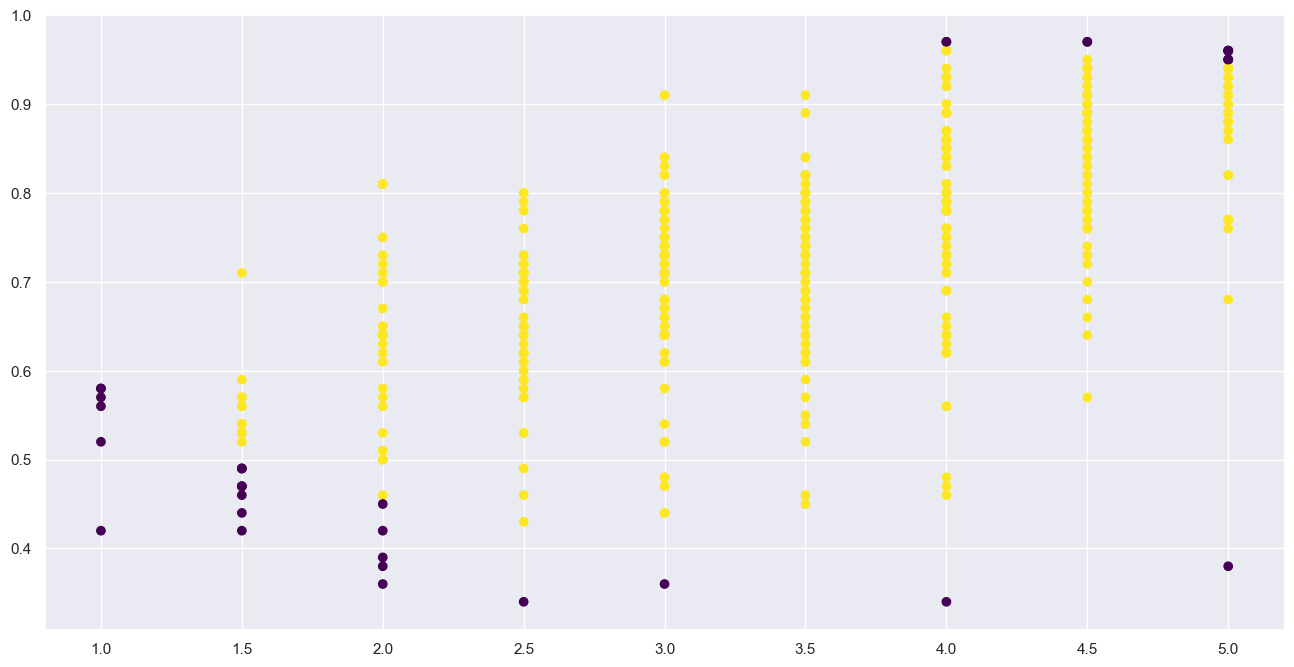

In [121]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "SOP", y = "Chance of Admit", c = "Anomaly", cmap = 'viridis_r', data = sop_labeled2)

## Bi-Variate Anomaly Detection For CGPA Using LocalOutlierFactor


In [122]:
# Set the Parameters for Neighborhood
num_neighbors = 50      # Number of Neighbors
cont_fraction = 0.15    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(cgpaData)

LocalOutlierFactor(contamination=0.15, n_neighbors=50)

<AxesSubplot: xlabel='Anomaly', ylabel='count'>

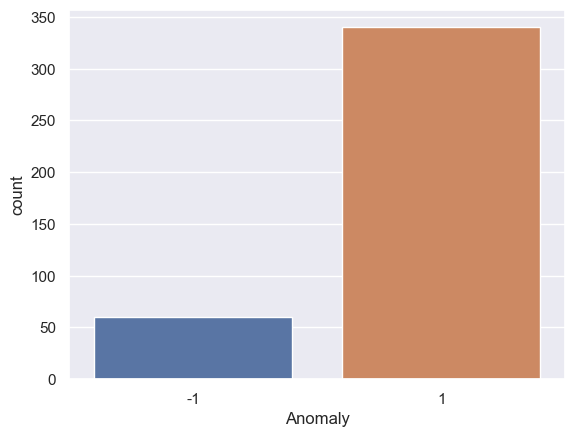

In [123]:
# Predict the Anomalies
labels = lof.fit_predict(cgpaData)

# Append Labels to the Data
cgpa_labeled1 = cgpaData.copy()
cgpa_labeled1["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=cgpa_labeled1["Anomaly"])

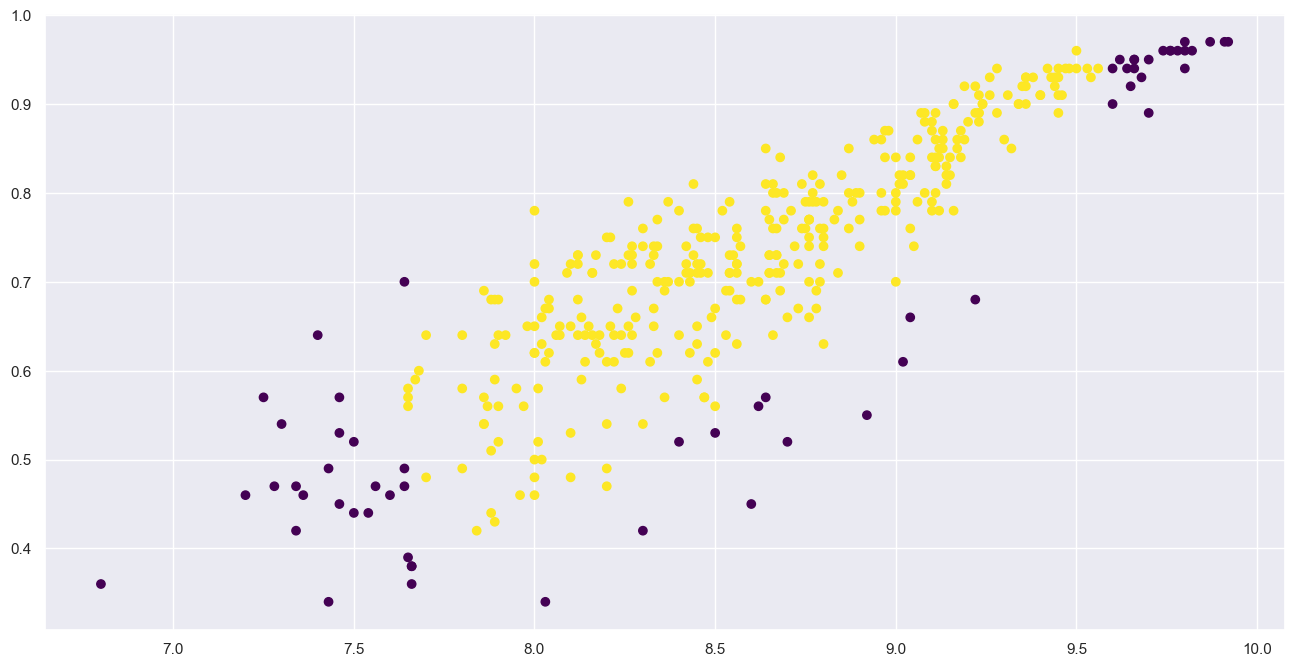

In [124]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "CGPA", y = "Chance of Admit", c = "Anomaly", cmap = 'viridis', data = cgpa_labeled1)

## Bi-Variate Anomaly Detection For CGPA Using ECOD in Pyod


In [125]:
# train an ECOD detector
from pyod.models.ecod import ECOD
clf = ECOD()
clf.fit(cgpaData)

ECOD(contamination=0.1, n_jobs=1)

<AxesSubplot: xlabel='Anomaly', ylabel='count'>

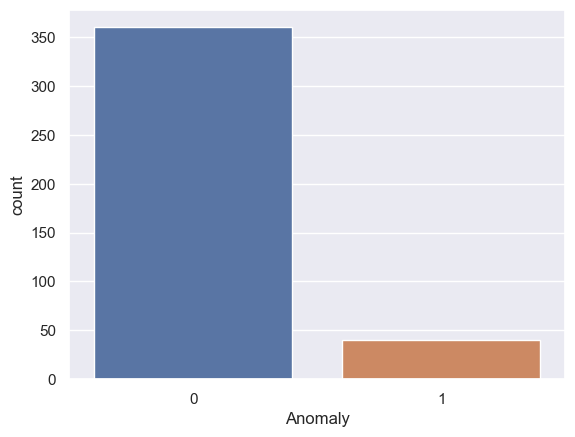

In [126]:
# Predict the Anomalies
labels = clf.labels_

# Append Labels to the Data
cgpa_labeled2 = cgpaData.copy()
cgpa_labeled2["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=cgpa_labeled2["Anomaly"])

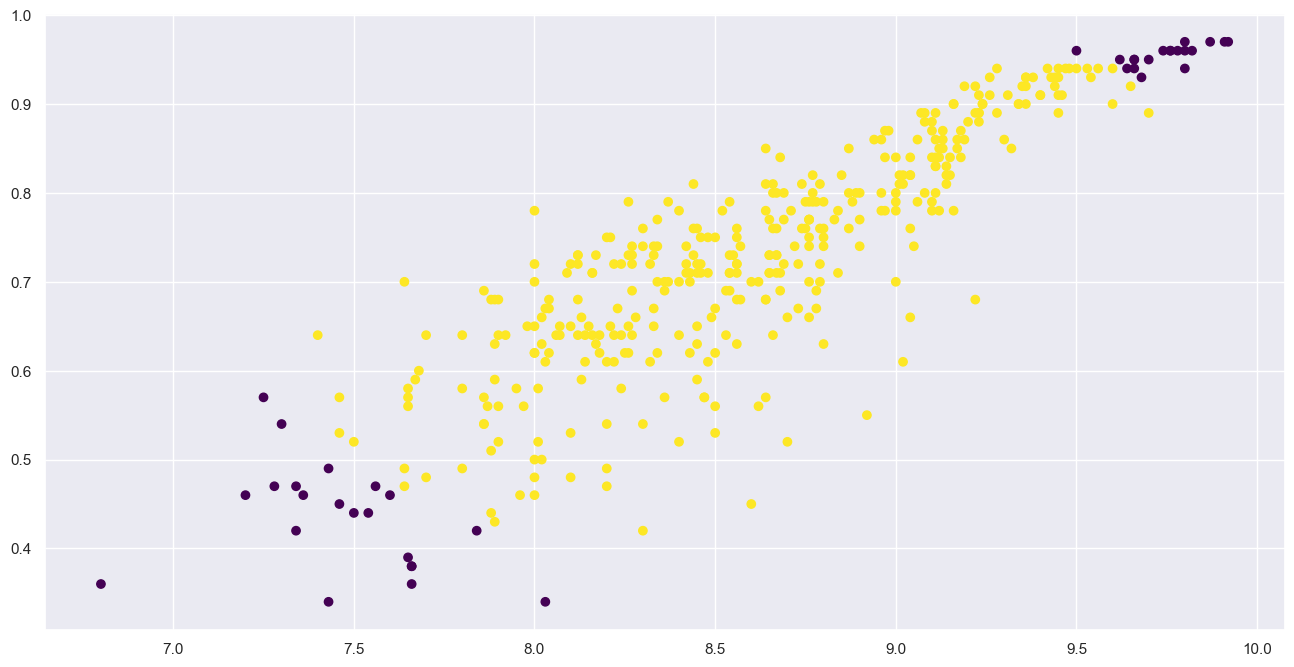

In [127]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "CGPA", y = "Chance of Admit", c = "Anomaly", cmap = 'viridis_r', data = cgpa_labeled2)

## Multi-Variate Anomaly Detection Using LocalOutlierFactor

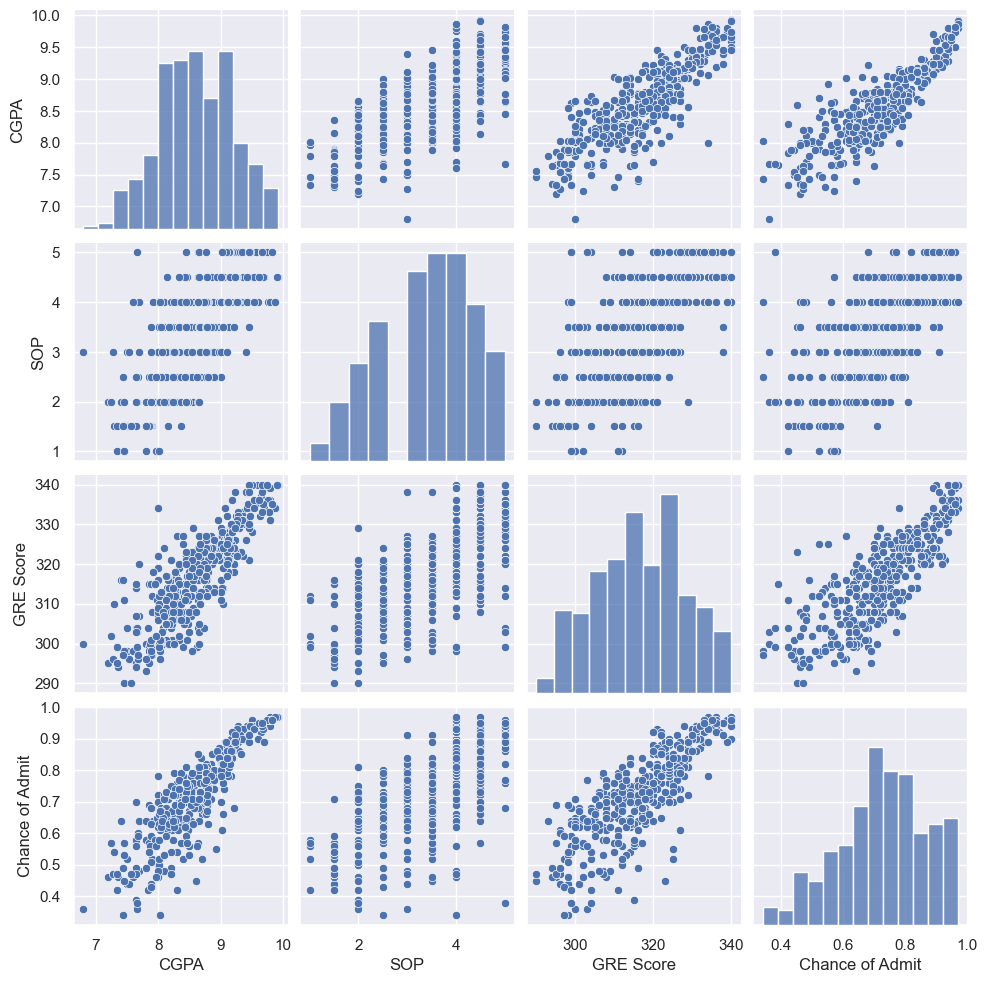

In [128]:
X = pd.DataFrame(data[["CGPA", "SOP", "GRE Score", "Chance of Admit"]]) 

# Plot the Raw Data on 2D grids
sb.pairplot(X)

In [129]:
# Set the Parameters for Neighborhood
num_neighbors = 50      # Number of Neighbors
cont_fraction = 0.15    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.15, n_neighbors=50)

<AxesSubplot: xlabel='Anomaly', ylabel='count'>

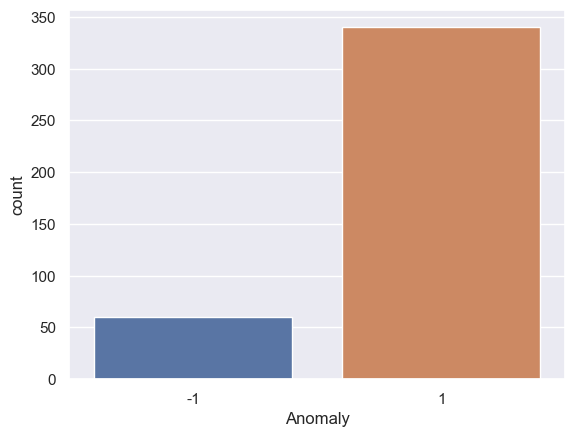

In [130]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=X_labeled["Anomaly"])

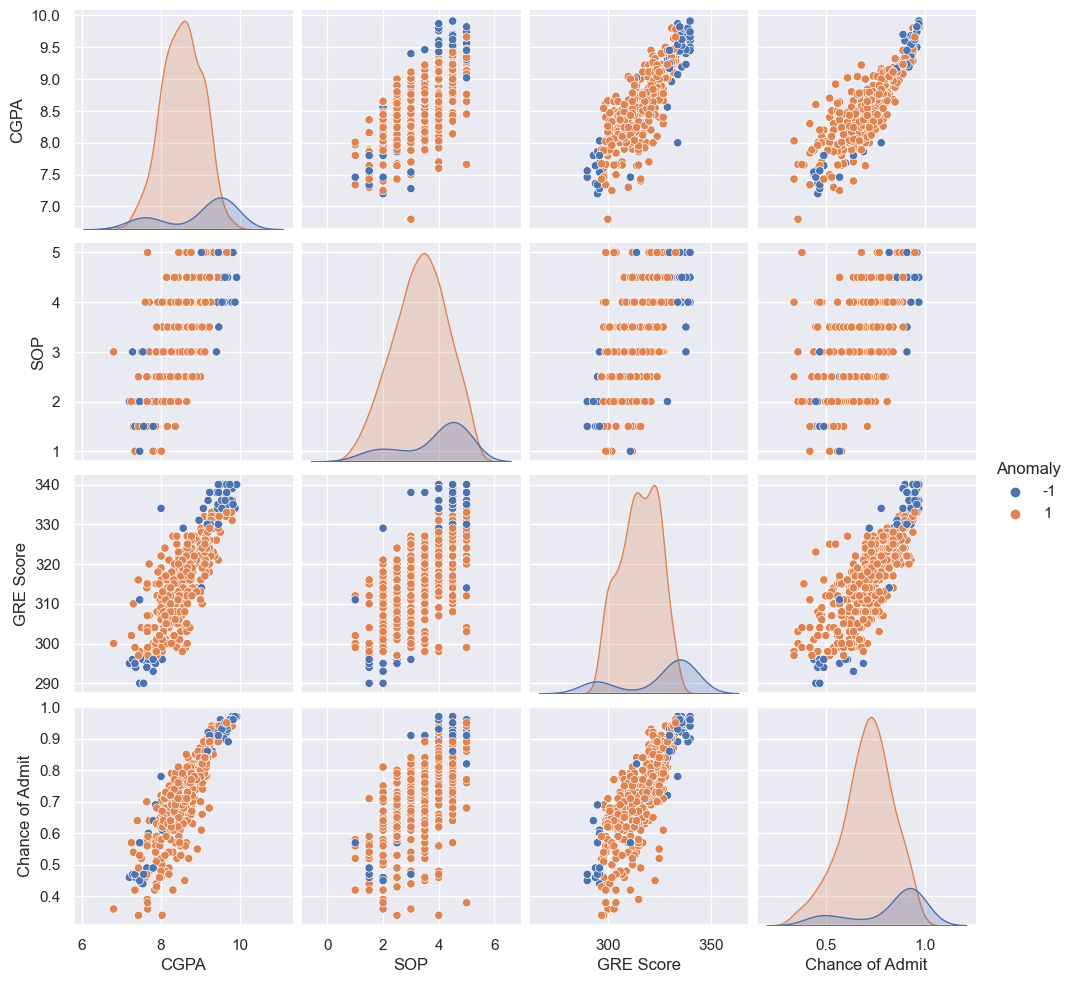

In [131]:
# Visualize the Anomalies in the Data
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Anomaly")

<AxesSubplot: xlabel='Chance of Admit', ylabel='Anomaly'>

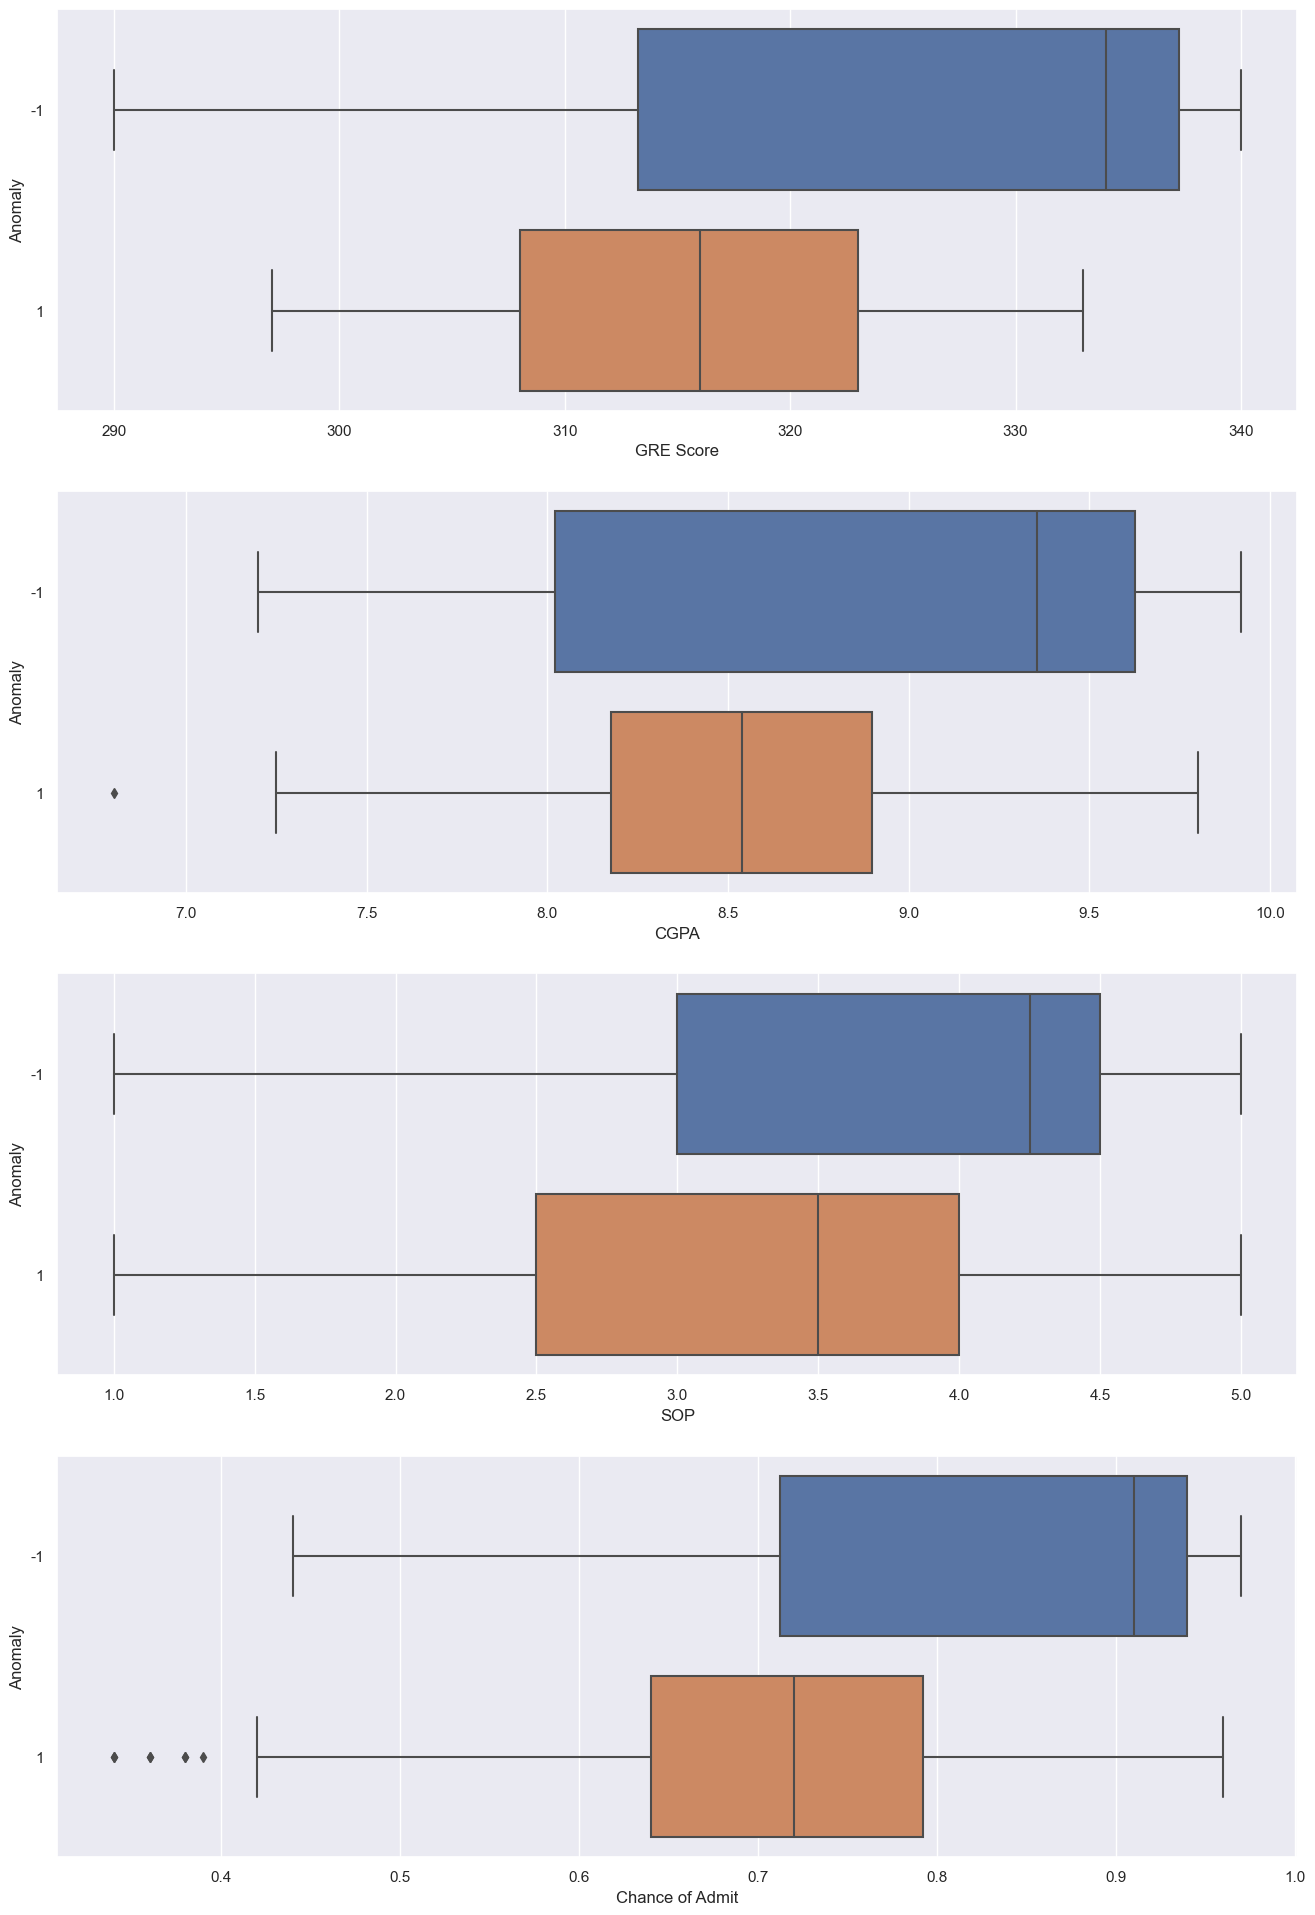

In [132]:
# Boxplots for all Features against the Anomalies
f, axes = plt.subplots(4, 1, figsize=(16,24))
sb.boxplot(x = 'GRE Score', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'CGPA', y = 'Anomaly', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'SOP', y = 'Anomaly', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'Chance of Admit', y = 'Anomaly', data = X_labeled, ax = axes[3])


## Multi-Variate Anomaly Detection Using KNN in Pyod


In [133]:
from pyod.models.knn import KNN   # kNN detector

# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

<AxesSubplot: xlabel='Anomaly', ylabel='count'>

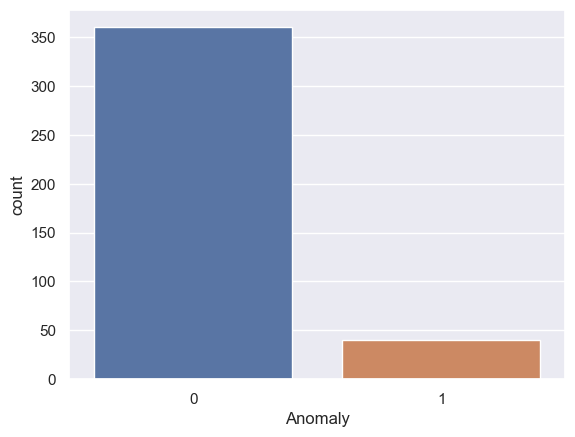

In [134]:
labels = clf.labels_

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=X_labeled["Anomaly"])

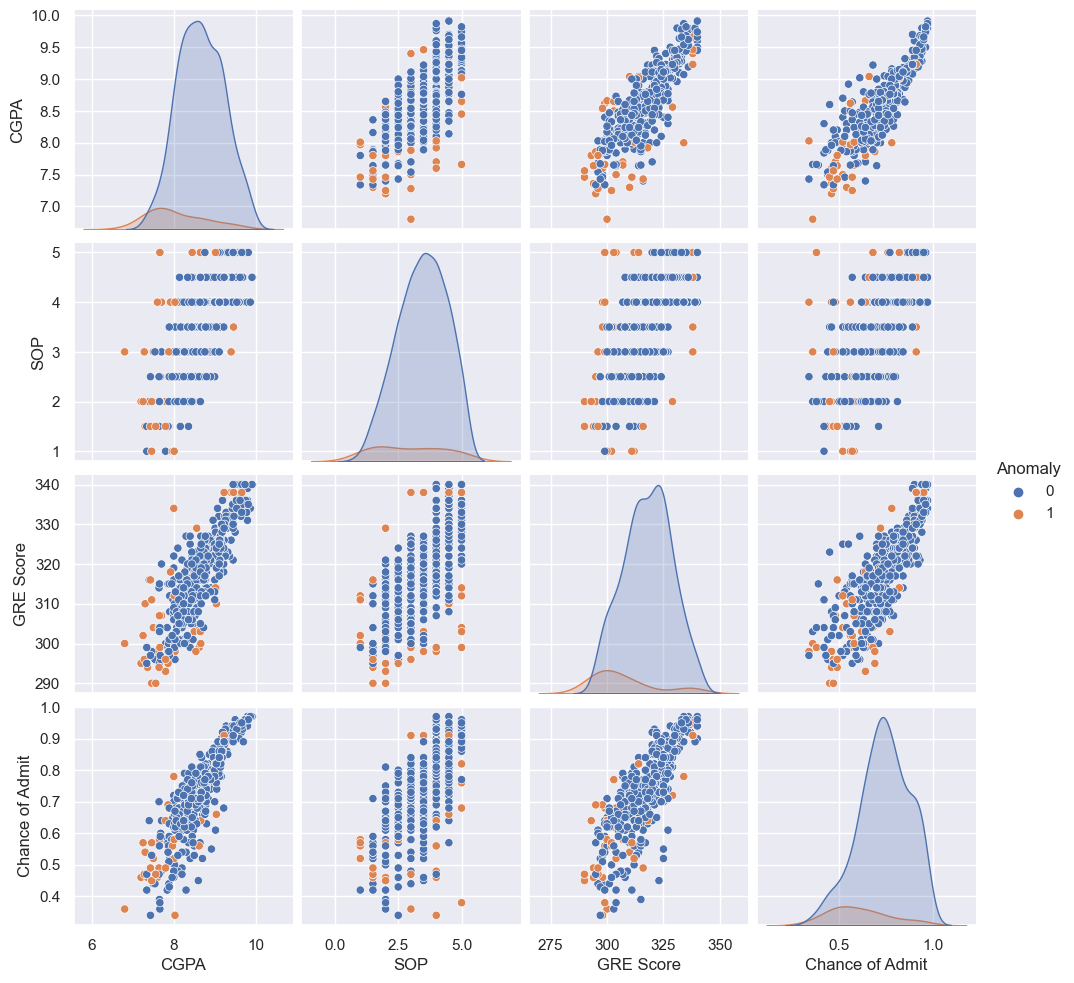

In [135]:
# Visualize the Anomalies in the Data
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Anomaly")

<AxesSubplot: xlabel='Chance of Admit', ylabel='Anomaly'>

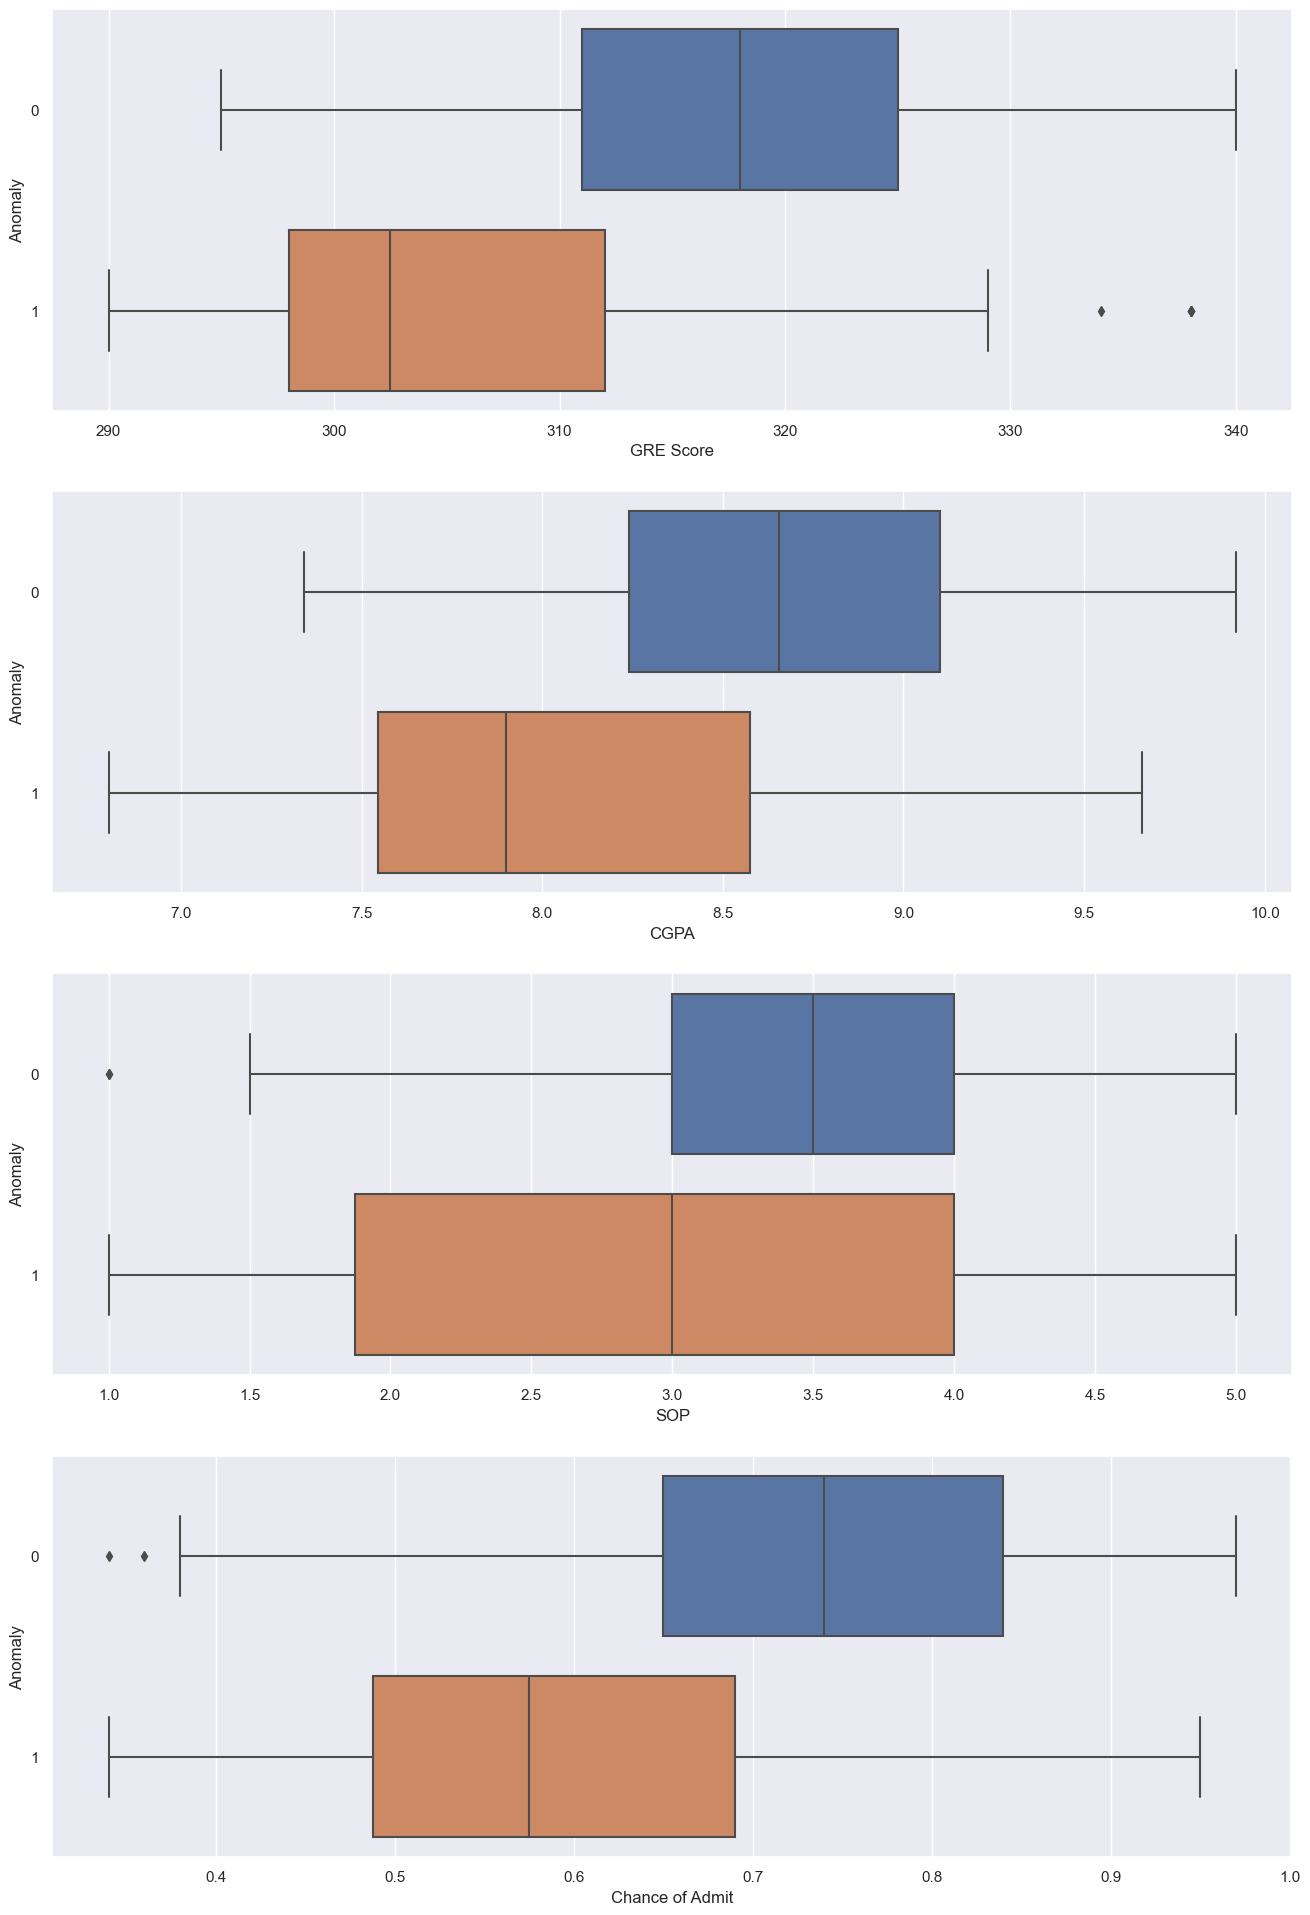

In [136]:
# Boxplots for all Features against the Anomalies
f, axes = plt.subplots(4, 1, figsize=(16,24))
sb.boxplot(x = 'GRE Score', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'CGPA', y = 'Anomaly', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'SOP', y = 'Anomaly', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'Chance of Admit', y = 'Anomaly', data = X_labeled, ax = axes[3])


### From our computation and graph, we conclude the ECOD exhibits higher efficiency compared to LocalOutlierFactor algorithm since less relevant points are labled as anomalies